In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import statistics
import collections
import  matplotlib
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import copy
os.chdir(f"{os.getcwd()}/revisedata")
print(os.getcwd())
#import seaborn as sns
#sns.set_style("ticks")
#sns.set_context("paper")
#sns.set_palette("husl")
fontSize = 18

def statistics_mode(data):
    uniqs, counts = np.unique(data, return_counts=True)
    mode = np.mean(uniqs[counts == np.amax(counts)]) 
    return(mode)

/Users/itoutouma/Desktop/BowTiePaper/revise1/scripts/revisedata


In [3]:
colors = ["#ff4b00", "#005aff","#03af7a", "#000000"]
#colors dark = ["#D15235", "#455CB1", "#00AB81",  "#000000"]
labels = ["Rank1","Rank2", "Rank3", "Rank6"]

## Figure 3

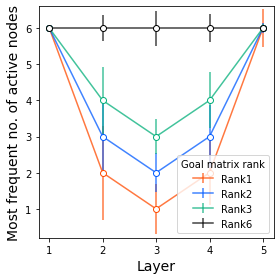

In [4]:
# from matplotlib.backends.backend_pdf import PdfPages
#Rank dependency of genetic algorithm
RD1 = np.loadtxt("RidM1/S100_RankDepend_R1_A001.txt")
RD2 = np.loadtxt("RidM1/S100_RankDepend_R2_A001.txt")
RD3 = np.loadtxt("RidM1/S100_RankDepend_R3_A001.txt")
RD6 = np.loadtxt("RidM1/S100_RankDepend_R6_A001.txt")

RD_data = [RD1, RD2, RD3, RD6]
RDs_ave = [[statistics_mode(RD_data[j][:,i]) for i in range(5)] for j in range(len(RD_data))]
RDs_std = [np.std(RD_data[j], axis=0) for j in range(len(RD_data))]
X = [1,2,3,4,5]
plt.figure(figsize=(4,4), facecolor="white")
plt.xlabel('Layer', size=14)  # x軸ラベル
plt.ylabel('Most frequent no. of active nodes',size=14)  # y軸ラベル
plt.ylim(0.2,6.6)
for i in range(4):
    plt.errorbar(X, RDs_ave[i],yerr=RDs_std[i], color=colors[i], label=labels[i], alpha=0.75, zorder=1)
    plt.scatter(X, RDs_ave[i], alpha=1.0, facecolor='white', edgecolors=colors[i], zorder=2)

plt.legend(loc=4, title="Goal matrix rank")    
plt.xticks([1, 2, 3, 4, 5])
plt.yticks([1, 2, 3, 4, 5, 6])
plt.tight_layout()  # レイアウトの設定
matplotlib.rcParams['pdf.fonttype'] = 42
#plt.savefig("Figures/FigA.pdf")

In [5]:
def InitDependency(waist_size_data, title, X, inset = False, figsize=[6,4]):
    GoalMatirxSize = 60
    #colors = ["#ff4b00", "#005aff","#03af7a", "#000000"]      # 各プロットの色
    colors = ["#D15235", "#455CB1", "#00AB81",  "#000000"]
    labels = ["Rank1","Rank2", "Rank3", "Rank6"]   # 各ラベル
    fig, ax = plt.subplots(figsize=(figsize[0],figsize[1]), facecolor="white")
    if inset: axins = ax.inset_axes([0.55, 0.48, 0.4, 0.4])
    
    for i in range(4):
        ws = waist_size_data[i]
        ax.errorbar(X, ws.loc[:, "waist_mean"], yerr=ws.loc[:, "waist_std"], 
                    color=colors[i], label=labels[i], alpha=0.5, marker="o")
        if inset:
            axins.errorbar(X, ws.loc[:, "waist_mean"], yerr=ws.loc[:, "waist_std"], 
                    color=colors[i], label=labels[i], alpha=0.5, marker="o")
    ax.vlines(GoalMatirxSize, 0.5, 6.5, "grey", linestyles='dashed')
    ax.set_xlabel('$A_{0}$',size=14)  # x軸ラベル
    ax.set_ylabel('Mean no. of active nodes in waist',size=14)  # y軸ラベル
    ax.set_ylim(0.5,6.5)
    ax.legend(loc=4, title="Goal matrix rank")    # 凡例
    
    if inset:
        axins.set_xlim(-1, 11)
        axins.set_ylim(0.5, 6.5)


    plt.tight_layout()  # レイアウトの設定
    matplotlib.rcParams['pdf.fonttype'] = 42
    #plt.savefig("Figures/{}".format(title))


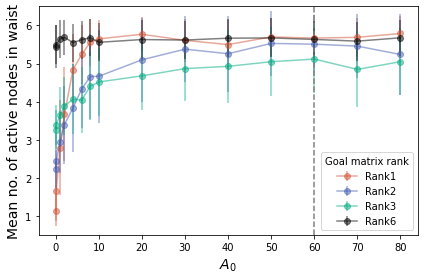

In [6]:
X = [0.01,0.1,1.0,2.0,4.0,6.0,8.0,10,20,30,40,50,60,70,80]
waistR1 = pd.read_csv("RIDM3/S100_Genetic_Product_normalize0_10_rank1.csv")
waistR2 = pd.read_csv("RIDM3/S100_Genetic_Product_normalize0_10_rank2.csv")
waistR3 = pd.read_csv("RIDM3/S100_Genetic_Product_normalize0_10_rank3.csv")
waistR6 = pd.read_csv("RIDM3/S100_Genetic_Product_normalize0_10_rank6.csv")
waist_data = [waistR1, waistR2, waistR3 ,waistR6]
InitDependency(waist_data, "Fig3B.eps", X, figsize=[6,4])

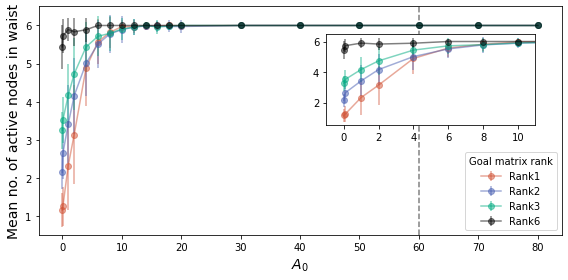

In [7]:
X = [0.01, 0.1, 1.0, 2.0, 4.0, 6.0, 8.0, 10, 12, 14, 16, 18, 20, 30, 40, 50, 60, 70, 80]
waistR1 = pd.read_csv("Rid5/Rid5Fig3b_R1.csv")
waistR2 = pd.read_csv("Rid5/Rid5Fig3b_R2.csv")
waistR3 = pd.read_csv("Rid5/Rid5Fig3b_R3.csv")
waistR6 = pd.read_csv("Rid5/Rid5Fig3b_R6.csv")
waist_data = [waistR1, waistR2, waistR3 ,waistR6]
InitDependency(waist_data, "SFig4A.pdf", X, True, [8,4])

In [8]:
import math
def TimeCourseOfActiveNode(N001_data, N40_data, nNode_, filetitle, end=5000, small_value = 0.01, large_value=40):
    #Properteis used in the figure design.
    N001_colors = ["#D15235", "#455CB1", "#00AB81",  "#000000"]
    N40_colors = ["#FF8B89", "#ABD0E4", "#8DBA99", "grey"]
    Ranks = ["Rank1","Rank2", "Rank3", "Rank6"]    
    N001_mean = [np.mean(N001_data[j], axis=0) for j in range(4)]
    N40_mean = [np.mean(N40_data[j], axis=0) for j in range(4)]
    Layers = ["Layer 1","Layer 2", "Layer 3", "Layer 4", "Layer 5", "Fitness\n(x$10^3$)"]
    PannelPosition = ["left edge", 0,0,"right edge"]
    
    
    minimal = -1*int(math.ceil((abs(np.min(N001_mean[0][:,5])/1000))))
    minimal = list(range(minimal, 1))
    ax = list(range(24))
    fig = plt.figure(figsize=(8, 7),facecolor="white", dpi=240)
    layer = 0
    alpha_ = 1
    for i in range(24):    
        ax[i] = fig.add_subplot(6, 4, i+1)
        if layer < 5: # 5 is the layer for fitnes
            ax[i].set_ylim(0,nNode_+1)
            if nNode_ > 6: 
                ax[i].set_yticks(list(range(1,nNode_+1,2)))
            else:
                ax[i].set_yticks(list(range(1,nNode_+1)))
            ax[i].set_xticks([])
            ax[i].plot(N001_mean[i%4][0:end,layer], alpha=alpha_, color=N001_colors[i%4], label=f"$A_0$:{small_value}")
            ax[i].plot(N40_mean[i%4][0:end,layer], alpha=alpha_, color=N40_colors[i%4],label=f"$A_0$:{large_value}",
                   linestyle="dotted", dashes=[4,0.8])
        else:
            ax[i].set_yticks(np.array(minimal)*1000)
            ax[i].set_yticklabels([str(num) for num in minimal])
            alpha_ = 0.5
            ax[i].plot(N001_mean[i%4][0:end,layer], alpha=alpha_, color=N001_colors[i%4], label=f"$A_0$:{small_value}")
            ax[i].plot(N40_mean[i%4][0:end,layer], alpha=alpha_, color=N40_colors[i%4],label=f"$A_0$:{large_value}",
                   linestyle="dotted", dashes=[4,0.8])

    
        #Plot first 10 sample
        for j in range(10):
            ax[i].plot(N001_data[i%4][j][0:end,layer], alpha=0.1, color=N001_colors[i%4], label=f"$A_0$:{small_value}")
            ax[i].plot(N40_data[i%4][j][0:end,layer], alpha=0.1, color=N40_colors[i%4],label=f"$A_0$:{large_value}",
                        linestyle="dotted", dashes=[4,0.8])      

        if layer == 0:
            ax[i].legend(labels = [f"$A_0$:{small_value}", f"$A_0$:{large_value}"])
            ax[i].set_title(Ranks[i],size=14)

        if i%4 == 0:
            ax[i].set_ylabel(Layers[layer],size=14)
        if i%4 == 3:
            layer+=1
        
    matplotlib.rcParams['pdf.fonttype'] = 42
    fig.text(0.04, 0.55, 'No. of active nodes in each layer', ha='center', va='center', rotation='vertical', size=14)
    fig.text(0.5, 0.05, 'Generation (x100)', ha='center', va='center', size=14)
    #fig.savefig("Figures/{}".format(filetitle))

import collections

def HistogramOfMinimalWaist(N001_data, N40_data, filetitle, small_value = 0.01, large_value=40):

    freq_N001 = [[np.min(N001_data[R_index][j][:,1:4]) for j in range(100)] for R_index in range(4)]
    freq_N40 = [[np.min(N40_data[R_index][j][:,1:4]) for j in range(100)] for R_index in range(4)]

    bins_list = [0.5,1.5,2.5,3.5,4.5,5.5,6.5]
    #bins_list = [0.5,1.5,2.5,3.5,4.5,5.5,6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5]
    counts_N001_normed,counts_N001_R, counts_N40_normed,counts_N40_R  = [0]*4, [0]*4, [0]*4, [0]*4
    for R_index in range(4):
        counts_N001_R[R_index], bins = np.histogram(freq_N001[R_index], bins=bins_list)
        counts_N001_normed[R_index] = counts_N001_R[R_index] / sum(counts_N001_R[R_index])
    for R_index in range(4):
        counts_N40_R[R_index], bins = np.histogram(freq_N40[R_index], bins=bins_list)
        counts_N40_normed[R_index] = counts_N40_R[R_index] / sum(counts_N40_R[R_index])

    weight_ = [counts_N001_normed,  counts_N40_normed]
    labels = ["Rank1", "Rank2", "Rank3", "Rank6"]
     
    N001_colors = ["#D15235", "#455CB1", "#00AB81",  "#000000"]
    N40_colors = ["#D15235", "#455CB1", "#00AB81",  "#000000"]#["#FF8B89", "#ABD0E4", "#8DBA99", "grey"]
    colors = [N001_colors, N40_colors]

    fig = plt.figure(figsize=(4, 7),facecolor="white", dpi=240)
    ax = [0,1]

    for i in range(2):
        ax[i] = fig.add_subplot(2, 1, i+1)
        ax[i].hist([bins[:-1],bins[:-1],bins[:-1],bins[:-1]], 
                   bins=bins, label=labels, color=colors[i], weights=weight_[i])
        ax[i].set_xlim(0,7)
        #ax[i].set_xlim(0,13)
        ax[i].set_ylim(0,1)
        ax[i].set_xticks([1, 2, 3, 4, 5, 6])
        #ax[i].set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
        ax[i].set_ylabel("Frequency",fontsize=14)
        ax[i].set_xlabel("Instantaneous minimum waist size",fontsize=13, x=0.38)

    ax[0].set_title(f"$A_0$:{small_value}",fontsize=14)
    ax[1].set_title(f"$A_0$:{large_value}",fontsize=14)
    ax[0].legend(labels)
    ax[1].legend(labels, loc=0)
    fig.subplots_adjust(hspace=0.5, left=0.3)
    matplotlib.rcParams['pdf.fonttype'] = 42
    #fig.savefig("Figures/{}".format(filetitle))

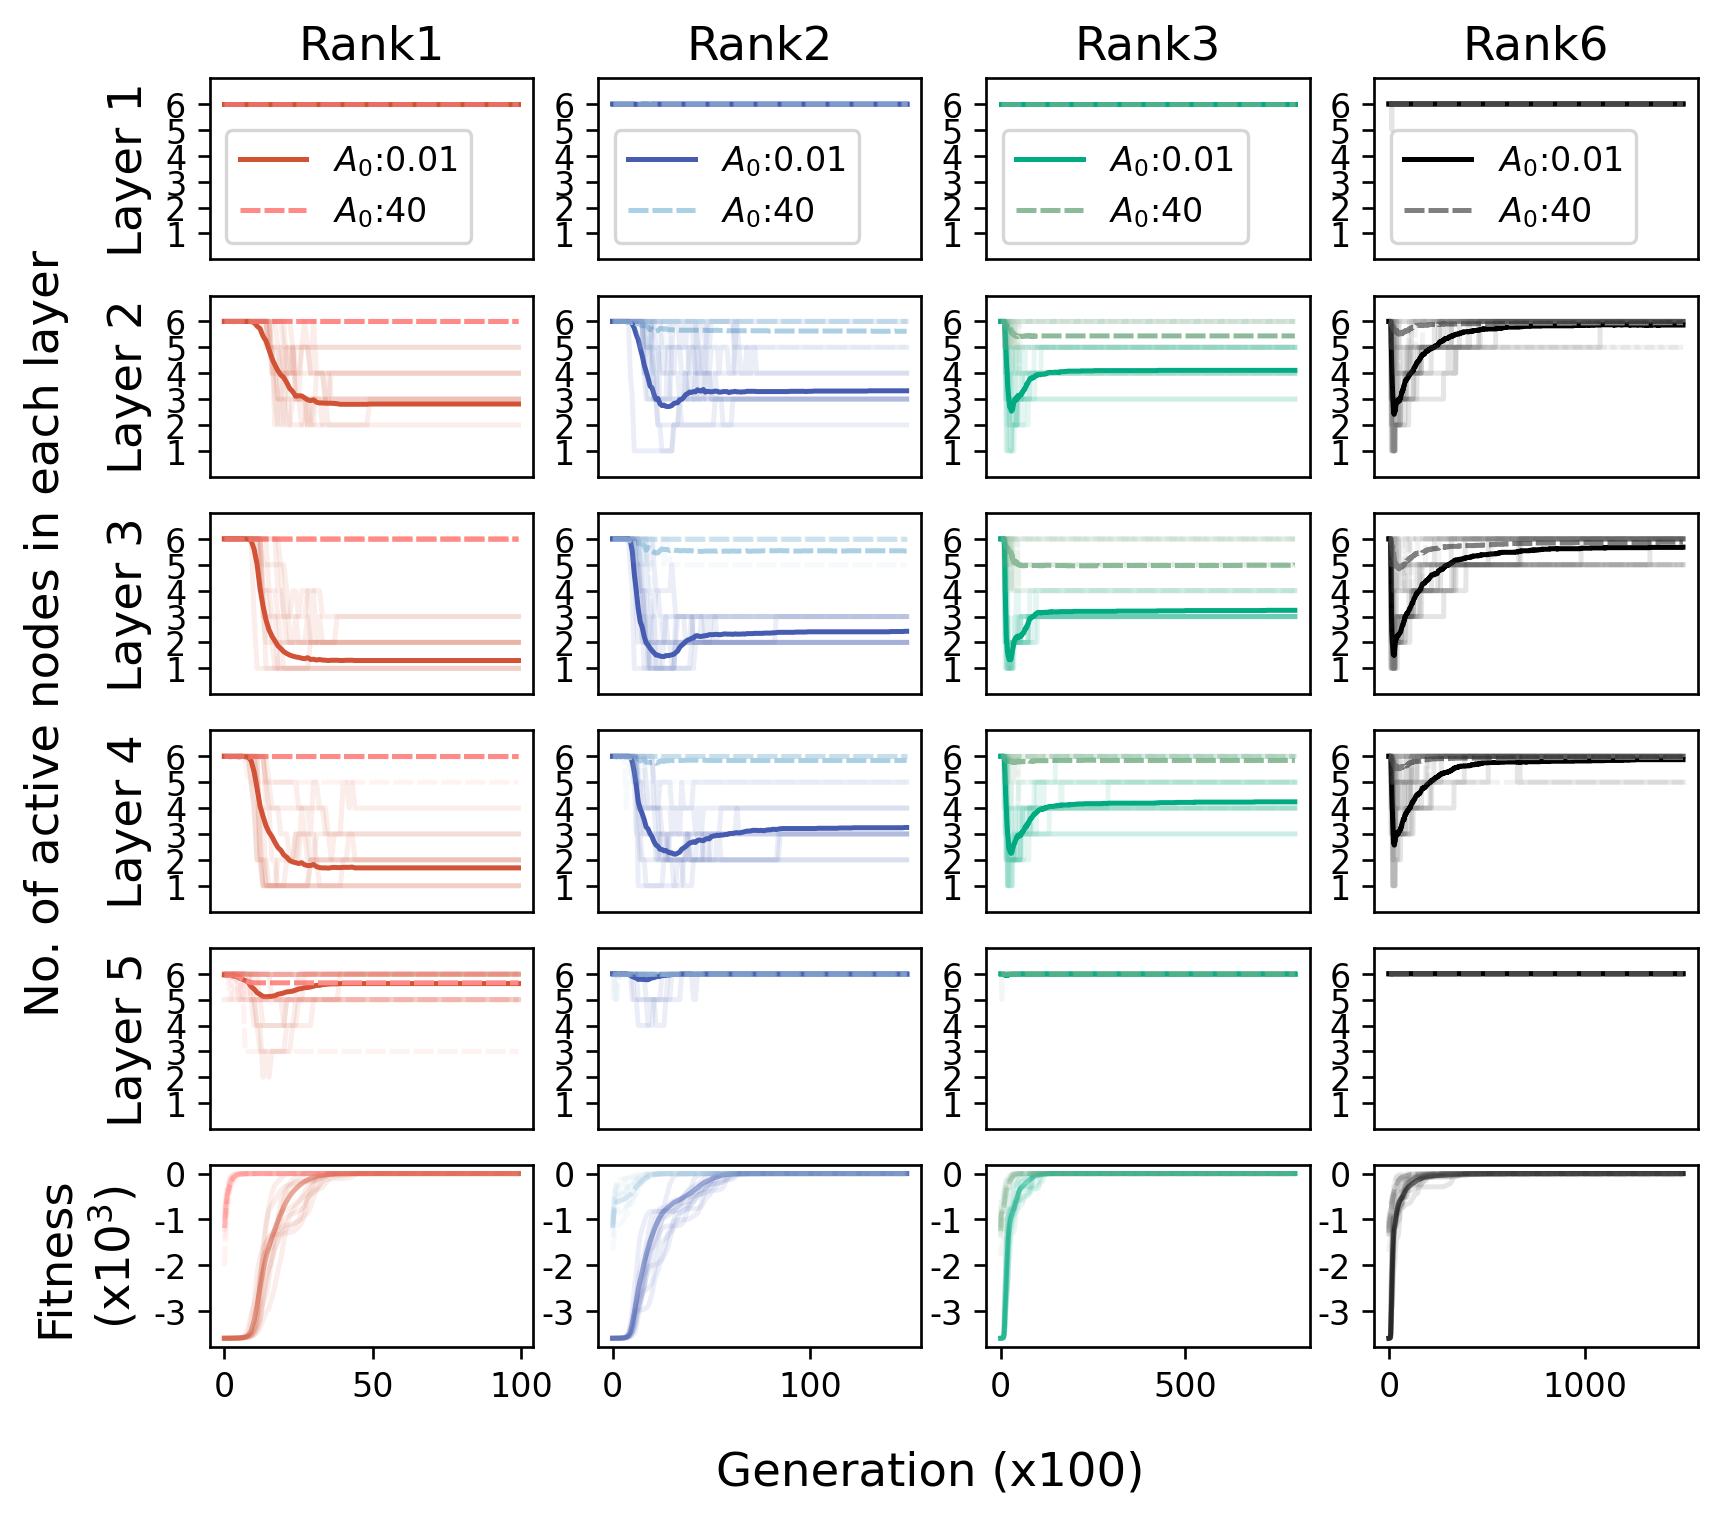

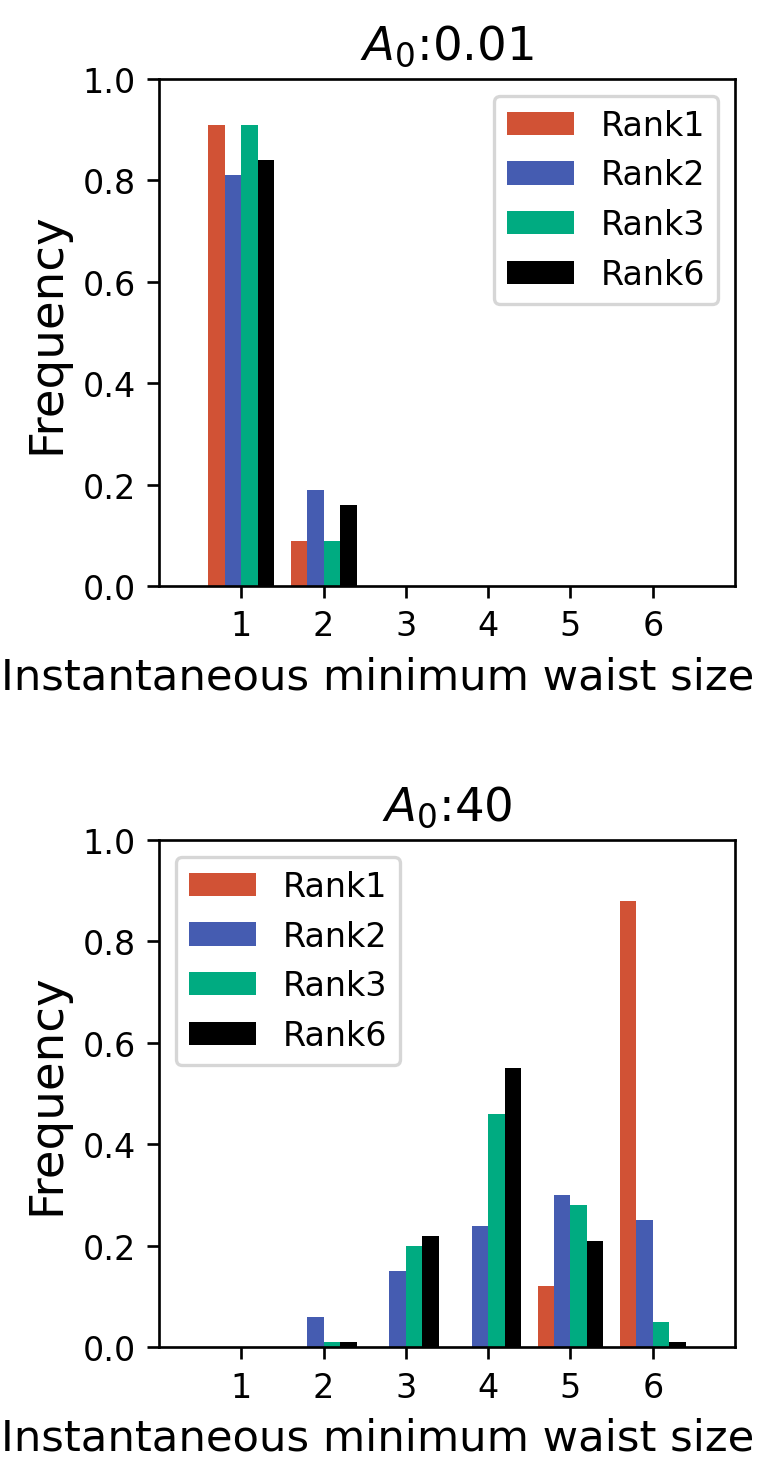

In [9]:
N001R1 = np.load("RidM2/N6L5_nNodeAlongTime_A0=001_R1_N100.npy",allow_pickle=True)
N001R2 = np.load("RidM2/N6L5_nNodeAlongTime_A0=001_R2_N100.npy",allow_pickle=True)
N001R3 = np.load("RidM2/N6L5_nNodeAlongTime_A0=001_R3_N100.npy",allow_pickle=True)
N001R6 = np.load("RidM2/N6L5_nNodeAlongTime_A0=001_R6_N100.npy",allow_pickle=True)
N40R1 = np.load("RidM2/N6L5_nNodeAlongTime_A0=40_R1_N100.npy",allow_pickle=True)
N40R2 = np.load("RidM2/N6L5_nNodeAlongTime_A0=40_R2_N100.npy",allow_pickle=True)
N40R3 = np.load("RidM2/N6L5_nNodeAlongTime_A0=40_R3_N100.npy",allow_pickle=True)
N40R6 = np.load("RidM2/N6L5_nNodeAlongTime_A0=40_R6_N100.npy",allow_pickle=True)

N001_data = [N001R1, N001R2, N001R3, N001R6]
N40_data = [N40R1, N40R2, N40R3, N40R6]

TimeCourseOfActiveNode(N001_data, N40_data, 6, "Fig3C.pdf")
HistogramOfMinimalWaist(N001_data, N40_data, "Fig3D.pdf")

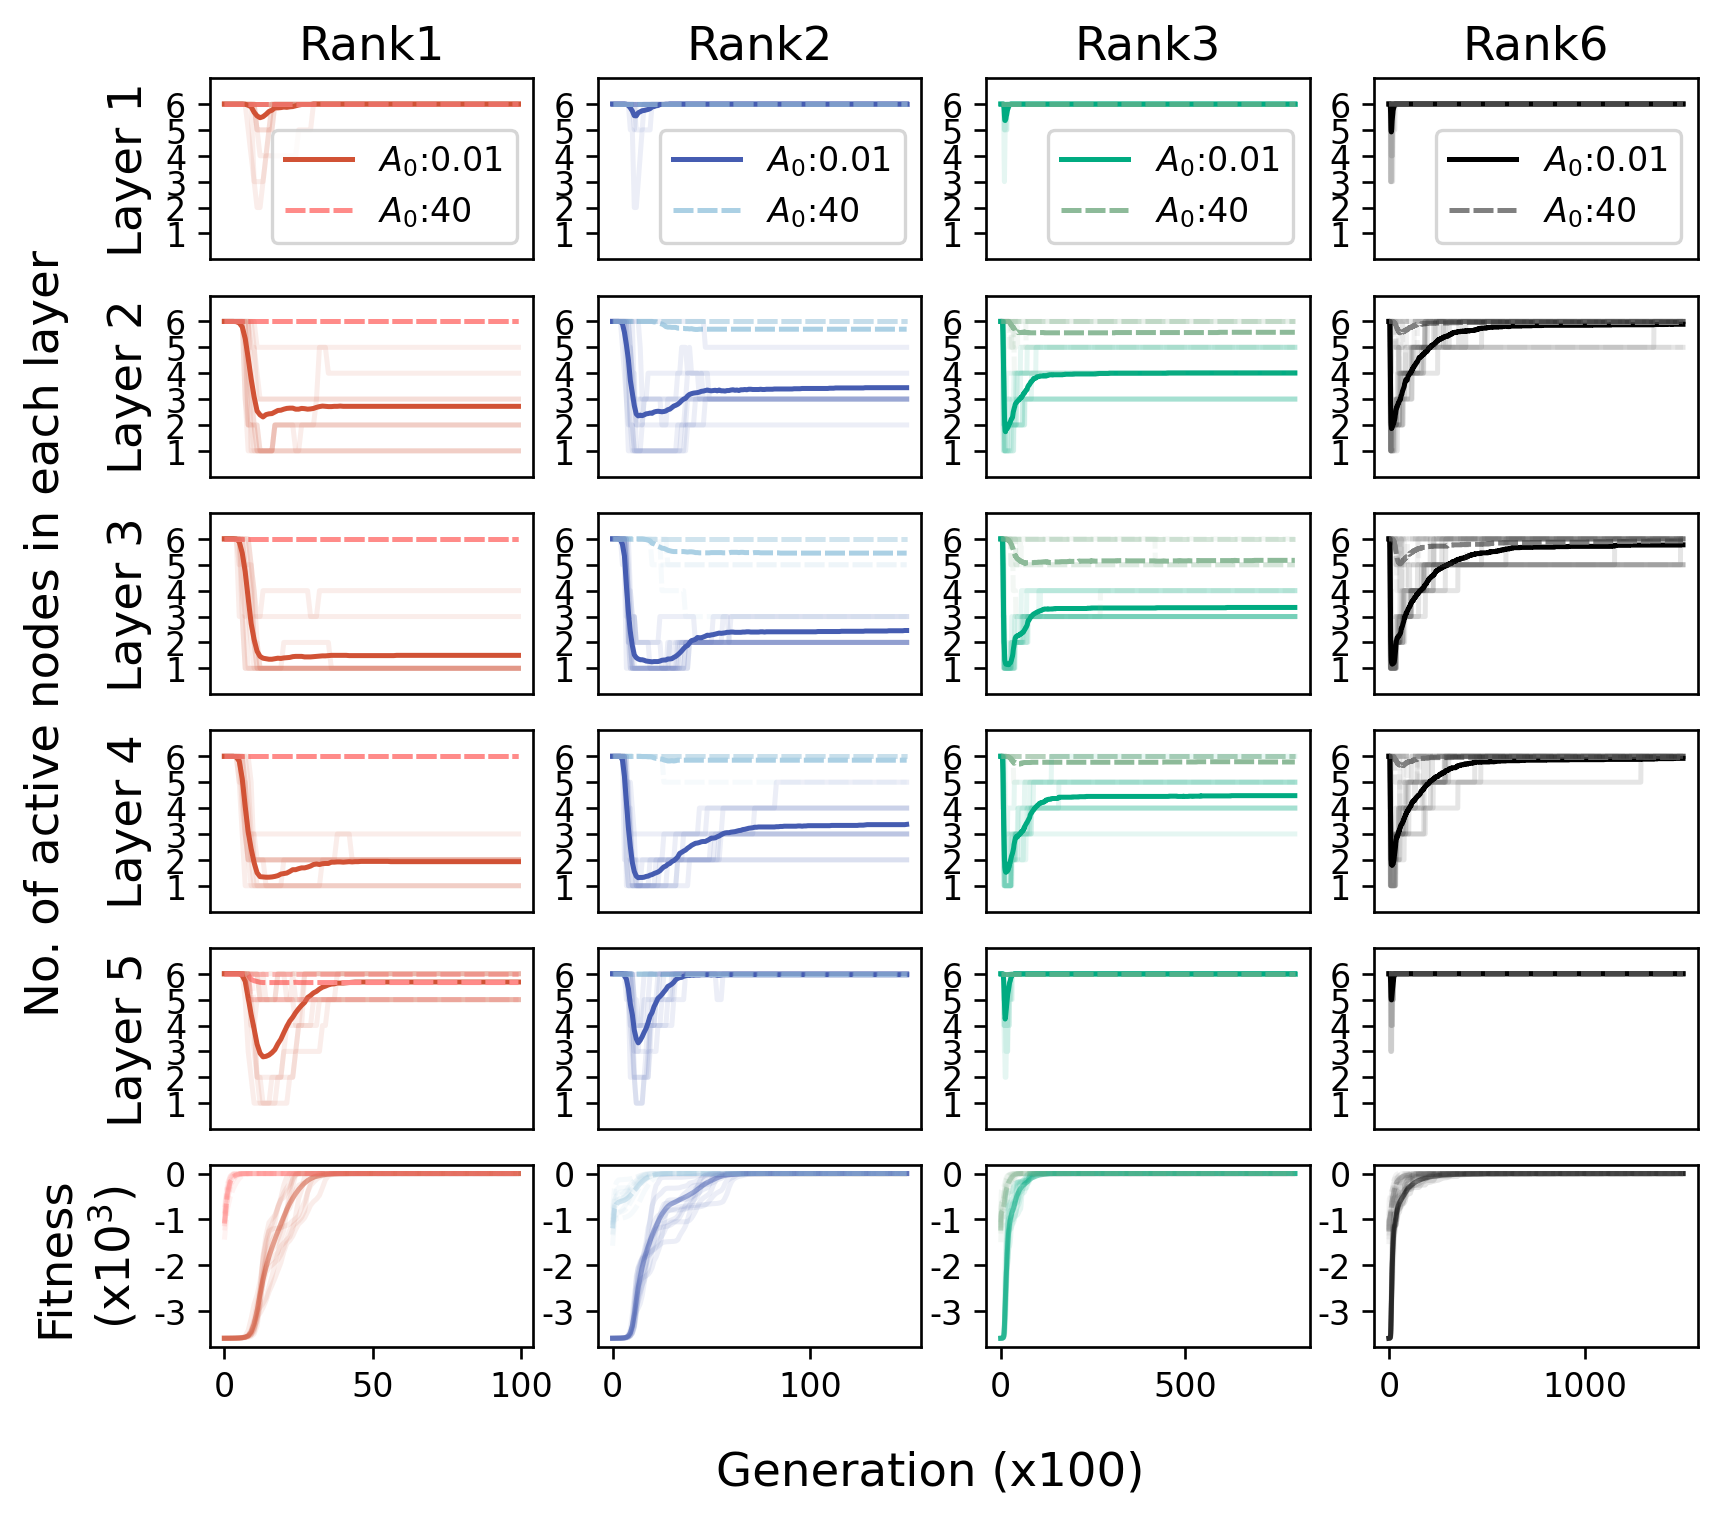

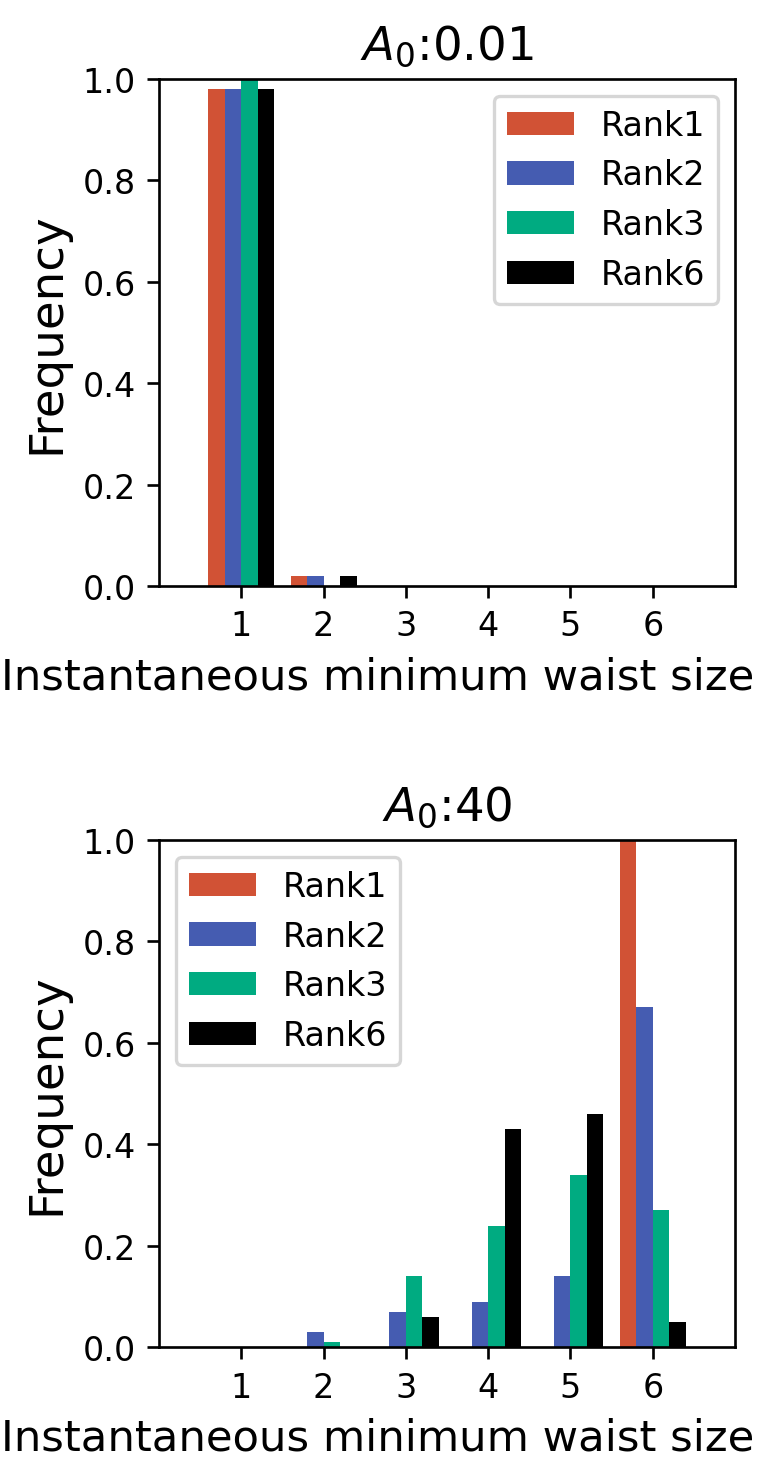

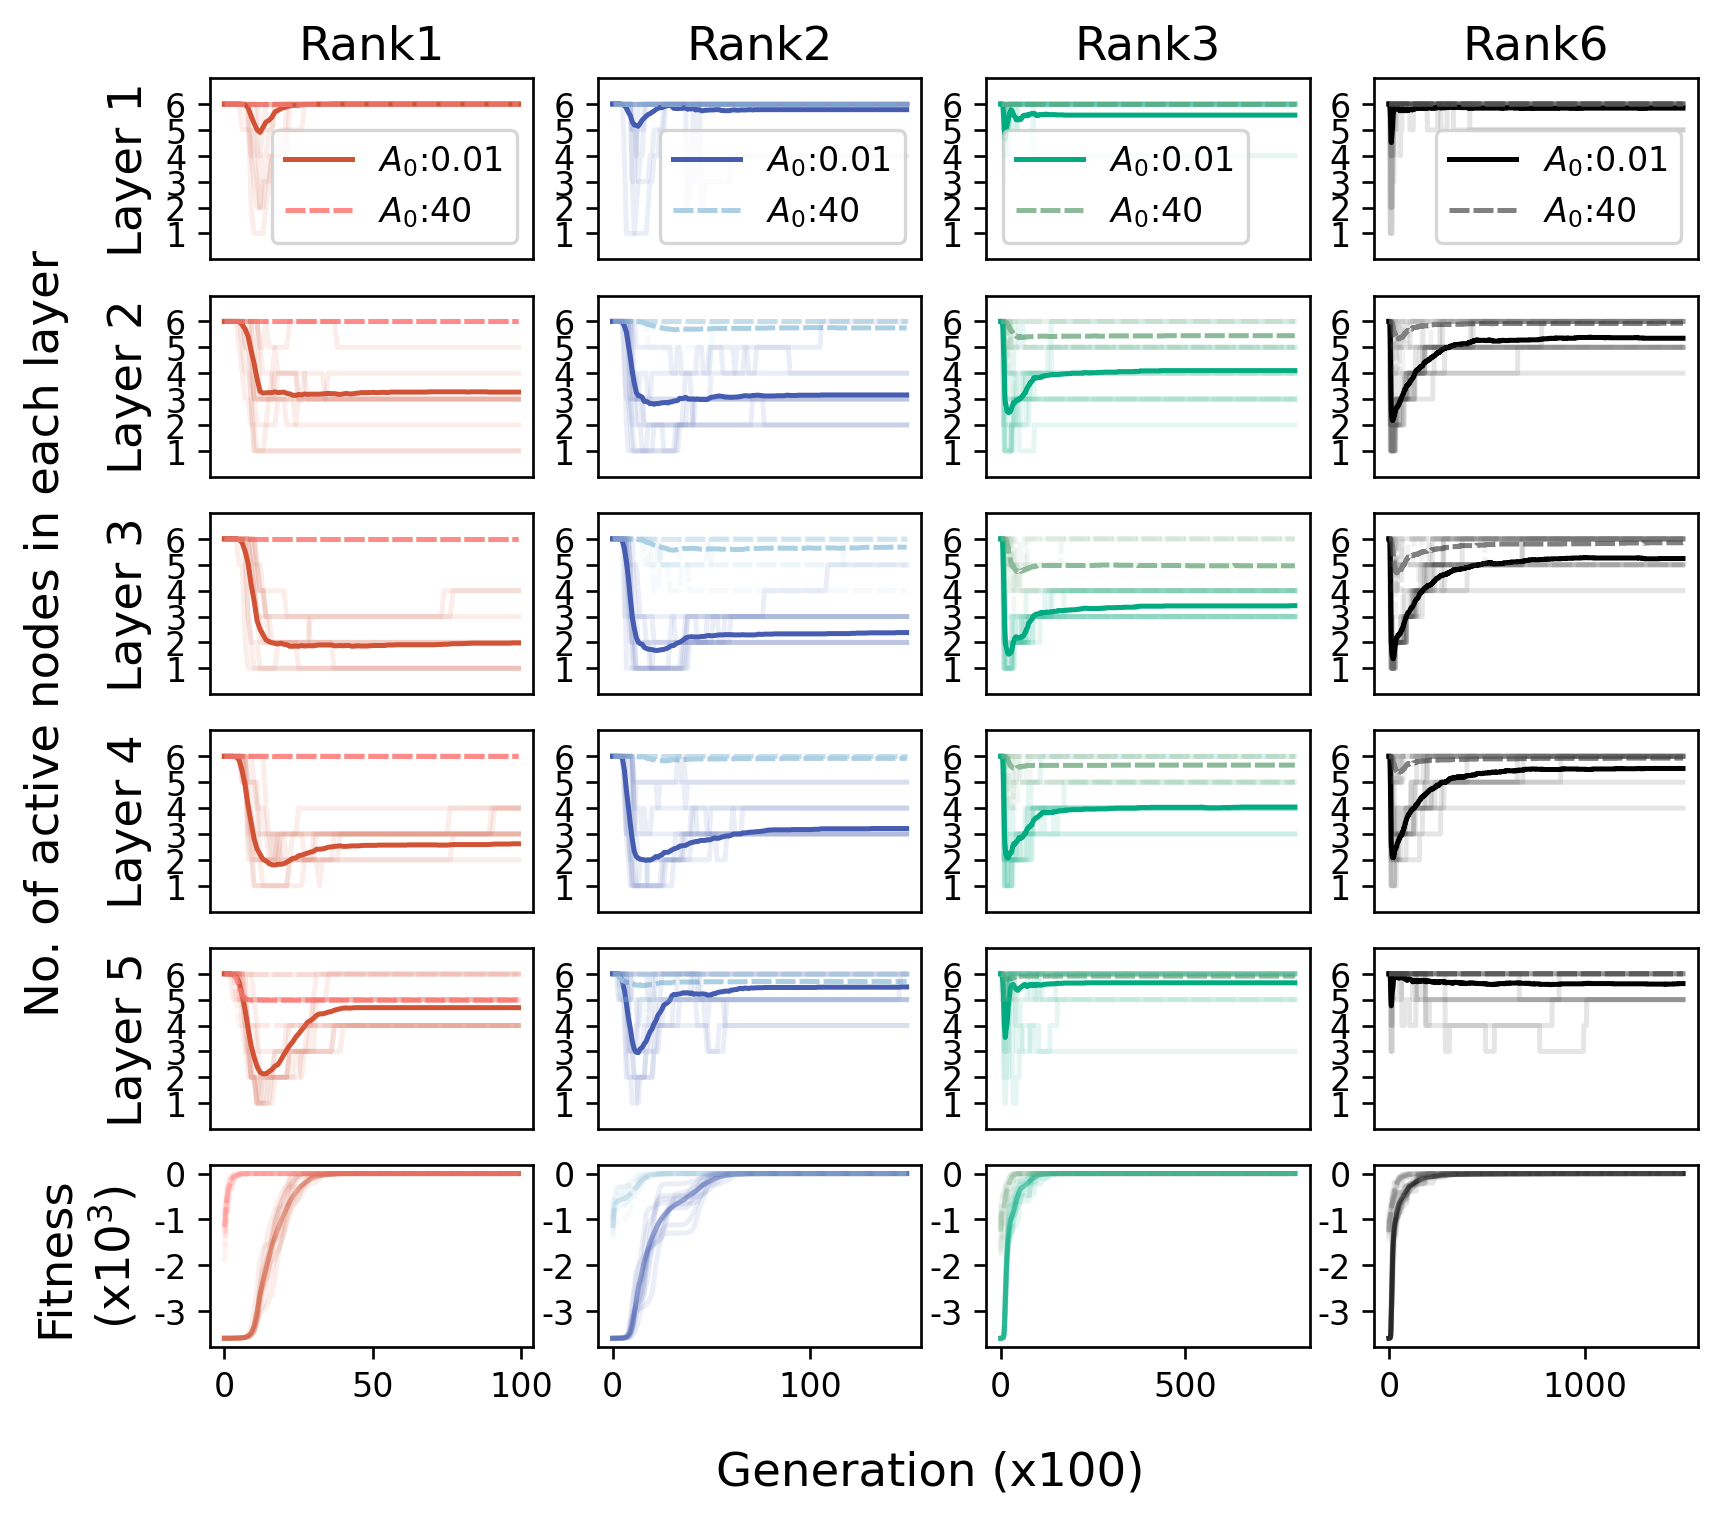

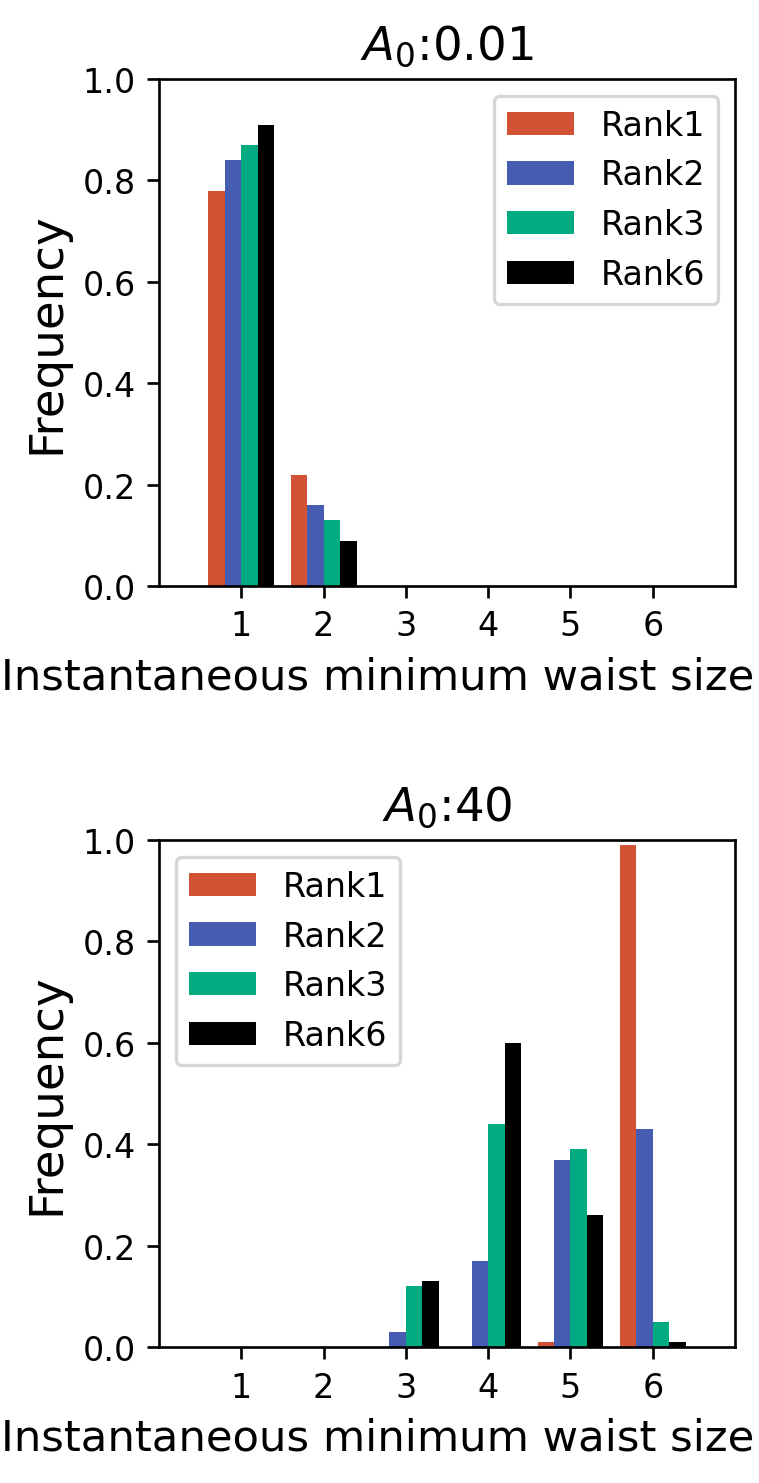

In [10]:
# Time evolution of the number of nodes in each layer 
#  Active node  definition: Relative value of maximum interaction from target node
# Goal matrix: Norm normalize
dir_ = "Rid1/"
N001R1 = np.load(f"{dir_}ReviseFig3cd_A0=001_R1_N100.npy")
N001R2 = np.load(f"{dir_}ReviseFig3cd_A0=001_R2_N100.npy")
N001R3 = np.load(f"{dir_}ReviseFig3cd_A0=001_R3_N100.npy")
N001R6 = np.load(f"{dir_}ReviseFig3cd_A0=001_R6_N100.npy")
N40R1 = np.load(f"{dir_}ReviseFig3cd_A0=40_R1_N100.npy")
N40R2 = np.load(f"{dir_}ReviseFig3cd_A0=40_R2_N100.npy")
N40R3 = np.load(f"{dir_}ReviseFig3cd_A0=40_R3_N100.npy")
N40R6 = np.load(f"{dir_}ReviseFig3cd_A0=40_R6_N100.npy")
N001_active_totalinout_data = [N001R1, N001R2, N001R3, N001R6]
N40_active_totalinout_data = [N40R1, N40R2, N40R3, N40R6]
TimeCourseOfActiveNode(N001_active_totalinout_data, N40_active_totalinout_data, 6, "SFig3A.pdf")
HistogramOfMinimalWaist(N001_active_totalinout_data, N40_active_totalinout_data, "SFig3B.pdf")


# Time evolution of the number of nodes in each layer 
# Active node  definition: Relative value of maximum interaction from target node
# Goal matrix: Norm normalize
dir_ = "Rid2/"
N001R1 = np.load(f"{dir_}Rid2_Fig3cd_A0=001_R1_Ad2.npy")
N001R2 = np.load(f"{dir_}Rid2_Fig3cd_A0=001_R2_Ad2.npy")
N001R3 = np.load(f"{dir_}Rid2_Fig3cd_A0=001_R3_Ad2.npy")
N001R6 = np.load(f"{dir_}Rid2_Fig3cd_A0=001_R6_Ad2.npy")
N40R1 = np.load(f"{dir_}Rid2_Fig3cd_A0=40_R1_Ad2.npy")
N40R2 = np.load(f"{dir_}Rid2_Fig3cd_A0=40_R2_Ad2.npy")
N40R3 = np.load(f"{dir_}Rid2_Fig3cd_A0=40_R3_Ad2.npy")
N40R6 = np.load(f"{dir_}Rid2_Fig3cd_A0=40_R6_Ad2.npy")
N001_active_maxint_data = [N001R1, N001R2, N001R3, N001R6]
N40_active_maxint_data = [N40R1, N40R2, N40R3, N40R6]
TimeCourseOfActiveNode(N001_active_maxint_data, N40_active_maxint_data, 6, "SFig3C.pdf")
HistogramOfMinimalWaist(N001_active_maxint_data, N40_active_maxint_data, "SFig3D.pdf")


'\ndir_ =  "Rid4/"\nN001R1 = np.load(f"{dir_}ReviseFig3cd_A0=001_R1_N100_VN.npy")\nN001R2 = np.load(f"{dir_}ReviseFig3cd_A0=001_R2_N100_VN.npy")\nN001R3 = np.load(f"{dir_}ReviseFig3cd_A0=001_R3_N100_VN.npy")\nN001R6 = np.load(f"{dir_}ReviseFig3cd_A0=001_R6_N100_VN.npy")\nN40R1 = np.load(f"{dir_}ReviseFig3cd_A0=40_R1_N100_VN.npy")\nN40R2 = np.load(f"{dir_}ReviseFig3cd_A0=40_R2_N100_VN.npy")\nN40R3 = np.load(f"{dir_}ReviseFig3cd_A0=40_R3_N100_VN.npy")\nN001_totalinout_data_VN = [N001R1, N001R2, N001R3, N001R6]\nN40_totalinout_data_VN = [N40R1, N40R2, N40R3, N40R6]\nTimeCourseOfActiveNode(N001_totalinout_data_VN, N40_totalinout_data_VN, 6, "SFig6a.tif")\nHistogramOfMinimalWaist(N001_totalinout_data_VN, N40_totalinout_data_VN, "SFig6c.tif")\n'

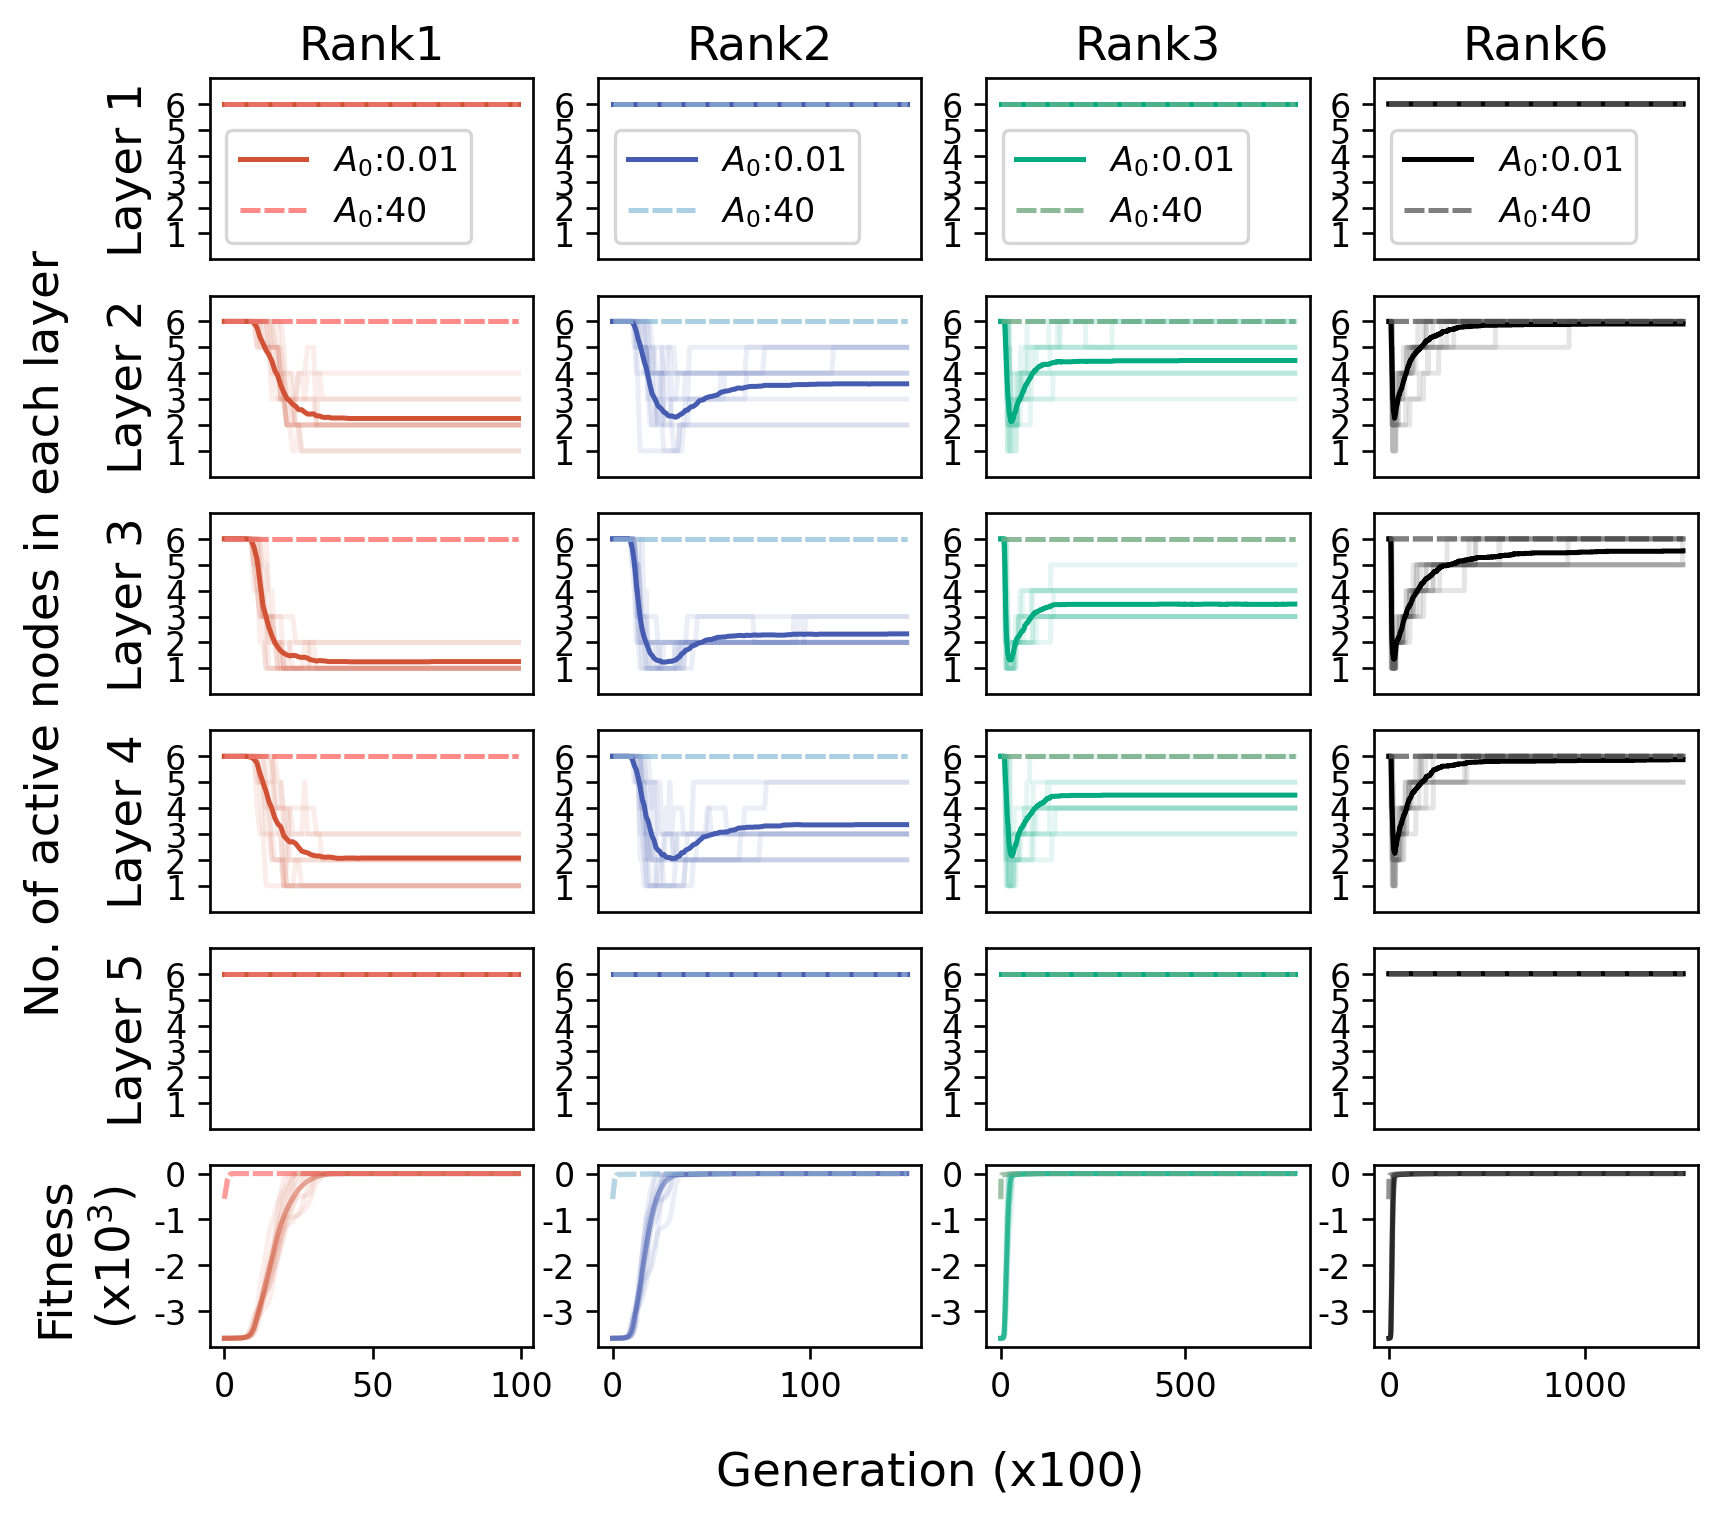

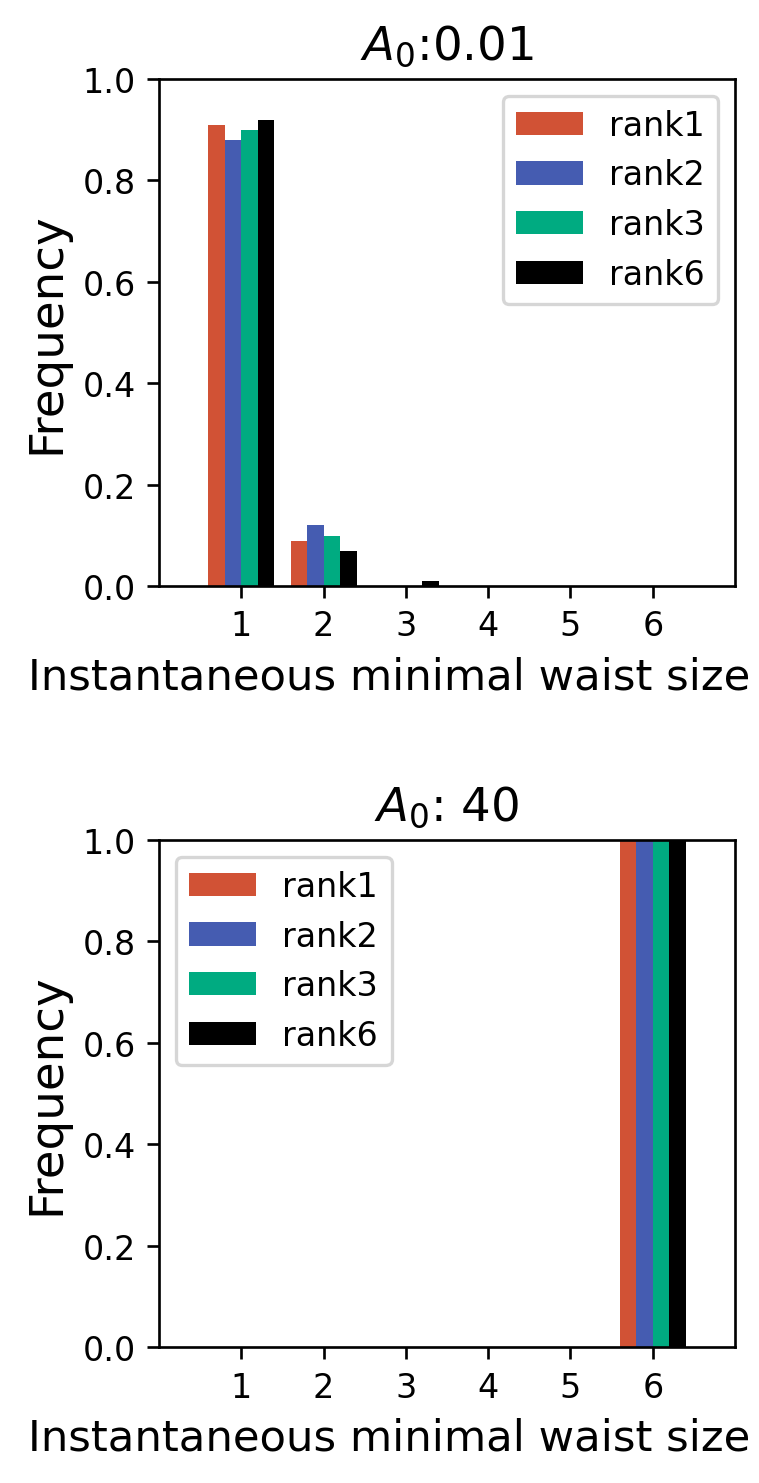

In [12]:
# Time evolution of the number of nodes in each layer
# Active node  definition: Relative contribution to the fitness
# Goal matrix: Norm and variance normalize
dir_ = "Rid3/"
N001R1 = np.load(f"{dir_}ReviseFig3cd_A0=001_R1_N100_VN_ANg.npy")
N001R2 = np.load(f"{dir_}ReviseFig3cd_A0=001_R2_N100_VN_ANg.npy")
N001R3 = np.load(f"{dir_}ReviseFig3cd_A0=001_R3_N100_VN_ANg.npy")
N001R6 = np.load(f"{dir_}ReviseFig3cd_A0=001_R6_N100_VN_ANg.npy")
N40R1 = np.load(f"{dir_}ReviseFig3cd_A0=40_R1_N100_VN_ANg.npy")
N40R2 = np.load(f"{dir_}ReviseFig3cd_A0=40_R2_N100_VN_ANg.npy")
N40R3 = np.load(f"{dir_}ReviseFig3cd_A0=40_R3_N100_VN_ANg.npy")
N40R6 = np.load(f"{dir_}ReviseFig3cd_A0=40_R6_N100_VN_ANg.npy")
N001_data_VN = [N001R1, N001R2, N001R3, N001R6]
N40_data_VN = [N40R1, N40R2, N40R3, N40R6]
TimeCourseOfActiveNode(N001_data_VN, N40_data_VN, 6, "SFig4B.pdf")
HistogramOfMinimalWaist(N001_data_VN, N40_data_VN, "SFig4C.pdf")


# Time evolution of the number of nodes in each layer 
# Active node  definition: Relative contribution to the total inout relation
# Goal matrix: Norm and variance normalize
"""
dir_ =  "Rid4/"
N001R1 = np.load(f"{dir_}ReviseFig3cd_A0=001_R1_N100_VN.npy")
N001R2 = np.load(f"{dir_}ReviseFig3cd_A0=001_R2_N100_VN.npy")
N001R3 = np.load(f"{dir_}ReviseFig3cd_A0=001_R3_N100_VN.npy")
N001R6 = np.load(f"{dir_}ReviseFig3cd_A0=001_R6_N100_VN.npy")
N40R1 = np.load(f"{dir_}ReviseFig3cd_A0=40_R1_N100_VN.npy")
N40R2 = np.load(f"{dir_}ReviseFig3cd_A0=40_R2_N100_VN.npy")
N40R3 = np.load(f"{dir_}ReviseFig3cd_A0=40_R3_N100_VN.npy")
N001_totalinout_data_VN = [N001R1, N001R2, N001R3, N001R6]
N40_totalinout_data_VN = [N40R1, N40R2, N40R3, N40R6]
TimeCourseOfActiveNode(N001_totalinout_data_VN, N40_totalinout_data_VN, 6, "SFig6a.tif")
HistogramOfMinimalWaist(N001_totalinout_data_VN, N40_totalinout_data_VN, "SFig6c.tif")
"""

(100, 100, 6)


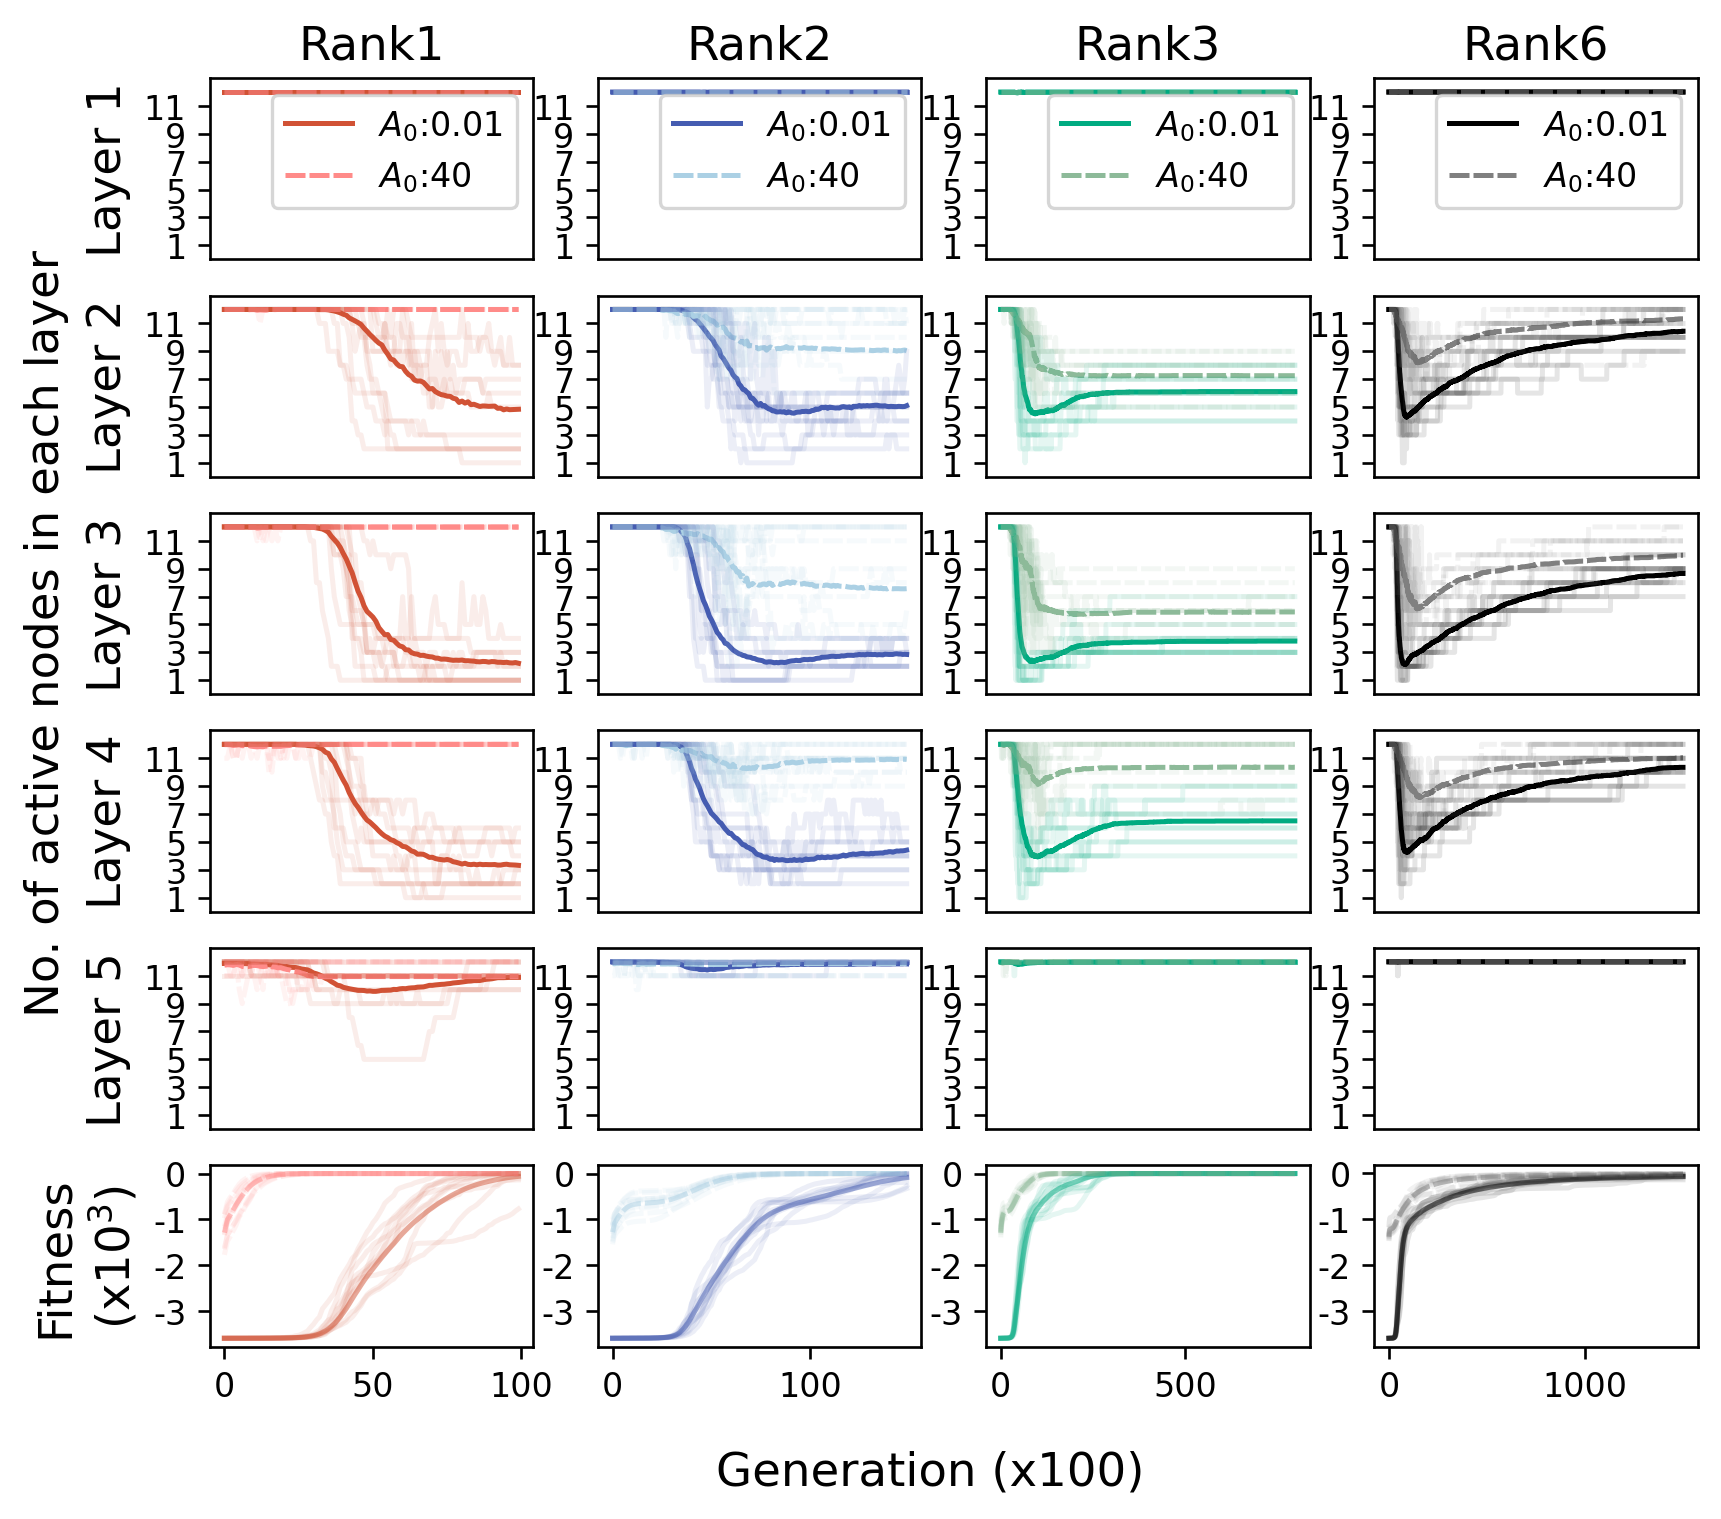

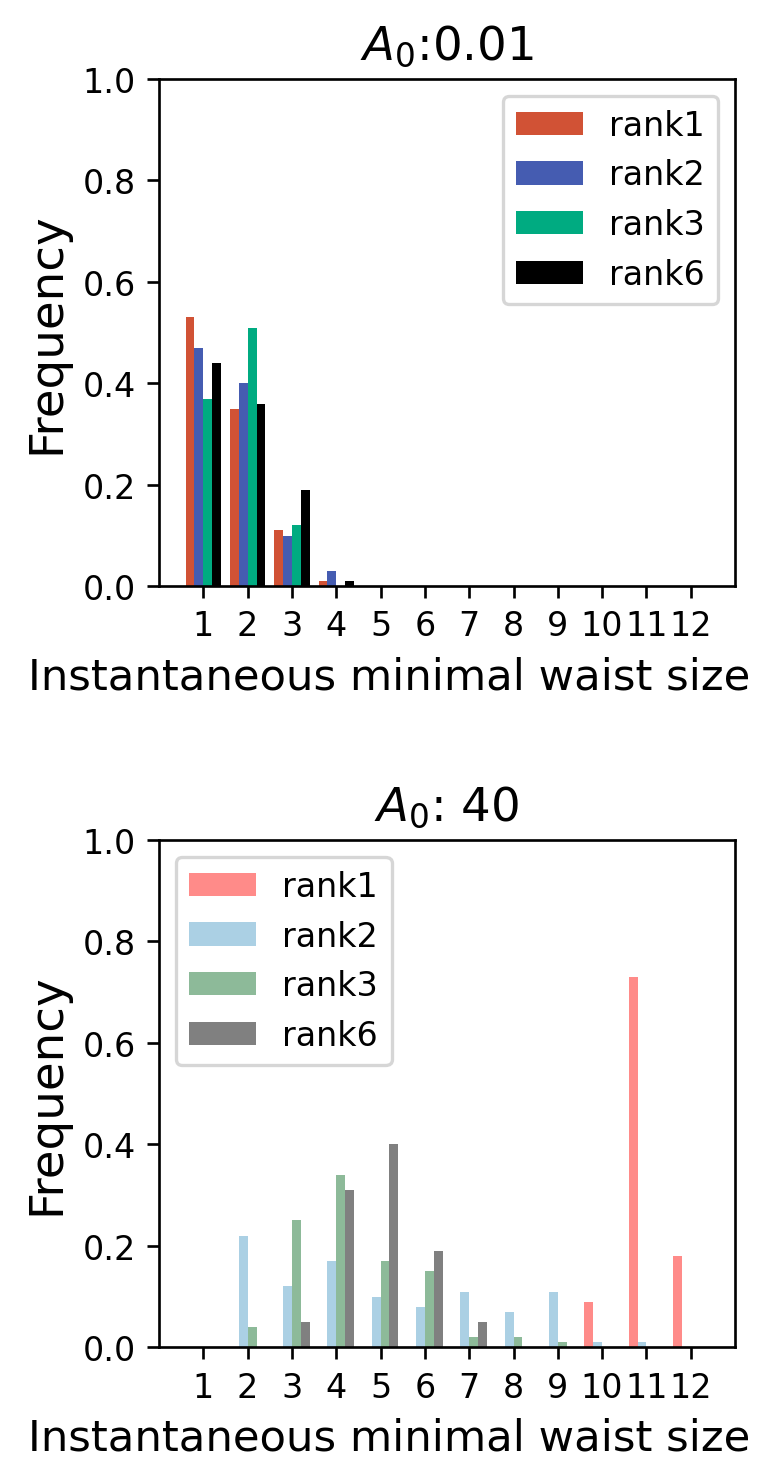

In [76]:
dir_ =  "Rid8/"
N001R1 = np.load(f"{dir_}Rid8_Fig3cd_A0=001_R1_N12.npy")
N001R2 = np.load(f"{dir_}Rid8_Fig3cd_A0=001_R2_N12.npy")
N001R3 = np.load(f"{dir_}Rid8_Fig3cd_A0=001_R3_N12.npy")
N001R6 = np.load(f"{dir_}Rid8_Fig3cd_A0=001_R6_N12.npy")
N40R1 = np.load(f"{dir_}Rid8_Fig3cd_A0=40_R1_N12.npy")
N40R2 = np.load(f"{dir_}Rid8_Fig3cd_A0=40_R2_N12.npy")
N40R3 = np.load(f"{dir_}Rid8_Fig3cd_A0=40_R3_N12.npy")
N40R6 = np.load(f"{dir_}Rid8_Fig3cd_A0=40_R6_N12.npy")
print(N001R1.shape)
N001_N12 = [N001R1, N001R2, N001R3, N001R6]
N40_N12 = [N40R1, N40R2, N40R3, N40R6]
TimeCourseOfActiveNode(N001_N12, N40_N12, 12, "S5Fig.tif")
HistogramOfMinimalWaist(N001_N12, N40_N12, "S5Fig_subhisto.pdf")

## Dependence of probability for being bow-tie on initial value 

In [91]:
def Deleted_fitness(Ind, node, layer):    
    modified_network =  copy.deepcopy(Ind.getGenom())
    Input_link_layer = layer - 1
    Output_link_layer = layer
    if layer == 0: #Eliminate input layer
        modified_network[Output_link_layer][:,node] = 0  #eliminate output
    elif layer == nLayer-1: #Eliminate output layer
        modified_network[Input_link_layer][node,] = 0   #eliminate input
    else: #Eliminate intermidiate layer
        modified_network[Input_link_layer][node,] = 0   #eliminate input from 
        modified_network[Output_link_layer][:,node] = 0

    orig_network = copy.deepcopy(Ind.getGenom())
    orig_fit = evaluation(orig_network, DesiredGoal)
    modi_fit = evaluation(modified_network, DesiredGoal)
    relative_fitness = abs(orig_fit-modi_fit)    
    return(relative_fitness)

def Deleted_totalinout(Ind, node, layer):
    modified_network =  copy.deepcopy(Ind.getGenom())
    Input_link_layer = layer - 1
    Output_link_layer = layer
    if layer == 0: #Eliminate input layer
        modified_network[Output_link_layer][:,node] = 0  #eliminate output
    elif layer == nLayer-1: #Eliminate output layer
        modified_network[Input_link_layer][node,] = 0   #eliminate input
    else: #Eliminate intermidiate layer
        modified_network[Input_link_layer][node,] = 0   #eliminate input from 
        modified_network[Output_link_layer][:,node] = 0
    orig_network = copy.deepcopy(Ind.getGenom())
    diff = Total_in_out(orig_network) - Total_in_out(modified_network)
    relative_fitness = np.sum(diff**2)  
    return(relative_fitness)


def MaximumInteraction(Ind, node, layer):
    inmax,outmax = 0,0
    if layer > 0:
        inmax = max(Ind.getGenom()[layer-1][node,:])
    if layer < nLayer-1:
        outmax = max(Ind.getGenom()[layer][:,node])
    #threshold: 0.05
    return max(inmax,outmax)

def Relative_fitness_in_layer(layer, mode, Ind):
    if ActiveNodeDefinition == 0:
        relative_fitness = [(Deleted_fitness(Ind, node, layer)) for node in range(nNode)]
        threshold = 0.001
    elif ActiveNodeDefinition == 1:
        relative_fitness = [(Deleted_totalinout(Ind, node, layer)) for node in range(nNode)]
        threshold = 0.001
    elif ActiveNodeDefinition == 2:
        relative_fitness = [(MaximumInteraction(Ind, node, layer)) for node in range(nNode)]
        threshold = 0.05
    relative_fitness_in_layer = relative_fitness/sum(relative_fitness)
    active_node_test = np.where(relative_fitness_in_layer > threshold,  1, 0)
    if mode == "result":
        return(sum(active_node_test))
    elif mode == "test":
        return(active_node_test)

def Active_node(Ind, mode):
    active_node_list = [Relative_fitness_in_layer(layer, mode, Ind) for layer in range(nLayer)]
    return(active_node_list)

def evaluation(Ind_network, DesiredGoal):
    z = Total_in_out(Ind_network)
    fitness = -1*np.sum((z - DesiredGoal)**2) 
    return fitness


def Total_in_out(Ind):
    z = np.dot(Ind[nMatrix -1], Ind[nMatrix -2])
    for i in range(nMatrix -3, -1, -1):
        z = np.dot(z, Ind[i])
    return z

def BowTieJudge(network, mode):
    if nNode != 6: raise ValueError("node must be 6")
    if mode == "strict":
        if Active_node_in_MATLAB(network,'result')[2] == 1:
            return 1
        else:
            return 0
    elif mode == "loose":
        if Active_node_in_MATLAB(network, 'result')[2] <= 5:
            return 1
        else:
            return 0
    else: raise ValueErorr("Specify strict or loose mode")
        
def ProbCalculate(replicate_set, mode):
    #Exclude non adapted networks
    adapted_networks = [network for network in replicate_set if np.sum(np.isnan(network)) == 0]
    num = len(adapted_networks)
    problist = [BowTieJudge(adapted_networks[replicate_id], mode) for replicate_id in range(num)]
    return sum(problist)/num


Length of init value:19


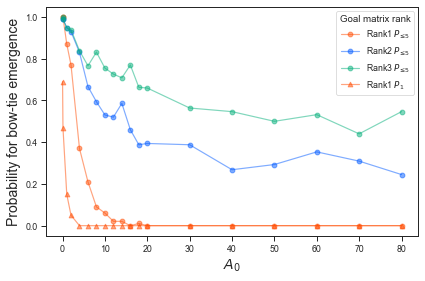

In [94]:
dir_ = "Rid6/"
initvalue = [0.01, 0.1, 1.0, 2.0, 4.0, 6.0, 8.0, 10, 12, 14, 16, 18, 20, 30, 40, 50, 60, 70, 80]
Rid6R1 = np.load(f"{dir_}Rid6_R1_END.npy", allow_pickle=True)
Rid6R2 = np.load(f"{dir_}Rid6_R2_END.npy", allow_pickle=True)
Rid6R3 = np.load(f"{dir_}Rid6_R3_END.npy", allow_pickle=True)
#Rid6R6 = np.load(f"{dir_}Rid6_R6_END.npy", allow_pickle=True)


Rid6data = [Rid6R1, Rid6R2, Rid6R3]
print(f"Length of init value:{len(initvalue)}")

# shape: 19 x 100 x 4 x 6 x 6, 
# length of InitValue x replicate run time x network (#layer x #node x #node)")
nMatrix = 4
nLayer = 5
nNode = 6
prob_strict = [[ProbCalculate(Rid6data[rank_id][initvalue_id], "strict") for initvalue_id in range(len(initvalue))] for rank_id in range(3)]
prob_loose = [[ProbCalculate(Rid6data[rank_id][initvalue_id], "loose") for initvalue_id in range(len(initvalue))] for rank_id in range(3)]
initialvalue = [0.01, 0.1, 1.0, 2.0, 4.0, 6.0, 8.0, 10, 12, 14, 16, 18, 20, 30, 40, 50, 60, 70, 80]
colors = ["#ff4b00", "#005aff","#03af7a", "#000000"]      # 各プロットの色
labels_S = ["Rank1 $P_1$","Rank2 $P_1$", "Rank3 $P_1$", "Rank6 $P_1$"]   # 各ラベル
labels_L = ["Rank1 $P_{≤5}$","Rank2 $P_{≤5}$", "Rank3 $P_{≤5}$", "Rank6 $P_{≤5}$"]   # 各ラベル
plt.figure(figsize=(6,4), facecolor="white")
[plt.plot(initialvalue, prob_loose[i], color=colors[i],label=labels_L[i], marker="o", alpha=0.5) for i in range(3)]
plt.plot(initialvalue, prob_strict[0],color=colors[0], label=labels_S[0], marker="^",alpha=0.5)
    
plt.xlabel('$A_{0}$',size=14)  # x軸ラベル
plt.ylabel('Probability for bow-tie emergence',size=14)  # y軸ラベル
#plt.xlim(-1, 21)
plt.legend(loc=1, title="Goal matrix rank")    # 凡例
plt.tight_layout()  # レイアウトの設定
matplotlib.rcParams['pdf.fonttype'] = 42

#plt.savefig("Figures/SFig2.eps")

### Calculation of end state waist

In [42]:
def evaluation(Ind_network, DesiredGoal):
    z = Total_in_out(Ind_network)
    fitness = -1*np.sum((z - DesiredGoal)**2) #the sum of squares of elements
    return fitness
    
def Total_in_out(Ind):
    z = np.dot(Ind[nMatrix -1], Ind[nMatrix -2])
    for i in range(nMatrix -3, -1, -1):
        z = np.dot(z, Ind[i])
    return z

def Deleted_fitness(Ind,  DesiredGoal, node, layer):    
    modified_network =  Ind.copy()
    Input_link_layer = layer - 1
    Output_link_layer = layer
    if layer == 0: #Eliminate input layer
        modified_network[Output_link_layer][:,node] = 0  #eliminate output
    elif layer == nLayer-1: #Eliminate output layer
        modified_network[Input_link_layer][node,] = 0   #eliminate input
    else: #Eliminate intermidiate layer
        modified_network[Input_link_layer][node,] = 0   #eliminate input from 
        modified_network[Output_link_layer][:,node] = 0
    orig_network = Ind.copy()
    
    ##Active node definition
    
    #fitness dependent active node
    orig_fit = evaluation(orig_network, DesiredGoal)
    modi_fit = evaluation(modified_network, DesiredGoal)
    relative_fitness = abs(orig_fit-modi_fit)
    
    #fitness independent active node
    #diff = Total_in_out(orig_network) - Total_in_out(modified_network)
    #relative_fitness = np.sum(diff**2)
    return(relative_fitness)



def Relative_fitness_in_layer(Ind,  DesiredGoal, layer, mode, ):
    relative_fitness = [(Deleted_fitness(Ind, DesiredGoal, node, layer)) for node in range(nNode)]
    #relative_fitness = [MaximumInteraction(Ind, node, layer) for node in range(nNode)]
    relative_fitness_in_layer = relative_fitness/sum(relative_fitness)
    active_node_test = np.where(relative_fitness_in_layer > 0.001,  1, 0)
    #active_node_test = np.where(relative_fitness_in_layer > 0.05,  1, 0)
    if mode == "result":
        return(sum(active_node_test))
    elif mode == "test":
        return(active_node_test)

def Active_node(Ind, DesiredGoal, mode):
    #orig_fit = abs(evaluation(Ind.getGenom(), DesiredGoal))
    active_node_list = [Relative_fitness_in_layer(Ind,DesiredGoal, layer, mode) for layer in range(nLayer)]
    return(active_node_list)

def ExcludeNonValidRun(init_sample_sets):
    compress_networks = [np.mean(init_sample) for init_sample in init_sample_sets] 
    nan_index = [i for i in range(100) if np.isnan(compress_networks[i])]
    valid_networks = np.delete(init_sample_sets, nan_index)
    return valid_networks

In [20]:
dir_ = "Rid6/"
initvalue = [0.01, 0.1, 1.0, 2.0, 4.0, 6.0, 8.0, 10, 12, 14, 16, 18, 20, 30, 40, 50, 60, 70, 80]
Rid6R1 = np.load(f"{dir_}Rid6_R1_END.npy", allow_pickle=True)
Rid6R2 = np.load(f"{dir_}Rid6_R2_END.npy", allow_pickle=True)
Rid6R3 = np.load(f"{dir_}Rid6_R3_END.npy", allow_pickle=True)
Rid6R6 = np.load(f"{dir_}Rid6_R6_END.npy", allow_pickle=True)
Rid6R1Goal = np.load(f"{dir_}Rid6_R1_GOAL.npy", allow_pickle=True)
Rid6R2Goal = np.load(f"{dir_}Rid6_R2_GOAL.npy", allow_pickle=True)
Rid6R3Goal = np.load(f"{dir_}Rid6_R3_GOAL.npy", allow_pickle=True)
Rid6R6Goal = np.load(f"{dir_}Rid6_R6_GOAL.npy", allow_pickle=True)
print(Rid6R1.shape)

nLayer = 5
nNode = 6
nMatrix = 4
#ave = [effective_active_node_of(Rid6R1[18][i], Rid6R1Goal[0][0], "result") for i in range(100)]

def ExcludeNonValidRun(sample_sets, goal_sets):
    nan_index = [i for i in range(100) if np.sum(np.isnan(sample_sets[i]))==1]
    valid_networks = np.delete(sample_sets, nan_index)
    valid_goal_sets = np.delete(goal_sets, nan_index)
    return valid_networks, valid_goal_sets

RidData = [Rid6R1, Rid6R2, Rid6R3, Rid6R6]
RidGoal = [Rid6R1Goal, Rid6R2Goal, Rid6R3Goal, Rid6R6Goal]

AVE_R = list()
STD_R = list()
for rid_id in range(4):
    ave_rank = list()
    std_rank = list()
    print(rid_id)
    for initvalueid in range(len(initvalue)):
        net,goal = ExcludeNonValidRun(RidData[rid_id][initvalueid], RidGoal[rid_id][initvalueid])
        print("sample:{}".format(len(net)))
        ave = np.mean([Active_node(net[ind_id], goal[ind_id], "result") for ind_id in range(len(net))])
        std = np.std([Active_node(net[ind_id], goal[ind_id], "result") for ind_id in range(len(net))])
        ave_rank.append(ave)
        std_rank.append(std)
        print(ave)
    AVE_R.append(ave_rank)
    STD_R.append(std_rank)

(19, 100)
0
sample:100
3.538
sample:100
3.928
sample:100
4.804
sample:100
5.202
sample:100
5.688
sample:100
5.816
sample:100
5.894
sample:99
5.907070707070707
sample:96
5.927083333333333
sample:97
5.91958762886598
sample:96
5.9375
sample:96
5.9375
sample:100
5.93
sample:93
5.946236559139785
sample:95
5.932631578947368
sample:99
5.925252525252525
sample:98
5.9346938775510205
sample:97
5.942268041237114
sample:100
5.944
1
sample:98
4.210204081632653
sample:100
4.428
sample:99
4.828282828282828
sample:100
5.05
sample:100
5.344
sample:99
5.424242424242424
sample:96
5.558333333333334
sample:98
5.583673469387755
sample:100
5.622
sample:99
5.575757575757576
sample:100
5.672
sample:98
5.748979591836735
sample:99
5.709090909090909
sample:98
5.736734693877551
sample:97
5.806185567010309
sample:99
5.836363636363636
sample:99
5.848484848484849
sample:97
5.783505154639175
sample:98
5.791836734693877
2
sample:96
4.727083333333334
sample:98
4.865306122448979
sample:97
5.167010309278351
sample:98
5.20

[3.538, 3.928, 4.804, 5.202, 5.688, 5.816, 5.894, 5.907070707070707, 5.927083333333333, 5.91958762886598, 5.9375, 5.9375, 5.93, 5.946236559139785, 5.932631578947368, 5.925252525252525, 5.9346938775510205, 5.942268041237114, 5.944]


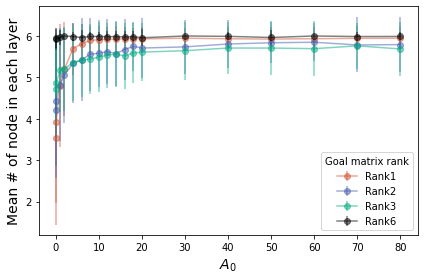

In [24]:
GoalMatirxSize = 60
#colors = ["#ff4b00", "#005aff","#03af7a", "#000000"]      # 各プロットの色
colors = ["#D15235", "#455CB1", "#00AB81",  "#000000"]
labels = ["Rank1","Rank2", "Rank3", "Rank6"]   # 各ラベル
figsize = [6,4]
fig, ax = plt.subplots(figsize=(figsize[0],figsize[1]), facecolor="white")
inset = False
if inset: axins = ax.inset_axes([0.55, 0.48, 0.4, 0.4])
X = [1,10,20,30,40,50]
X  = [0.01, 0.1, 1.0, 2.0, 4.0, 6.0, 8.0, 10, 12, 14, 16, 18, 20, 30, 40, 50, 60, 70, 80]

print(AVE_R[0])
for i in range(4):
    #ws = waist_size_data[i]
    ax.errorbar(X, AVE_R[i], yerr=STD_R[i], 
                color=colors[i], label=labels[i], alpha=0.5, marker="o")
    if inset:
        axins.errorbar(X, ws.loc[:, "waist_mean"], yerr=ws.loc[:, "waist_std"], 
                color=colors[i], label=labels[i], alpha=0.5, marker="o")

ax.set_xlabel('$A_0$',size=14)  # x軸ラベル
ax.set_ylabel('Mean # of node in each layer',size=14)  # y軸ラベル
#ax.set_ylim(0.5,6.5)
ax.legend(loc=4, title="Goal matrix rank")    # 凡例

if inset:
    axins.set_xlim(-1, 11)
    axins.set_ylim(0.5, 6.5)


plt.tight_layout()  # レイアウトの設定
matplotlib.rcParams['pdf.fonttype'] = 42
#plt.savefig("Figures/SFig?_Varinace.eps")

## Dependence of minimal waist network reaches on the int value

> This calculation takes a time ~ 5min


In [47]:
dir_ = "Rid6/"
initvalue = [0.01, 0.1, 1.0, 2.0, 4.0, 6.0, 8.0, 10, 12, 14, 16, 18, 20, 30, 40, 50, 60, 70, 80]
#initvalue = [1,10,20,30,40,50]
nMatrix = 4
nLayer = 5
nNode = 6

Rid6R1 = np.load(f"{dir_}Rid6_R1_INIT.npy", allow_pickle=True)
Rid6R2 = np.load(f"{dir_}Rid6_R2_INIT.npy", allow_pickle=True)
Rid6R3 = np.load(f"{dir_}Rid6_R3_INIT.npy", allow_pickle=True)
Rid6R6 = np.load(f"{dir_}Rid6_R6_INIT.npy", allow_pickle=True)

Rid6R1Goal = np.load(f"{dir_}Rid6_R1_GOAL.npy", allow_pickle=True)
Rid6R2Goal = np.load(f"{dir_}Rid6_R2_GOAL.npy", allow_pickle=True)
Rid6R3Goal = np.load(f"{dir_}Rid6_R3_GOAL.npy", allow_pickle=True)
Rid6R6Goal = np.load(f"{dir_}Rid6_R6_GOAL.npy", allow_pickle=True)


Rid6Initdata = [Rid6R1, Rid6R2, Rid6R3, Rid6R6]
RidGoal = [Rid6R1Goal, Rid6R2Goal, Rid6R3Goal, Rid6R6Goal]

print(Rid6R1Goal.shape)
print(Rid6R1[0][0])

def ExcludeNonValidRun(sample_sets, goal_sets):
    nan_index = [i for i in range(100) if np.sum(np.isnan(sample_sets[i]))==1]
    valid_networks = np.delete(sample_sets, nan_index)
    valid_goal_sets = np.delete(goal_sets, nan_index)
    return valid_networks, valid_goal_sets


def CalcMeanMinWaist(valid_init_sample_sets, valid_goal_sets):
    min_waist_in_each_run = [min(
        [Active_node(valid_init_sample_sets[run_id][time], valid_goal_sets[run_id], mode="result")[2] 
             for time in range(len(valid_init_sample_sets[run_id]))]) 
        for run_id in range(len(valid_init_sample_sets))] 
    replicate_mean_of_min_waist = np.mean(min_waist_in_each_run)
    replicate_std_of_min_waist = np.std(min_waist_in_each_run)
    return replicate_mean_of_min_waist, replicate_std_of_min_waist
        

for rank_id in range(4):
    print("========= rank id: {} ===========".format(rank_id))
    for initial_value_id in range(len(initvalue)):#range(19):
        rank_data = Rid6Initdata[rank_id]
        goal_data = RidGoal[rank_id]
        valid_init_sample, valid_goal_sets = ExcludeNonValidRun(rank_data[initial_value_id],  goal_data[initial_value_id])
        mean, std = CalcMeanMinWaist(valid_init_sample, valid_goal_sets)
        result_list[rank_id][initial_value_id][0] = mean
        result_list[rank_id][initial_value_id][1] = std
        
        #print("Initial value: {}".format(initvalue[initial_value_id]))
        #print("#sample{}".format(valid_network.shape))
        print("mean: {}, std: {}".format(mean, std))
        #print("result {}\n".format(result_list[rank_id][initial_value_id]))


(19, 100)
[array([[[0.09082091, 0.0589054 , 0.0474768 , 0.08488117, 0.02364323,
         0.08034512],
        [0.03645023, 0.02094713, 0.01657781, 0.01247151, 0.05981542,
         0.03588057],
        [0.02767613, 0.06275491, 0.03036891, 0.01693681, 0.04211322,
         0.00818358],
        [0.04451256, 0.01773299, 0.03950443, 0.01353943, 0.01358596,
         0.07514055],
        [0.0314185 , 0.0363298 , 0.08754223, 0.09280173, 0.01412672,
         0.05342782],
        [0.06936907, 0.04362899, 0.08298064, 0.05070751, 0.06774792,
         0.10229465]],

       [[0.07555487, 0.06540542, 0.05635876, 0.08663768, 0.07072719,
         0.03781445],
        [0.02329895, 0.05737967, 0.0496468 , 0.03904626, 0.08842318,
         0.0351273 ],
        [0.05536518, 0.03278547, 0.04338777, 0.02241378, 0.01465112,
         0.05364494],
        [0.0005205 , 0.08801488, 0.09864004, 0.03610755, 0.01764479,
         0.05882007],
        [0.04818697, 0.09853304, 0.02107898, 0.03359079, 0.04614453,
        

mean: 1.25, std: 0.5361902647381804
mean: 1.7, std: 0.8306623862918074
mean: 3.09, std: 1.4906039044628858
mean: 3.95, std: 1.4168627315304754
mean: 5.14, std: 1.0101485039339513
mean: 5.56, std: 0.6681317235396027
mean: 5.76, std: 0.49234134500364685
mean: 5.878787878787879, std: 0.35598000377184036
mean: 5.875, std: 0.36084391824351614
mean: 5.917525773195877, std: 0.3103075658410807
mean: 5.854166666666667, std: 0.40771637064126925
mean: 5.9375, std: 0.2818281095514309
mean: 5.98, std: 0.13999999999999999
mean: 5.956989247311828, std: 0.20288131466788398
mean: 5.989473684210527, std: 0.1020564180508701
mean: 5.96969696969697, std: 0.17141982574219336
mean: 5.928571428571429, std: 0.2575393768188564
mean: 5.979381443298969, std: 0.14210359538237347
mean: 5.94, std: 0.23748684174075832
========= rank id: 1 ===========
mean: 1.3775510204081634, std: 0.692751186632395
mean: 1.45, std: 0.7123903424387504
mean: 2.5555555555555554, std: 0.9971902164189443
mean: 3.05, std: 0.952627944162882

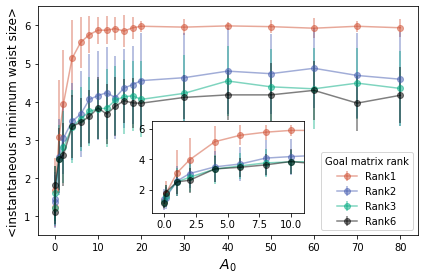

In [49]:
colors = ["#D15235", "#455CB1", "#00AB81",  "#000000"]
labels = ["Rank1","Rank2", "Rank3", "Rank6"]   # 各ラベル
#plt.grid(alpha=0.2)            # 罫線
#plt.figure(figsize=(6,4), facecolor="white")
fig, ax = plt.subplots(figsize=(6, 4), facecolor="white")
#axins = ax.inset_axes([0.55, 0.48, 0.4, 0.4])
axins = ax.inset_axes([0.3, 0.1, 0.4, 0.4])
for rank_id in range(4):
    ax.errorbar(initvalue, result_list[rank_id][:,0], 
                 yerr=result_list[rank_id][:,1], color=colors[rank_id], 
                 label=labels[rank_id], alpha=0.5, marker="o")
    #plt.scatter(initvalue, GPR.loc[:, "waist_mean"], color=colors[i], alpha=0.5)
    
    axins.errorbar(initvalue, result_list[rank_id][:,0], 
                 yerr=result_list[rank_id][:,1], color=colors[rank_id], 
                label=labels[rank_id], alpha=0.5, marker="o")
    

ax.set_xlabel('$A_{0}$',size=14)  # x軸ラベル
#ax.set_ylabel('Mean no. of active nodes in waist',size=14)  # y軸ラベル
ax.set_ylabel('<instantaneous minimum waist size>',size=12)  # y軸ラベル
ax.set_ylim(0.5,6.5)
axins.set_ylim(0.5,6.5)
axins.set_xlim(-1,11)
ax.legend(loc=4, title="Goal matrix rank")    # 凡例
plt.tight_layout()  # レイアウトの設定
matplotlib.rcParams['pdf.fonttype'] = 42
#plt.savefig("Figures/S6Fig.eps")

### early phase of evolution

===Explanation of data structure (Data contents: # of nodes in each layer)===

Data structure: #replicate x evolution time (x10^2) x [#Layer(5) + Fitness(1)] 
N001R1:Shape:(100, 100, 6)
A0:0.01,Rank:1,Replicate:100,Time:10000gen,Sampleduration:100,Length:100
N001R2:Shape:(100, 150, 6)
A0:0.01,Rank:2,Replicate:100,Time:15000gen,Sampleduration:100,Length:150
N001R3:Shape:(100, 800, 6)
A0:0.01,Rank:3,Replicate:100,Time:80000gen,Sampleduration:100,Length:800
N001R6:Shape:(100, 1500, 6)
A0:0.01,Rank:6,Replicate:100,Time:150000gen,Sampledurati:100,Length:1500


# of nodes in each layer, Mean among replicates
Data structure: evolution time (x10^2) x [#Layer(5) + Fitness(1)] 
N001R1 mean, Shape:(100, 6)
N001R2 mean, Shape:(150, 6)
N001R3 mean, Shape:(800, 6)
N001R6 mean, Shape:(1500, 6)


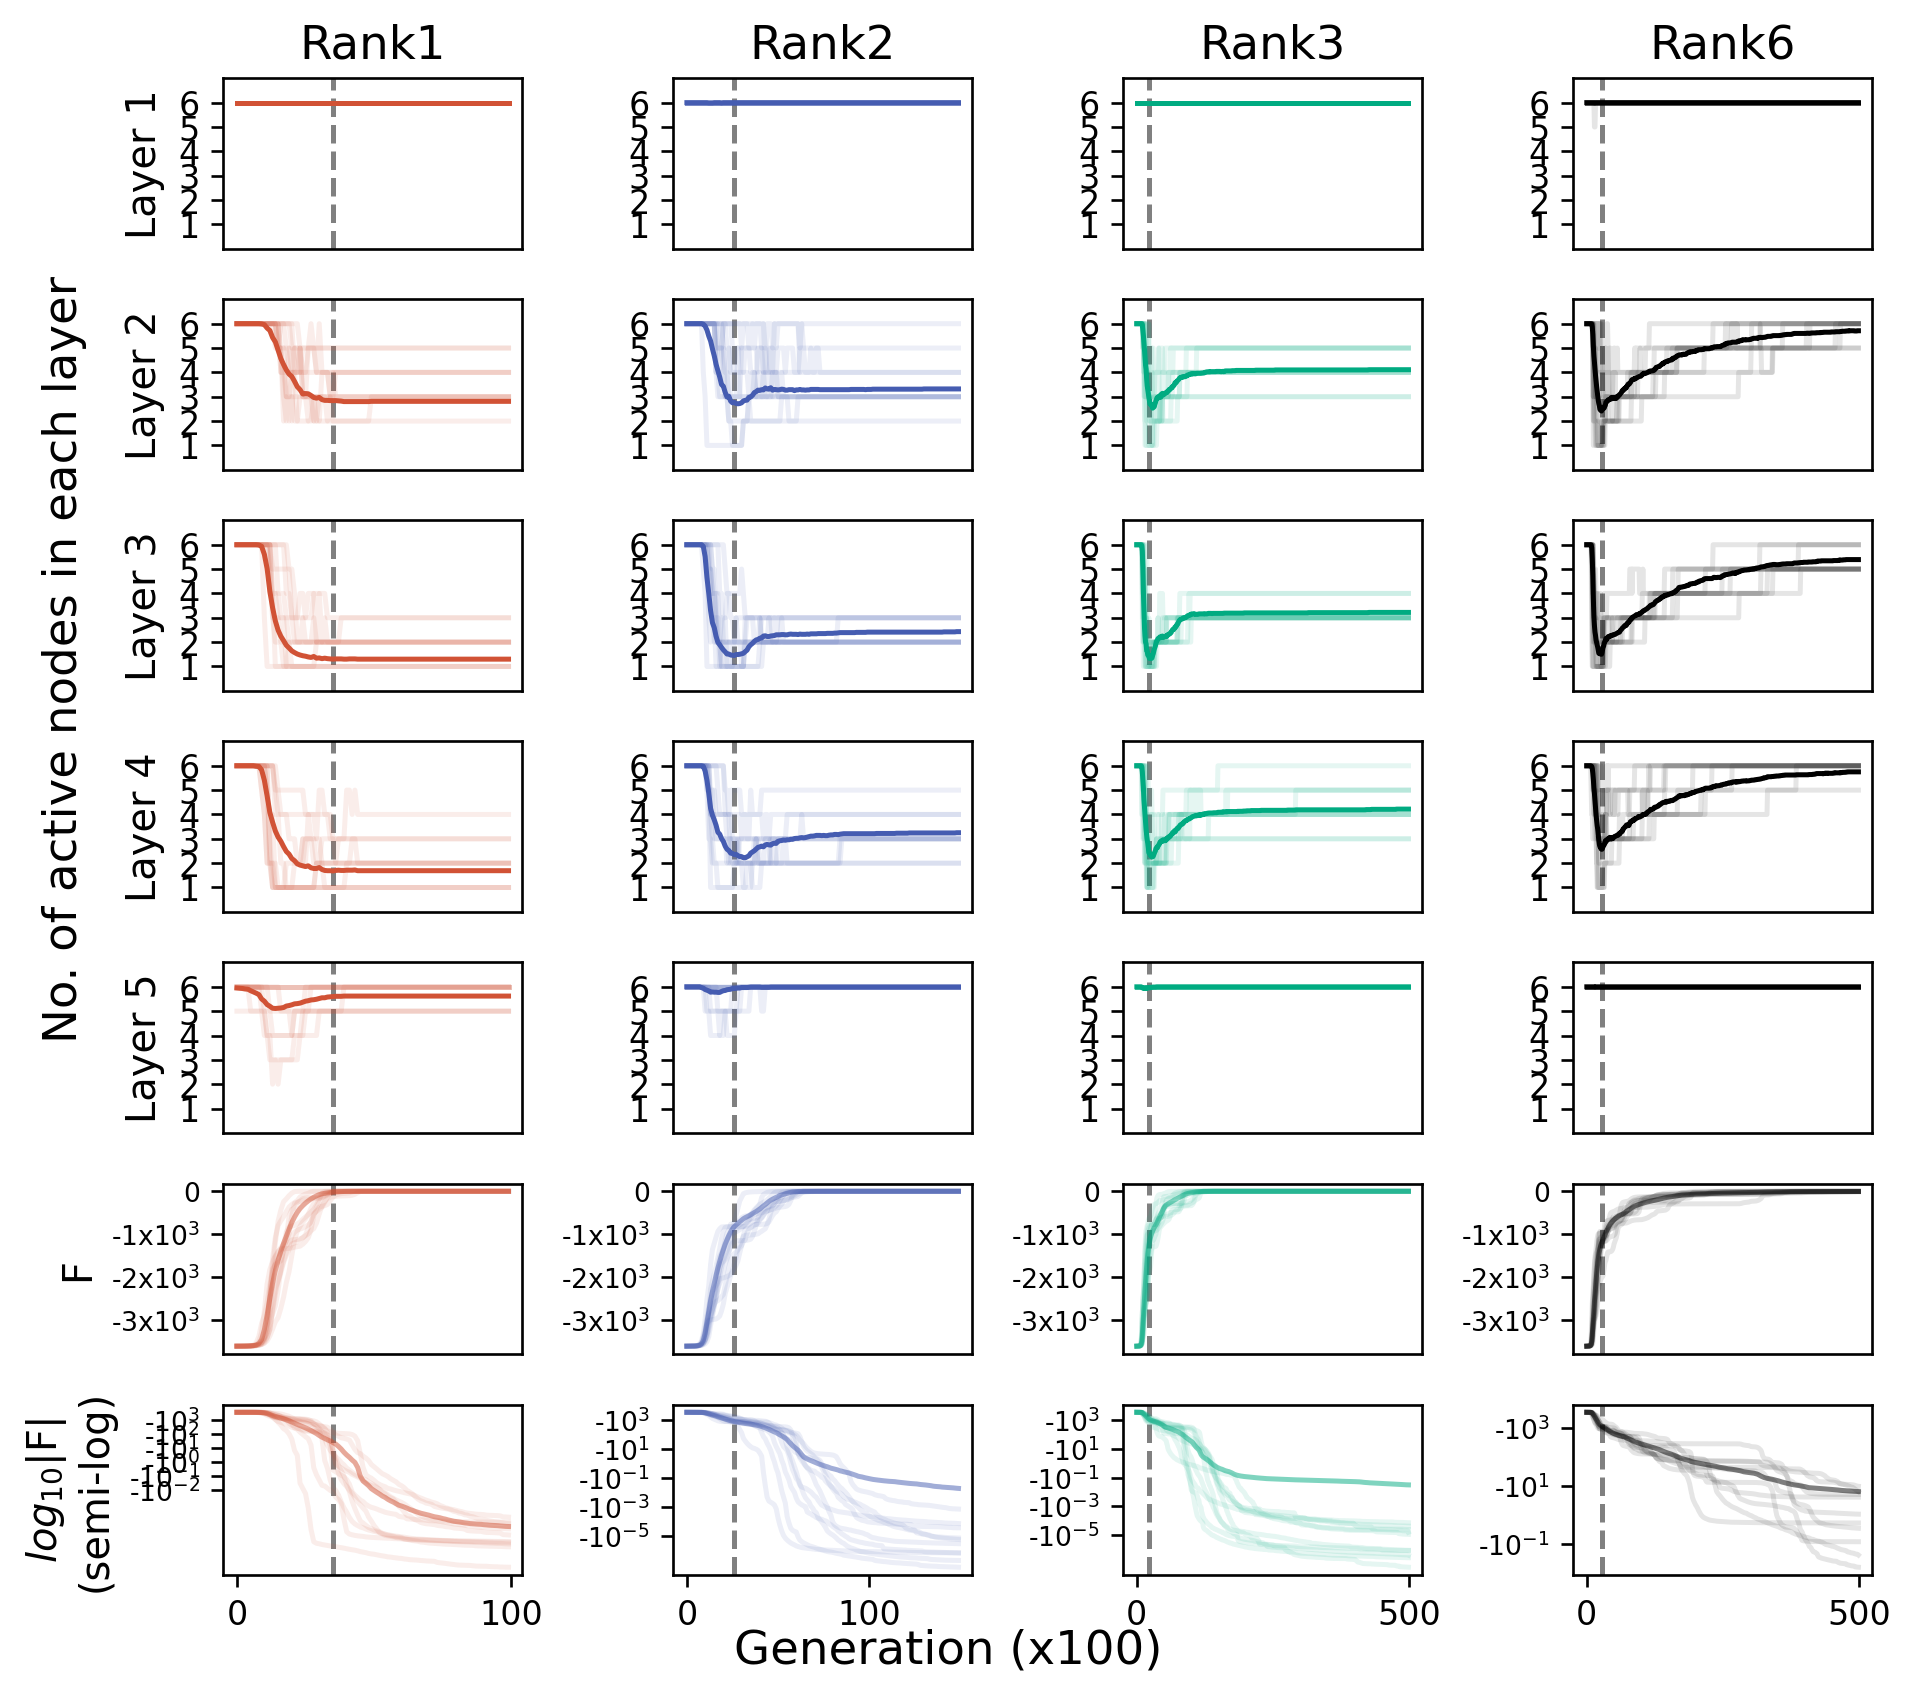

In [53]:
# Create fig.2c
print("===Explanation of data structure (Data contents: # of nodes in each layer)===\n")

print("Data structure: #replicate x evolution time (x10^2) x [#Layer(5) + Fitness(1)] ")
print("N001R1:Shape:{}\nA0:0.01,Rank:1,Replicate:100,Time:10000gen,Sampleduration:100,Length:100".format(N001R1.shape))
print("N001R2:Shape:{}\nA0:0.01,Rank:2,Replicate:100,Time:15000gen,Sampleduration:100,Length:150".format(N001R2.shape))
print("N001R3:Shape:{}\nA0:0.01,Rank:3,Replicate:100,Time:80000gen,Sampleduration:100,Length:800".format(N001R3.shape))
print("N001R6:Shape:{}\nA0:0.01,Rank:6,Replicate:100,Time:150000gen,Sampledurati:100,Length:1500".format(N001R6.shape))


N001_data = [N001R1, N001R2, N001R3, N001R6]
N40_data = [N40R1, N40R2, N40R3, N40R6]


#Calculate mean among 100 replicates for each rank
N001_mean = [np.mean(N001_data[j], axis=0) for j in range(4)]
N40_mean = [np.mean(N40_data[j], axis=0) for j in range(4)]
print("\n\n# of nodes in each layer, Mean among replicates\nData structure: evolution time (x10^2) x [#Layer(5) + Fitness(1)] ")
print("N001R1 mean, Shape:{}".format(N001_mean[0].shape))
print("N001R2 mean, Shape:{}".format(N001_mean[1].shape))
print("N001R3 mean, Shape:{}".format(N001_mean[2].shape))
print("N001R6 mean, Shape:{}".format(N001_mean[3].shape))

#Minimal time 
minindex = [np.argmin(N001_mean[i][:,2]) for i in range(4)]
satuindex = [np.argmax(N001_mean[i][:,5] >= -0.1) for i in range(4)]


#Properteis used in the figure design.
N001_colors = ["#D15235", "#455CB1", "#00AB81",  "#000000"]
N40_colors = ["#FF8B89", "#ABD0E4", "#8DBA99", "grey"]
Ranks = ["Rank1","Rank2", "Rank3", "Rank6"]
layer = 0

#Define character arrays for readability
Layers = ["Layer 1","Layer 2", "Layer 3", "Layer 4", "Layer 5","F", "$log_{10}$|F|\n(semi-log)"]

ax = list(range(28))
fig = plt.figure(figsize=(8, 7),facecolor="white", dpi=240)

end = 500
indn = 10
for i in range(28):
    
    ax[i] = fig.add_subplot(7, 4, i+1)
    ax[i].axvline(x=minindex[i%4],color='grey', linestyle='--')
    #ax[i].axvline(x=satuindex[i%4],color='black', linestyle='--')
    if layer <= 4:
        ax[i].set_ylim(0,7)
        ax[i].set_yticks([1, 2, 3, 4, 5, 6])
        ax[i].set_xticks([])
        alpha_ = 1
        #Mean plot
        ax[i].plot(N001_mean[i%4][:,layer][0:end], alpha=alpha_, color=N001_colors[i%4], label="$A_0$:0.01")
        #ax[i].plot(N40_mean[i%4][:,layer][0:end], alpha=alpha_, color=N40_colors[i%4],label="$A_0$:40",
        #       linestyle="dotted", dashes=[4,0.8])
        #Individual
        for j in range(indn):
            ax[i].plot(N001_data[i%4][j][:,layer][0:end], alpha=0.1, color=N001_colors[i%4], label="$A_0$:0.01")
            #ax[i].plot(N40_data[i%4][j][:,layer][0:end], alpha=0.1, color=N40_colors[i%4],label="$A_0$:40",
            #        linestyle="dotted", dashes=[4,0.8])  
    
    elif layer == 5:
        ax[i].set_yticks([0,-1000, -2000,-3000])
        ax[i].set_yticklabels(["0","-1x$10^{3}$", "-2x$10^{3}$", "-3x$10^{3}$"])
        ax[i].tick_params(axis='y', which='both', labelsize=8)
        ax[i].set_xticks([])
        alpha_ = 0.5
        #Mean plot
        ax[i].plot(N001_mean[i%4][:,5][0:end], alpha=alpha_, color=N001_colors[i%4], label="$A_0$:0.01")
        #ax[i].plot(N40_mean[i%4][:,5][0:end], alpha=alpha_, color=N40_colors[i%4],label="$A_0$:40",
        #       linestyle="dotted", dashes=[4,0.8])
        #Individual plot
        for j in range(indn):
            ax[i].plot(N001_data[i%4][j][:,5][0:end], alpha=0.1, color=N001_colors[i%4], label="$A_0$:0.01")
            #ax[i].plot(np.log(abs(N40_data[i%4][j][:,5][0:end])), alpha=0.1, color=N40_colors[i%4],label="$A_0$:40",
            #        linestyle="dotted", dashes=[4,0.8]) 

        
    elif layer == 6:
        if i%4 == 0:
            ax[i].set_yticks([np.log10(1000), np.log10(100), np.log10(10), np.log10(1), np.log10(0.1), np.log10(0.01)])
            ax[i].set_yticklabels(["-$10^{3}$", "-$10^{2}$", "-$10^{1}$","-$10^{0}$","-$10^{-1}$", "-$10^{-2}$"  ])
        else:
            ax[i].set_yticks([np.log10(1000), np.log10(10),  np.log10(0.1), np.log10(0.001), np.log10(0.00001)])
            ax[i].set_yticklabels(["-$10^{3}$",  "-$10^{1}$","-$10^{-1}$", "-$10^{-3}$", "-$10^{-5}$"])
        
        alpha_ = 0.5
        ax[i].plot(np.log10(abs(N001_mean[i%4][:,5][0:end])), alpha=alpha_, color=N001_colors[i%4], label="$A_0$:0.01")
        for j in range(indn):
            ax[i].plot(np.log10(abs(N001_data[i%4][j][:,5][0:end])), alpha=0.1, color=N001_colors[i%4], label="$A_0$:0.01")        
        ax[i].tick_params(axis='y', which='both', labelsize=8)
            
        

    if Layers[layer] == "Layer 1":
        #ax[i].legend(labels = ["$A_0$:0.01", "$A_0$:40"])
        ax[i].set_title(Ranks[i],size=14)

    if i%4 == 0:
        ax[i].set_ylabel(Layers[layer],size=12)
            
        
    if i%4 == 3:
        layer+=1
        
matplotlib.rcParams['pdf.fonttype'] = 42
fig.text(0.04, 0.60, 'No. of active nodes in each layer', ha='center', va='center', rotation='vertical', size=14)
fig.text(0.5, 0.01, 'Generation (x100)', ha='center', va='center', size=14)
plt.tight_layout()
fig.savefig("Figures/SFig3.tif")


## Alternative definition of activ node

### 最急降下法

In [1]:
import numpy as np
RD1 = np.loadtxt("Data/RankDepend_GD_Ini001_R1_6N5L_eta0005.txt")
print(RD1)

[[6. 2. 3. 4. 6.]
 [6. 3. 3. 6. 6.]
 [6. 4. 2. 2. 6.]
 [6. 4. 1. 5. 5.]
 [6. 2. 4. 3. 6.]
 [6. 2. 2. 4. 5.]
 [6. 4. 2. 2. 6.]
 [6. 3. 3. 3. 5.]
 [6. 4. 2. 3. 6.]
 [6. 6. 1. 3. 6.]
 [6. 4. 5. 2. 6.]
 [6. 3. 2. 3. 6.]
 [6. 4. 2. 5. 5.]
 [6. 4. 3. 4. 6.]
 [6. 3. 1. 4. 5.]
 [6. 3. 4. 2. 6.]
 [6. 6. 1. 3. 6.]
 [6. 3. 4. 2. 5.]
 [6. 4. 4. 2. 6.]
 [6. 4. 4. 3. 6.]
 [6. 1. 4. 3. 6.]
 [6. 6. 3. 2. 6.]
 [6. 6. 4. 1. 6.]
 [6. 6. 2. 3. 6.]
 [6. 6. 2. 2. 6.]
 [6. 6. 4. 2. 5.]
 [6. 5. 2. 2. 6.]
 [6. 3. 2. 4. 6.]
 [6. 2. 4. 4. 6.]
 [6. 4. 2. 4. 6.]
 [6. 4. 2. 4. 5.]
 [6. 5. 3. 2. 6.]
 [6. 1. 3. 4. 6.]
 [6. 5. 4. 3. 6.]
 [6. 5. 2. 3. 5.]
 [6. 4. 3. 2. 6.]
 [6. 5. 3. 3. 5.]
 [6. 5. 2. 2. 6.]
 [6. 3. 6. 1. 5.]
 [6. 5. 4. 1. 6.]
 [6. 4. 3. 4. 6.]
 [6. 3. 3. 5. 5.]
 [6. 3. 2. 5. 6.]
 [6. 3. 4. 5. 6.]
 [6. 6. 4. 2. 4.]
 [6. 3. 5. 3. 6.]
 [6. 2. 4. 3. 6.]
 [6. 1. 4. 5. 6.]
 [6. 1. 4. 5. 5.]
 [6. 2. 4. 4. 6.]
 [6. 3. 2. 5. 6.]
 [6. 3. 4. 3. 6.]
 [6. 3. 3. 4. 6.]
 [6. 4. 2. 4. 6.]
 [6. 5. 3. 3. 6.]
 [6. 6. 1.

[100, 100, 99, 5]


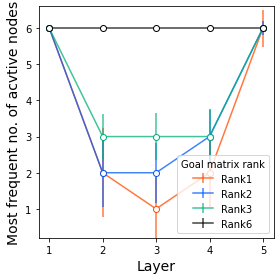

In [24]:
# from matplotlib.backends.backend_pdf import PdfPages
#Rank dependency of gradient discend
TITLE = "S6FigA"
dir_ = "GradDescend/"
#RD1 = np.loadtxt("Data/RankDepend_GD_Ini001_R1_6N5L_eta0005.txt")
#RD2 = np.loadtxt("Data/RankDepend_GD_Ini001_R2_6N5L_eta0005.txt")
#RD3 = np.loadtxt("Data/RankDepend_GD_Ini001_R3_6N5L_eta0005.txt")
#RD6 = np.loadtxt("Data/RankDepend_GD_Ini001_R6_6N5L_eta0005.txt")

RD1 = np.loadtxt(f"{dir_}RankDepend_RungeKutta_Ini0,001_R1_6N5L_eta0001.txt")
RD2 = np.loadtxt(f"{dir_}RankDepend_RungeKutta_Ini0,001_R2_6N5L_eta0001.txt")
RD3 = np.loadtxt(f"{dir_}RankDepend_RungeKutta_Ini0,001_R3_6N5L_eta0001.txt")
RD6 = np.loadtxt(f"{dir_}RankDepend_RungeKutta_Ini0,001_R6_6N5L_eta0001.txt")
RD_data = [RD1, RD2, RD3, RD6]
print([len(RD) for RD in RD_data])
RDs_ave = [[statistics_mode(RD_data[j][:,i]) for i in range(5)] for j in range(len(RD_data))]
RDs_std = [np.std(RD_data[j], axis=0) for j in range(len(RD_data))]
colors = ["#ff4b00", "#005aff","#03af7a", "#000000"]

labels = ["Rank1","Rank2", "Rank3", "Rank6"]
X = [1,2,3,4,5]

plt.figure(figsize=(4,4), facecolor="white")
plt.xlabel('Layer', size=14)  # x軸ラベル
plt.ylabel('Most frequent no. of acvtive nodes',size=14)  # y軸ラベル
plt.ylim(0.2,6.6)
for i in range(4):
    plt.errorbar(X, RDs_ave[i],yerr=RDs_std[i], color=colors[i], label=labels[i], alpha=0.75, zorder=1)
    plt.scatter(X, RDs_ave[i], alpha=1.0, facecolor='white', edgecolors=colors[i], zorder=2)

plt.legend(loc=4, title="Goal matrix rank")    
plt.xticks([1, 2, 3, 4, 5])
plt.yticks([1, 2, 3, 4, 5, 6])
plt.tight_layout()  # レイアウトの設定
plt.savefig("/Users/itoutouma/Dropbox/2023ItohBowTiePaper/Revision1/ReviseFigures2/S6FigSet/{}.pdf".format(TITLE))

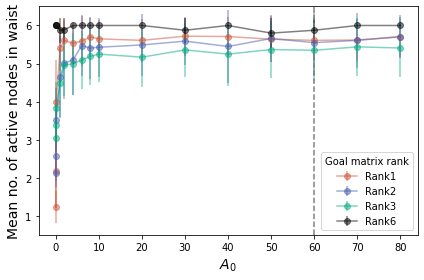

In [67]:
dir_ = "GradDescend/"
X = [0.001, 0.01,0.1,1.0,2.0,4.0,6.0,8.0,10,20,30,40,50,60,70,80]
GPR1 = pd.read_csv(f"{dir_}InitDepend_RungeKutta_R1_6N5L_eta0001.csv")
GPR2 = pd.read_csv(f"{dir_}InitDepend_RungeKutta_R2_6N5L_eta0001.csv")
GPR3 = pd.read_csv(f"{dir_}InitDepend_RungeKutta_R3_6N5L_eta0001.csv")
GPR6 = pd.read_csv(f"{dir_}InitDepend_RungeKutta_R6_6N5L_eta0001.csv")
waist_size_data = [GPR1, GPR2, GPR3 ,GPR6]
InitDependency(waist_size_data, "S6FigB.pdf", X, inset = False, figsize=[6,4])

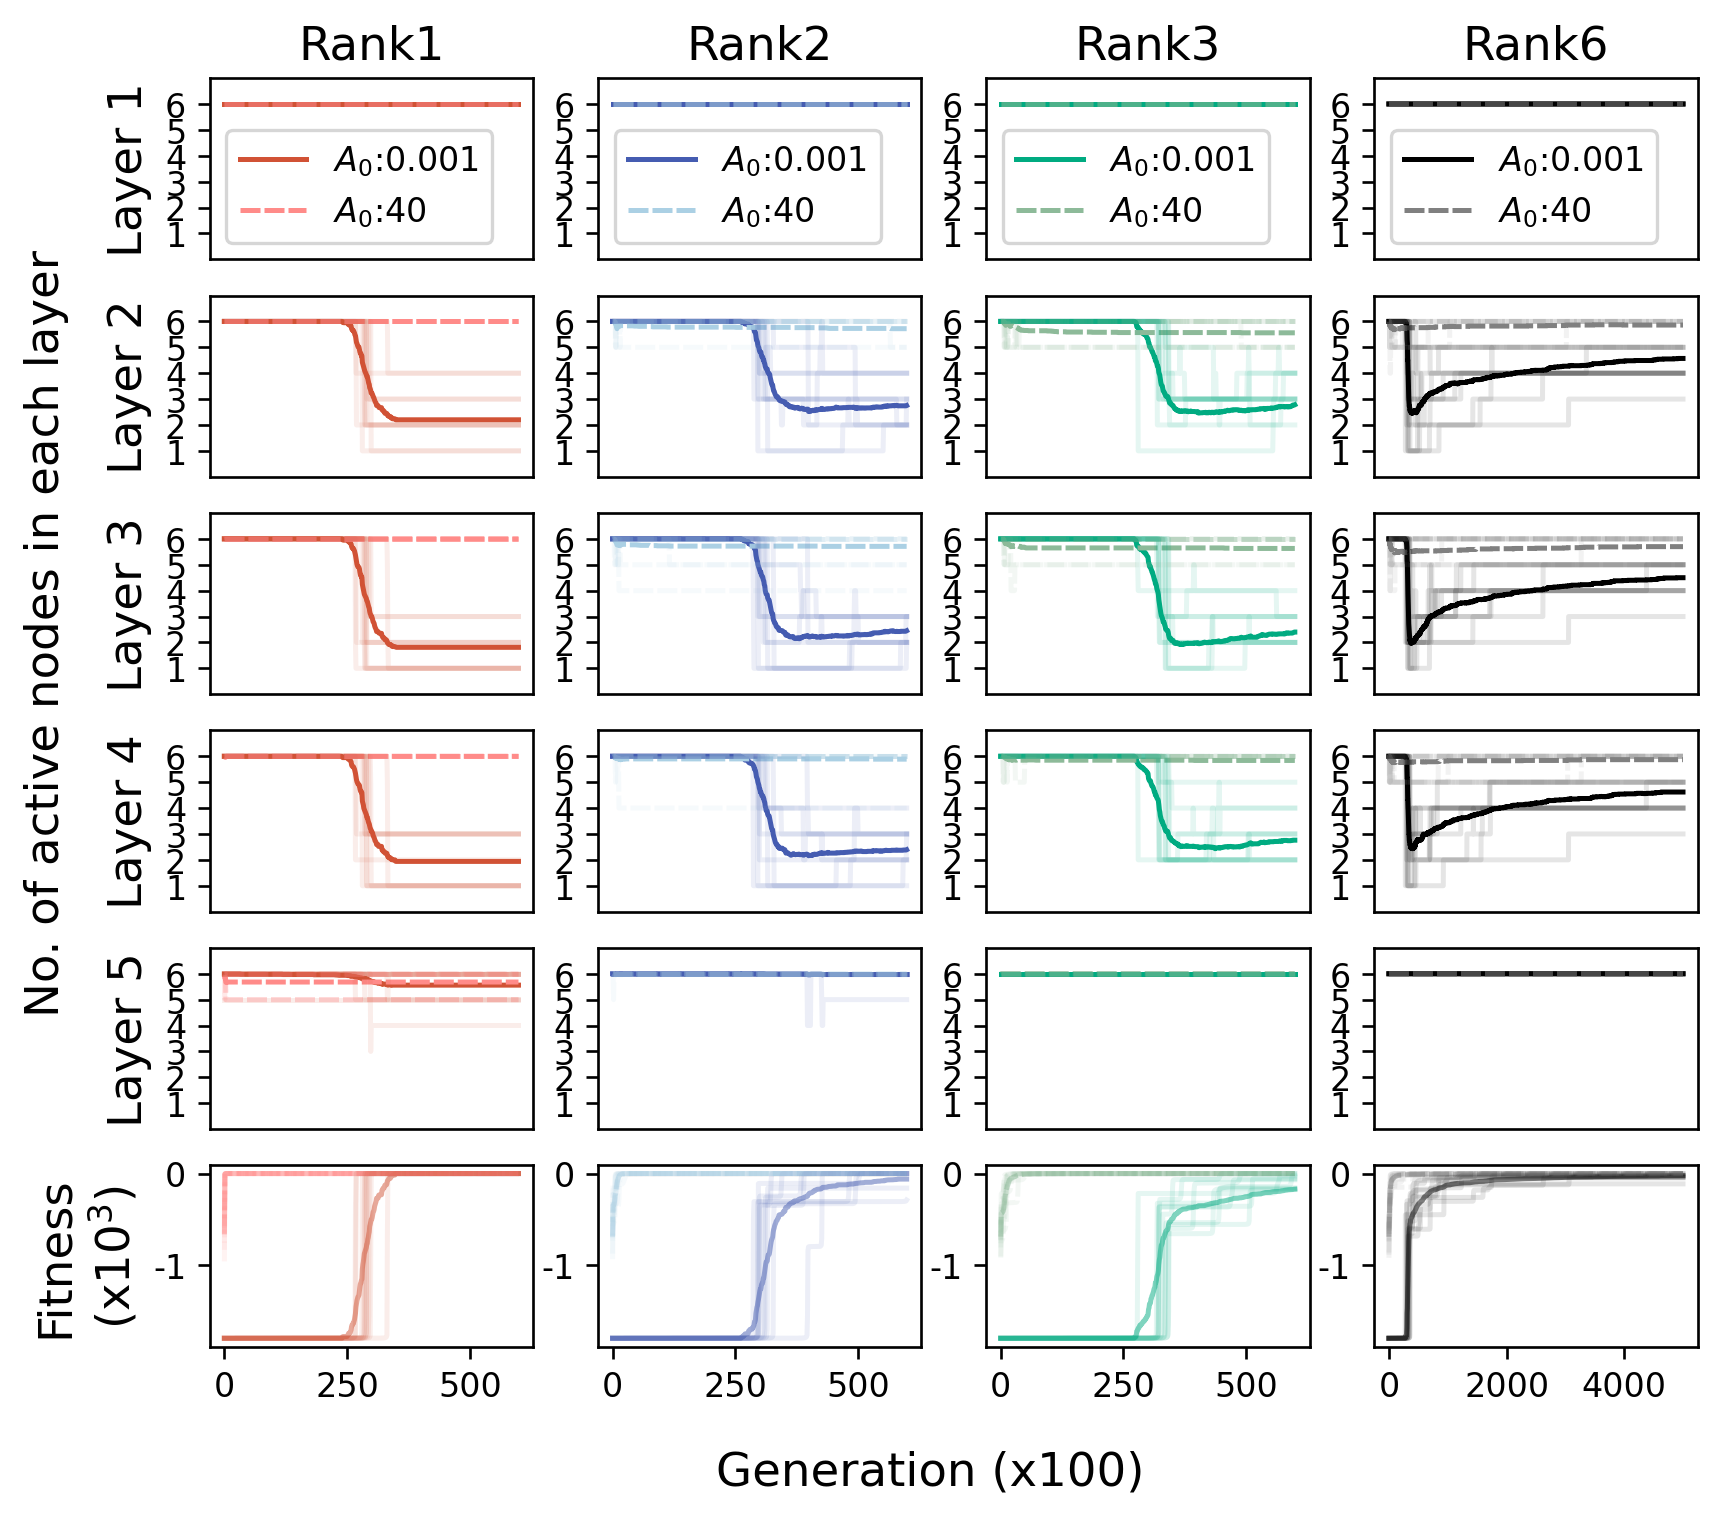

In [9]:
dir_ = "GradDescend/"
N0001R1 = np.load(f"{dir_}N6L5_nNodeAlongTime_N0,001_R1_RungeKutta_eta0001.npy",allow_pickle=True)
N0001R2 = np.load(f"{dir_}N6L5_nNodeAlongTime_N0,001_R2_RungeKutta_eta0001.npy",allow_pickle=True)
N0001R3 = np.load(f"{dir_}N6L5_nNodeAlongTime_N0,001_R3_RungeKutta_eta0001.npy",allow_pickle=True)
N0001R6 = np.load(f"{dir_}N6L5_nNodeAlongTime_N0,001_R6_RungeKutta_eta0001.npy",allow_pickle=True)

N40R1 = np.load(f"{dir_}N6L5_nNodeAlongTime_N40_R1_RungeKutta_eta0001.npy",allow_pickle=True)
N40R2 = np.load(f"{dir_}N6L5_nNodeAlongTime_N40_R2_RungeKutta_eta0001.npy",allow_pickle=True)
N40R3 = np.load(f"{dir_}N6L5_nNodeAlongTime_N40_R3_RungeKutta_eta0001.npy",allow_pickle=True)
N40R6 = np.load(f"{dir_}N6L5_nNodeAlongTime_N40_R6_RungeKutta_eta0001.npy",allow_pickle=True)

for i in range(len(N001R1)):
    N0001R1[i][:,5] = -1*N0001R1[i][:,5]
    N0001R2[i][:,5] = -1*N0001R2[i][:,5]
    N0001R3[i][:,5] = -1*N0001R3[i][:,5]
    N0001R6[i][:,5] = -1*N0001R6[i][:,5]
    N40R1[i][:,5] = -1*N40R1[i][:,5]
    N40R2[i][:,5] = -1*N40R2[i][:,5]
    N40R3[i][:,5] = -1*N40R3[i][:,5]
    N40R6[i][:,5] = -1*N40R6[i][:,5]
    
N0001_data = [N0001R1, N0001R2, N0001R3, N0001R6]
N40_data = [N40R1, N40R2, N40R3, N40R6]


N0001_data = [ np.array([N0001_data[R_index][i] for i in range(N0001_data[R_index].shape[0]) if  N0001_data[R_index][i] is not None])
             for R_index in range(4)]

N40_data = [ np.array([N40_data[R_index][i] for i in range(N40_data[R_index].shape[0]) if N40_data[R_index][i] is not None]) 
            for R_index in range(4)]

TimeCourseOfActiveNode(N0001_data, N40_data, 6, "S6FigC.pdf",end=5000, small_value = 0.001, large_value=40)

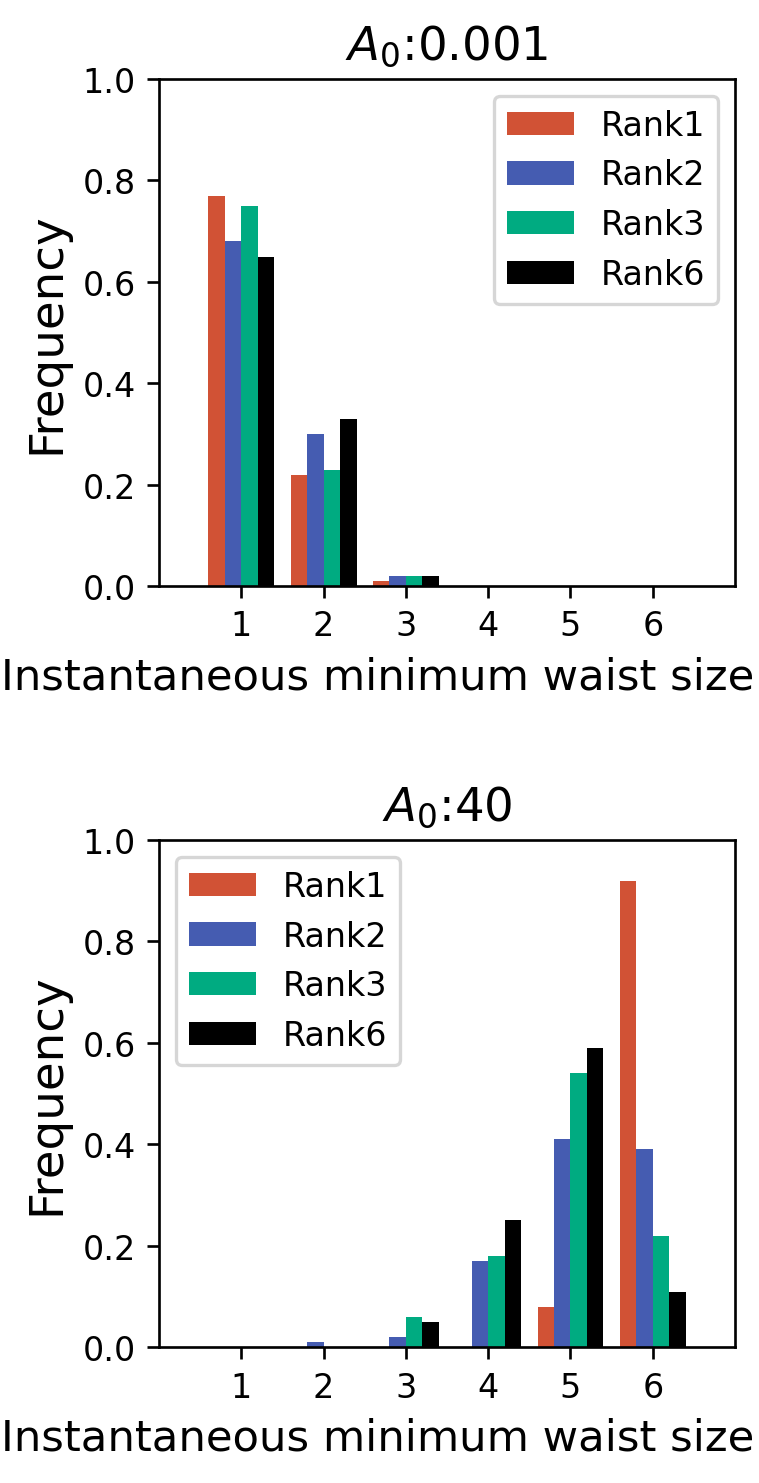

In [11]:
HistogramOfMinimalWaist(N0001_data, N40_data, "S6FigD.pdf", small_value = 0.001, large_value=40)

In [39]:
N001R1[0][:,5] = -1*N001R1[0][:,5]

array([1799.9463818279842, 1799.946132160965, 1799.9458804203507,
       1799.945626581197, 1799.9453706181648, 1799.945112505513,
       1799.9448522170899, 1799.9445897263272, 1799.944325006229,
       1799.9440580293647, 1799.943788767861, 1799.9435171933915,
       1799.9432432771687, 1799.942966989933, 1799.9426883019457,
       1799.942407182978, 1799.9421236022986, 1799.9418375286687,
       1799.941548930326, 1799.9412577749767, 1799.9409640297856,
       1799.9406676613612, 1799.9403686357464, 1799.9400669184076,
       1799.9397624742198, 1799.9394552674555, 1799.939145261772,
       1799.9388324201984, 1799.938516705121, 1799.93819807827,
       1799.9378765007064, 1799.9375519328048, 1799.9372243342418,
       1799.9368936639776, 1799.9365598802422, 1799.9362229405183,
       1799.9358828015245, 1799.9355394191998, 1799.9351927486844,
       1799.9348427443017, 1799.9344893595417, 1799.93413254704,
       1799.9337722585592, 1799.9334084449695, 1799.933041056226,
       179

## Create fig3a
TITLE = "S6FigB"
#GPR1 = pd.read_csv("Data/InitDepend_GD_R1_6N5L_eta0005.csv")
#GPR2 = pd.read_csv("Data/InitDepend_GD_R2_6N5L_eta0005.csv")
#GPR3 = pd.read_csv("Data/InitDepend_GD_R3_6N5L_eta0005.csv")
#GPR6 = pd.read_csv("Data/InitDepend_GD_R6_6N5L_eta0005.csv")

GPR1 = pd.read_csv(f"{dir_}InitDepend_RungeKutta_R1_6N5L_eta0001.csv")
GPR2 = pd.read_csv(f"{dir_}InitDepend_RungeKutta_R2_6N5L_eta0001.csv")
GPR3 = pd.read_csv(f"{dir_}InitDepend_RungeKutta_R3_6N5L_eta0001.csv")
GPR6 = pd.read_csv(f"{dir_}InitDepend_RungeKutta_R6_6N5L_eta0001.csv")
print(GPR2)
GPR_data = [GPR1, GPR2, GPR3, GPR6]

GoalMatirxSize = 60
X = [0.001, 0.01,0.1,1.0,2.0,4.0,6.0,8.0,10,20,30,40,50,60,70,80]
#colors = ["#ff4b00", "#005aff","#03af7a", "#000000"]      # 各プロットの色
labels = ["Rank1","Rank2", "Rank3", "Rank6"]   # 各ラベル
#plt.grid(alpha=0.2)            # 罫線

plt.figure(figsize=(6,4), facecolor="white")
for i in range(4):
    GPR = GPR_data[i]
    plt.vlines(GoalMatirxSize, 0.5, 6.5, "grey", linestyles='dashed')     # hlines
    plt.errorbar(X, GPR.loc[:, "waist_mean"], yerr=GPR.loc[:, "waist_std"], color=colors[i], label=labels[i], alpha=0.5)
    plt.scatter(X, GPR.loc[:, "waist_mean"], color=colors[i], alpha=0.5)

plt.xlabel('$A_{0}$',size=14)  # x軸ラベル
plt.ylabel('Mean no. of active nodes in waist',size=14)  # y軸ラベル
plt.ylim(0.5,6.5)
plt.legend(loc=4, title="Goal matrix rank")    # 凡例
plt.tight_layout()  # レイアウトの設定
plt.savefig("/Users/itoutouma/Dropbox/2023ItohBowTiePaper/Revision1/ReviseFigures2/S6FigSet/{}.pdf".format(TITLE))
#plt.savefig("/Users/itoutouma/Desktop/BowTiePaper/Figures0319/setFigS2/{}.pdf".format(TITLE))

In [60]:
N001R1 = np.load(f"{dir_}N6L5_nNodeAlongTime_N0,001_R1_RungeKutta_eta0001.npy",allow_pickle=True)
N001R2 = np.load(f"{dir_}N6L5_nNodeAlongTime_N0,001_R2_RungeKutta_eta0001.npy",allow_pickle=True)
N001R3 = np.load(f"{dir_}N6L5_nNodeAlongTime_N0,001_R3_RungeKutta_eta0001.npy",allow_pickle=True)
N001R6 = np.load(f"{dir_}N6L5_nNodeAlongTime_N0,001_R6_RungeKutta_eta0001.npy",allow_pickle=True)

N40R1 = np.load(f"{dir_}N6L5_nNodeAlongTime_N40_R1_RungeKutta_eta0001.npy",allow_pickle=True)
N40R2 = np.load(f"{dir_}N6L5_nNodeAlongTime_N40_R2_RungeKutta_eta0001.npy",allow_pickle=True)
N40R3 = np.load(f"{dir_}N6L5_nNodeAlongTime_N40_R3_RungeKutta_eta0001.npy",allow_pickle=True)
N40R6 = np.load(f"{dir_}N6L5_nNodeAlongTime_N40_R6_RungeKutta_eta0001.npy",allow_pickle=True)

for i in range(len(N001R1)):
    N001R1[i][:,5] = -1*N001R1[i][:,5]
    N001R2[i][:,5] = -1*N001R2[i][:,5]
    N001R3[i][:,5] = -1*N001R3[i][:,5]
    N001R6[i][:,5] = -1*N001R6[i][:,5]
    N40R1[i][:,5] = -1*N40R1[i][:,5]
    N40R2[i][:,5] = -1*N40R2[i][:,5]
    N40R3[i][:,5] = -1*N40R3[i][:,5]
    N40R6[i][:,5] = -1*N40R6[i][:,5]

[[[6.0 6.0 6.0 6.0 6.0 1799.9463818279842]
  [6.0 6.0 6.0 6.0 6.0 1799.946132160965]
  [6.0 6.0 6.0 6.0 6.0 1799.9458804203507]
  ...
  [6.0 2.0 2.0 3.0 6.0 2.3495859450289838e-05]
  [6.0 2.0 2.0 3.0 6.0 2.3494960524793616e-05]
  [6.0 2.0 2.0 3.0 6.0 2.3494061654858704e-05]]

 [[6.0 6.0 6.0 6.0 6.0 1799.9485479326609]
  [6.0 6.0 6.0 6.0 6.0 1799.9483232037774]
  [6.0 6.0 6.0 6.0 6.0 1799.9480967328186]
  ...
  [6.0 3.0 3.0 3.0 6.0 0.0005022982961008259]
  [6.0 3.0 3.0 3.0 6.0 0.0005021144140446788]
  [6.0 3.0 3.0 3.0 6.0 0.0005019306526058637]]

 [[6.0 6.0 6.0 6.0 5.0 1799.9481053305362]
  [6.0 6.0 6.0 6.0 5.0 1799.947874516899]
  [6.0 6.0 6.0 6.0 5.0 1799.9476418931376]
  ...
  [6.0 3.0 2.0 1.0 5.0 0.00033857828339149335]
  [6.0 3.0 2.0 1.0 5.0 0.00033607598108198114]
  [6.0 3.0 2.0 1.0 5.0 0.00033360024655062744]]

 ...

 [[6.0 6.0 6.0 6.0 6.0 1799.944189939184]
  [6.0 6.0 6.0 6.0 6.0 1799.9439296919077]
  [6.0 6.0 6.0 6.0 6.0 1799.9436672995166]
  ...
  [6.0 5.0 3.0 2.0 6.0 1.093177

Text(0.04, 0.5, 'No. of active nodes in each layer')

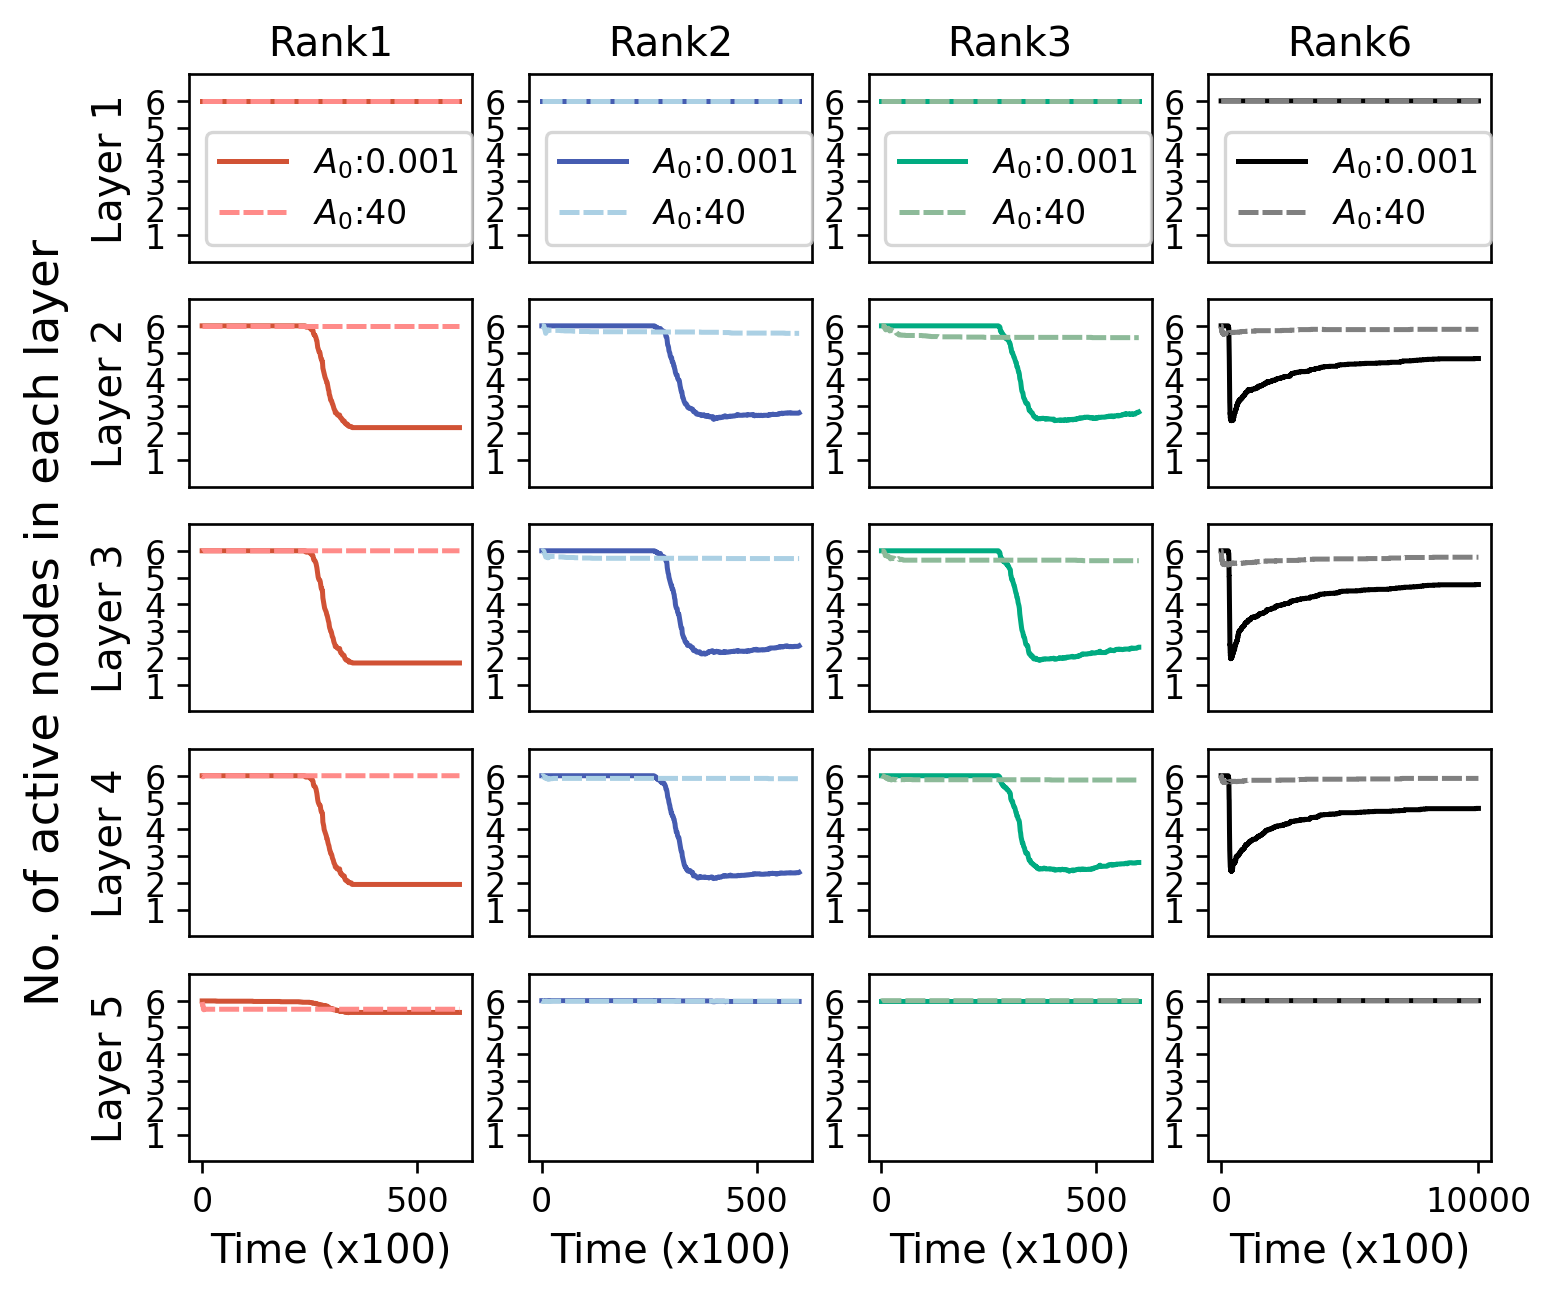

In [26]:
TITLE = "FigS2c"

N001R1 = np.load(f"{dir_}N6L5_nNodeAlongTime_N0,001_R1_RungeKutta_eta0001.npy",allow_pickle=True)
N001R2 = np.load(f"{dir_}N6L5_nNodeAlongTime_N0,001_R2_RungeKutta_eta0001.npy",allow_pickle=True)
N001R3 = np.load(f"{dir_}N6L5_nNodeAlongTime_N0,001_R3_RungeKutta_eta0001.npy",allow_pickle=True)
N001R6 = np.load(f"{dir_}N6L5_nNodeAlongTime_N0,001_R6_RungeKutta_eta0001.npy",allow_pickle=True)

N40R1 = np.load(f"{dir_}N6L5_nNodeAlongTime_N40_R1_RungeKutta_eta0001.npy",allow_pickle=True)
N40R2 = np.load(f"{dir_}N6L5_nNodeAlongTime_N40_R2_RungeKutta_eta0001.npy",allow_pickle=True)
N40R3 = np.load(f"{dir_}N6L5_nNodeAlongTime_N40_R3_RungeKutta_eta0001.npy",allow_pickle=True)
N40R6 = np.load(f"{dir_}N6L5_nNodeAlongTime_N40_R6_RungeKutta_eta0001.npy",allow_pickle=True)

print(N001R1)
N001_data = [N001R1, N001R2, N001R3, N001R6]
N001_data = [ np.array([N001_data[R_index][i] for i in range(N001_data[R_index].shape[0]) if  N001_data[R_index][i] is not None])
             for R_index in range(4)]

N40_data = [N40R1, N40R2, N40R3, N40R6]
N40_data = [ np.array([N40_data[R_index][i] for i in range(N40_data[R_index].shape[0]) if N40_data[R_index][i] is not None]) 
            for R_index in range(4)]

print("sample size")
print([len(N001) for N001 in N001_data])
print([len(N40) for N40 in N40_data])


N001_sample = np.min([N001_data[R_index].shape[0] for R_index in range(4)])
N40_sample = np.min([N40_data[R_index].shape[0] for R_index in range(4)])
sample = np.min([N001_sample, N40_sample])

N001_mean = [np.mean(N001_data[j][0:sample], axis=0) for j in range(4)]
N40_mean = [np.mean(N40_data[j][0:sample], axis=0) for j in range(4)]

N001_colors = ["#D15235", "#455CB1", "#00AB81",  "#000000"]
N40_colors = ["#FF8B89", "#ABD0E4", "#8DBA99", "grey"]

Ranks = ["Rank1","Rank2", "Rank3", "Rank6"]
ax = list(range(20))
layer = 0
fig = plt.figure(figsize=(7, 6),facecolor="white", dpi=240)
for i in range(20):
    ax[i] = fig.add_subplot(5, 4, i+1)
    ax[i].set_ylim(0,7)
    ax[i].set_yticks([1, 2, 3, 4, 5, 6])
    ax[i].plot(N001_mean[i%4][:,layer], alpha=1, color=N001_colors[i%4], label="$A_0$:0.001")
    ax[i].plot(N40_mean[i%4][:,layer], alpha=1, color=N40_colors[i%4],label="$A_0$:40",
               linestyle="dotted", dashes=[4,0.8])
    #ax[i].plot(N001R1[j][:,R1], alpha=0.8, color="#D15235", label="$A_0$:0.01")
    #ax[i].plot(N40R1[j][:,R1], alpha=0.8, color="#FF8B89",label="$A_0$:40",linestyle=ltype, dashes=das)
    
    if i%4 == 0:
        ax[i].set_ylabel("Layer {}".format(int(i/4 + 1)),size=12)
    if layer == 0:
        ax[i].legend(labels = ["$A_0$:0.001", "$A_0$:40"])
        ax[i].set_title(Ranks[i], fontsize=12)
    if layer != 4:
        ax[i].set_xticks([])
    else:
        ax[i].set_xlabel("Time (x100)", fontsize=12)
    if i%4 == 3:
        layer+=1
        
fig.text(0.04, 0.5, 'No. of active nodes in each layer', ha='center', va='center', rotation='vertical', size=14)
#plt.savefig("/Users/itoutouma/Desktop/BowTiePaper/Figures0319/setFigS2/{}.pdf".format(TITLE))

### 遺伝子重複

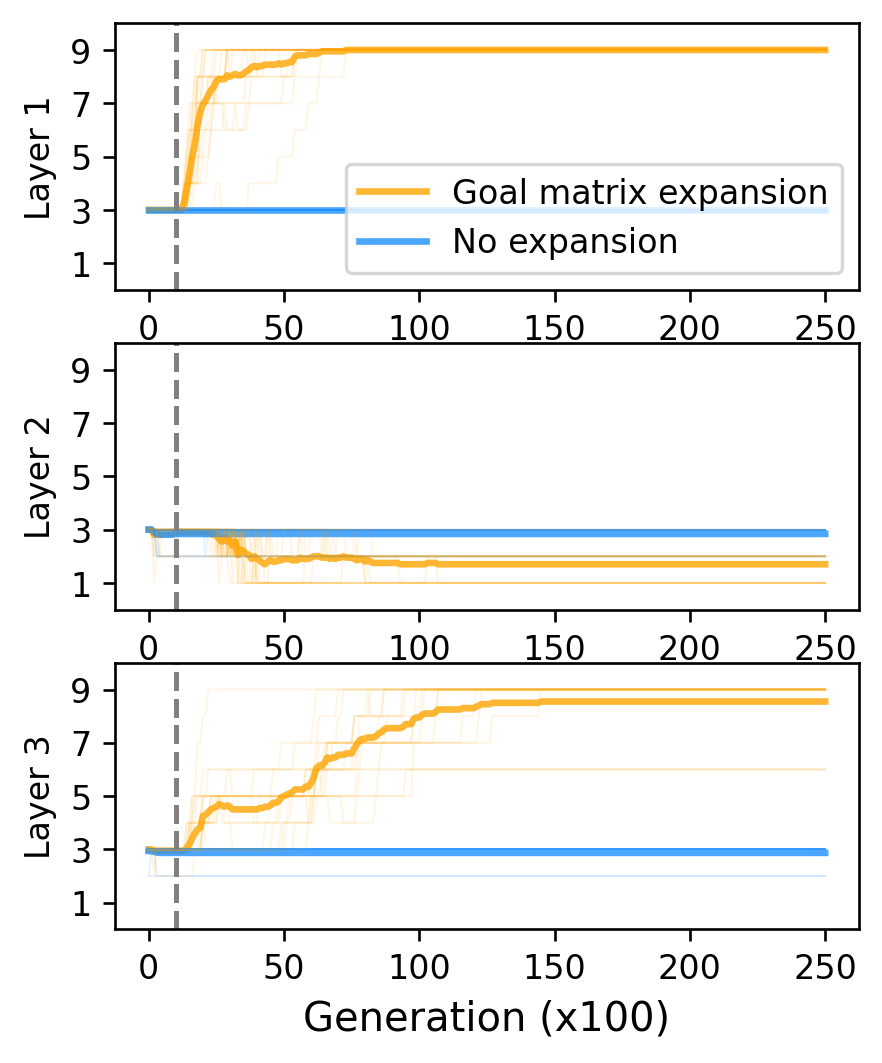

In [81]:
Dup = np.load('Data/R1Ini10_Gene_1000genDup.npy',allow_pickle=True)
NonDup = np.load('Data/R1Ini10_Gene_1000genNonDup.npy',allow_pickle=True)


Dup = [Dup[index] for index in range(20) if Dup[index] is not None]
Dup_mean = np.mean(Dup, axis=0)
NonDup_mean = np.mean(NonDup, axis=0)
nSample = len(Dup)
nLayer=3
fig = plt.figure(figsize=(4, 5),facecolor="white", dpi=240)
ax = [0,1,2,]
for i in range(0,nLayer):
    ax[i]=fig.add_subplot(3, 1, i+1)
    if i !=3:
        ax[i].set_ylabel("Layer {}".format(int(i+1)))
        col1 = "orange"
        col2 = "#1e90ff"
        ax[i].set_ylim(0,10)
        ax[i].set_yticks([1, 3, 5, 7, 9])
        maxv = 10
        minv= 0
        #ax[i].set_xticks([])
    else:
        col1 = "#db8449"
        col2 = "#00496D"
        maxv = np.max(Dup)
        minv = -30000#np.min(Dup)
        ax[i].set_ylim(-30000,1000)
        ax[i].set_yticks([0, -30000])
        ax[i].set_yticklabels([0, "-3"],rotation=90)
    #ax[i].grid(color='grey', linestyle='dotted', linewidth=1, axis='y')
    ax[i].plot(Dup_mean[:,i], alpha=0.8, linewidth=2, color=col1, label="Goal matrix enlargement")
    ax[i].plot(NonDup_mean[:,i], alpha=0.8, linewidth=2, color=col2)
    for index in range(nSample):
         ax[i].plot(Dup[index][:,i], alpha=0.1,linewidth=0.6, color=col1, label="Goal matrix enlargement")
         ax[i].plot(NonDup[index][:,i], alpha=0.1, linewidth=0.6,color=col2)
         ax[i].vlines(10, minv, maxv, "grey", linestyles='dashed',label="Non enlargement") 

ax[0].legend(labels = ["Goal matrix expansion", "No expansion"],loc="lower right")
#ax[2].legend(labels = ["Goal matrix expansion", "No expansion"],loc="lower right")
ax[2].set_xlabel("Generation (x100)", size=12)
#ax[nLayer-1].set_xticks([0,10,30,60,90,120,150, 180])
#ax[nLayer-1].set_xticklabels([0, 3000, 6000, 9000, 12000, 15000, 18000])
#fig.text(0.02, 0.5, 'No. of active nodes in each layer', ha='center', va='center', rotation='vertical', size=12)
#fig.text(0.02, 0.20, 'Fitness \n(x$10^4$)', ha='center', va='center', rotation='vertical', size=12)
TITLE = "Fig5c"
#fig.savefig("/Users/itoutouma/Desktop/BowTiePaper/Figures0319/Fig5set/{}.pdf".format(TITLE))
fig.savefig("/Users/itoutouma/Desktop/BowTiePaper/conference5.pdf".format(TITLE))


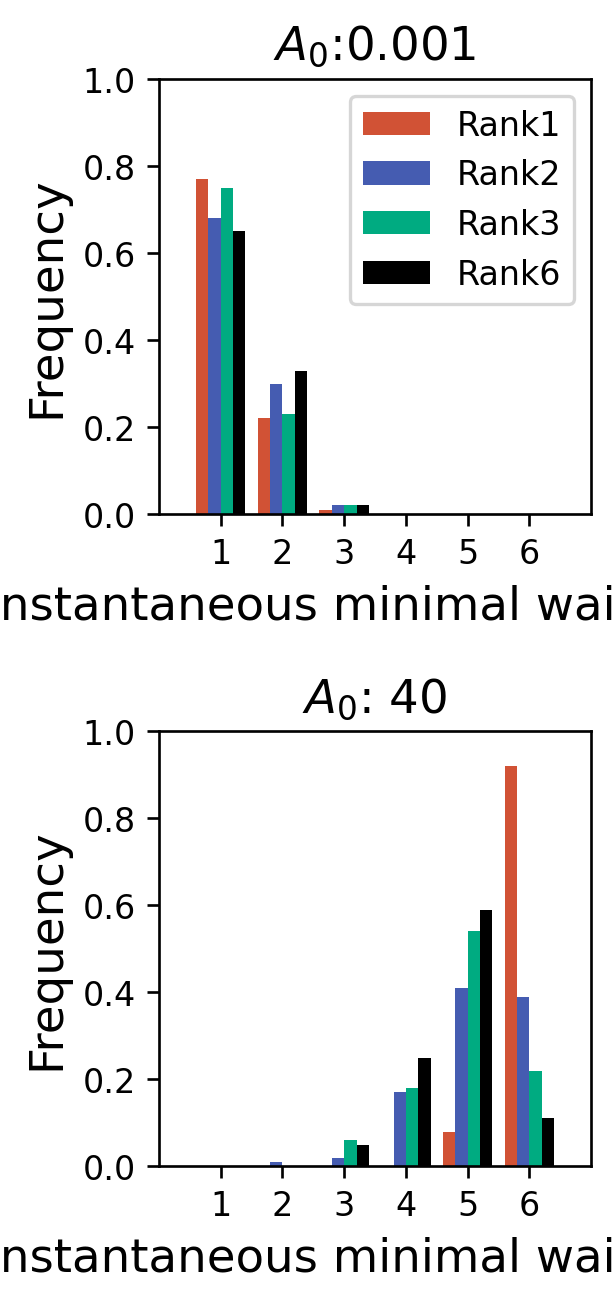

In [21]:
import collections
TITLE = "FigS4d"


freq_N001 = [[np.min(N001_data[R_index][j][:,1:4]) for j in range(sample)] for R_index in range(4)]
freq_N40 = [[np.min(N40_data[R_index][j][:,1:4]) for j in range(sample)] for R_index in range(4)]


bins_list = [0.5,1.5,2.5,3.5,4.5,5.5,6.5]
counts_N001_normed = [0]*4
counts_N001_R = [0]*4
counts_N40_normed = [0]*4
counts_N40_R = [0]*4
for R_index in range(4):
    counts_N001_R[R_index], bins = np.histogram(freq_N001[R_index], bins=bins_list)
    counts_N001_normed[R_index] = counts_N001_R[R_index] / sum(counts_N001_R[R_index])
for R_index in range(4):
    counts_N40_R[R_index], bins = np.histogram(freq_N40[R_index], bins=bins_list)
    counts_N40_normed[R_index] = counts_N40_R[R_index] / sum(counts_N40_R[R_index])

weight_ = [counts_N001_normed,  counts_N40_normed]
labels = ["Rank1", "Rank2", "Rank3", "Rank6"]
#colors = ["#ff4b00", "#005aff","#03af7a", "#000000"]
colors = ["#D15235", "#455CB1", "#00AB81",  "#000000"]

fig = plt.figure(figsize=(3, 6),facecolor="white", dpi=240)
ax = [0,1]
for i in range(2):
    ax[i] = fig.add_subplot(2, 1, i+1)
    ax[i].hist([bins[:-1],bins[:-1],bins[:-1],bins[:-1]], 
               bins=bins, label=labels, color=colors, weights=weight_[i])
    ax[i].set_xlim(0,7)
    ax[i].set_ylim(0,1)
    ax[i].set_xticks([1, 2, 3, 4, 5, 6])
    ax[i].set_ylabel("Frequency",fontsize=14)
    ax[i].set_xlabel("Instantaneous minimal waist size",fontsize=14)

ax[0].set_title("$A_0$:0.001",fontsize=14)
ax[1].set_title("$A_0$: 40",fontsize=14)
ax[0].legend(labels, )
fig.subplots_adjust(hspace=0.5, left=0.3)
#fig.tight_layout()
matplotlib.rcParams['pdf.fonttype'] = 42

#plt.savefig("/Users/itoutouma/Desktop/BowTiePaper/Figures0319/setFigS2/{}.pdf".format(TITLE), bbox_inches='tight')


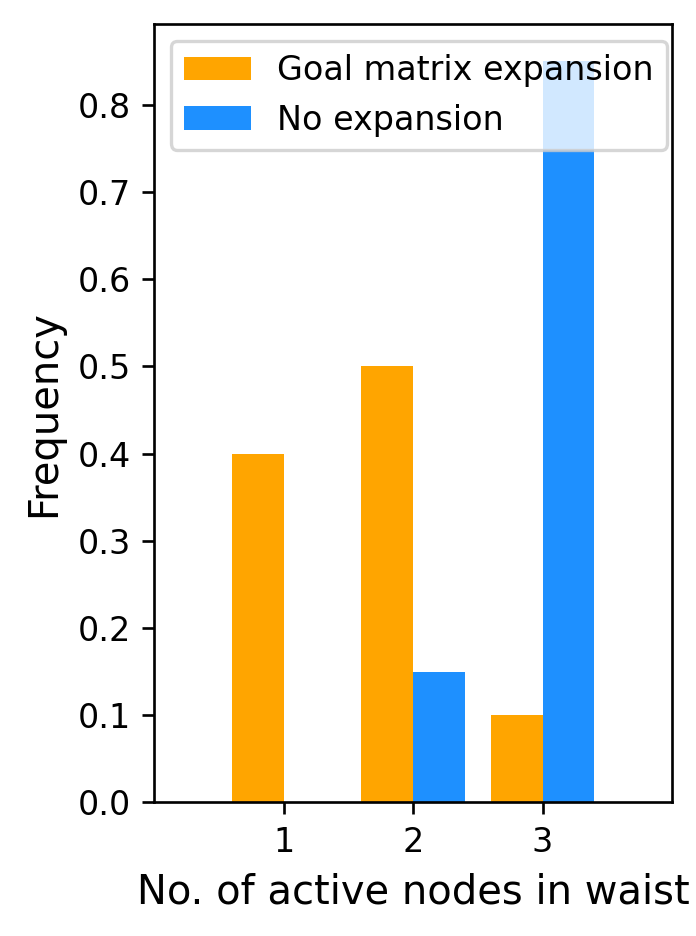

In [55]:
import collections
#縦軸は1で正規化されるのでふたつでも問題ないはず


from matplotlib.backends.backend_pdf import PdfPages
#pp = PdfPages("fig5_hist_ed.pdf")



freq_dup = [Dup[i][-1,1] for i in range(nSample)]
freq_nondup = [NonDup[i][-1,1] for i in range(nSample)]

bins_list = [0.5,1.5,2.5,3.5]

dup_counts, dup_bins = np.histogram(freq_dup, bins=bins_list)
dup_counts_normed = dup_counts / sum(dup_counts)

nondup_counts, nondup_bins = np.histogram(freq_nondup, bins=bins_list)
nondup_counts_normed = nondup_counts / sum(nondup_counts)


labels = ["Goal matrix expansion", "No expansion"]
colors = ["orange", "#1e90ff"]
#colors = ["#ff4b00", "grey"]
#fig = plt.figure(figsize=(4, 2),facecolor="white", dpi=240)
#fig = plt.figure(figsize=(8, 2),facecolor="white", dpi=240)
fig = plt.figure(figsize=(3, 4),facecolor="white", dpi=240)
plt.xlim(0,4)
plt.hist([dup_bins[:-1],dup_bins[:-1]], bins=dup_bins, weights=[dup_counts_normed,nondup_counts_normed], label=labels, color=colors)
plt.xticks([1,2,3])
plt.xlabel("No. of active nodes in waist",size=12)
plt.ylabel("Frequency",size=12)
plt.legend(labels,  loc="upper left")
#fig.savefig("/Users/itoutouma/Aokiken_jupyter/BowTieEvo/ResultFigures/fig5_hist_ed_S100_v2.pdf",figsize=(3,4))
plt.tight_layout()
TITLE = "Fig5d"
fig.savefig("/Users/itoutouma/Desktop/BowTiePaper/Figures0319/Fig5set/{}.pdf".format(TITLE))


0
[[6.0, 2.0, 1.0, 2.0, 6.0], [6.0, 3.0, 2.0, 3.0, 6.0], [6.0, 4.0, 3.0, 4.0, 6.0], [6.0, 6.0, 6.0, 6.0, 6.0]]
1
[[6.0, 6.0, 6.0, 6.0, 6.0], [6.0, 6.0, 6.0, 6.0, 6.0], [6.0, 6.0, 6.0, 6.0, 6.0], [6.0, 6.0, 6.0, 6.0, 6.0]]
2
[[6.0, 1.0, 1.0, 1.0, 6.0], [6.0, 2.0, 2.0, 3.0, 6.0], [6.0, 4.0, 3.0, 4.0, 6.0], [6.0, 6.0, 6.0, 6.0, 6.0]]
3
[[6.0, 6.0, 6.0, 6.0, 6.0], [6.0, 6.0, 6.0, 6.0, 6.0], [6.0, 6.0, 6.0, 6.0, 6.0], [6.0, 6.0, 6.0, 6.0, 6.0]]


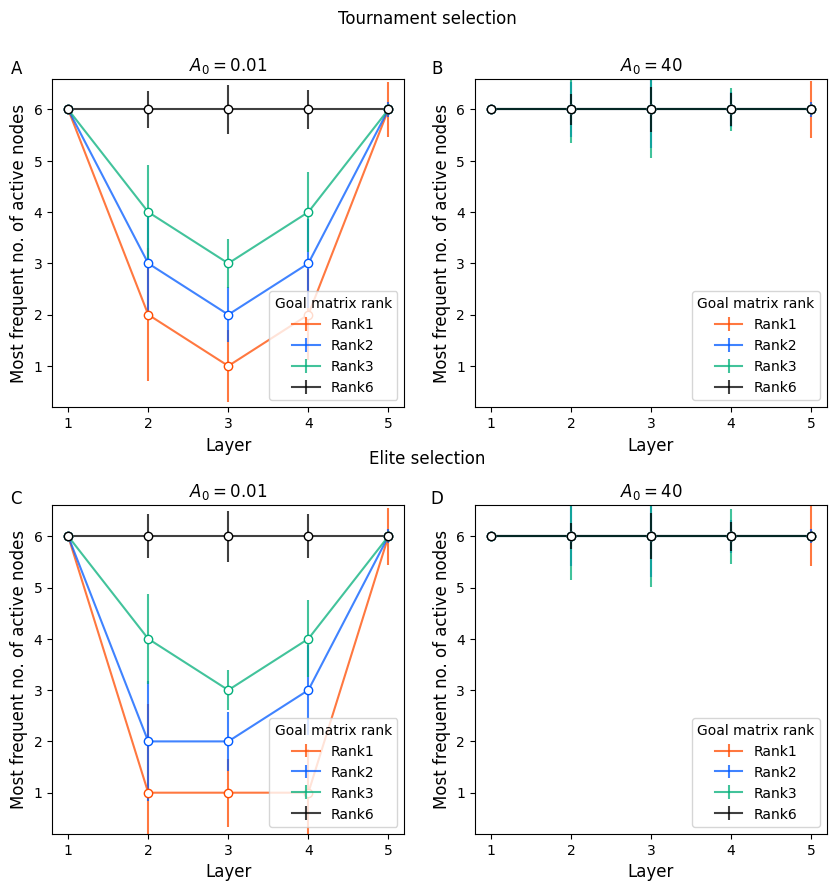

In [50]:
dir_ = "FigS1/"
TournamentIni001R1 = np.loadtxt(f"{dir_}S100_RankDepend_R1.txt")
TournamentIni001R2 = np.loadtxt(f"{dir_}S100_RankDepend_R2.txt")
TournamentIni001R3 = np.loadtxt(f"{dir_}S100_RankDepend_R3.txt")
TournamentIni001R6 = np.loadtxt(f"{dir_}S100_RankDepend_R6.txt")
TournamentIni001 = [TournamentIni001R1, TournamentIni001R2, TournamentIni001R3, TournamentIni001R6]

TournamentIni40R1 = np.loadtxt(f"{dir_}S100_RankDepend_Ini40_R1.txt")
TournamentIni40R2 = np.loadtxt(f"{dir_}S100_RankDepend_Ini40_R2.txt")
TournamentIni40R3 = np.loadtxt(f"{dir_}S100_RankDepend_Ini40_R3.txt")
TournamentIni40R6 = np.loadtxt(f"{dir_}S100_RankDepend_Ini40_R6.txt")
TournamentIni40 = [TournamentIni40R1, TournamentIni40R2, TournamentIni40R3, TournamentIni40R6]

EliteIni001R1 = np.loadtxt(f"{dir_}S100_RankDepend_Elite_R1.txt")
EliteIni001R2 = np.loadtxt(f"{dir_}S100_RankDepend_Elite_R2.txt")
EliteIni001R3 = np.loadtxt(f"{dir_}S100_RankDepend_Elite_R3.txt")
EliteIni001R6 = np.loadtxt(f"{dir_}S100_RankDepend_Elite_R6.txt")
EliteIni001 = [EliteIni001R1, EliteIni001R2, EliteIni001R3, EliteIni001R6]

EliteIni40R1 = np.loadtxt(f"{dir_}S100_RankDepend_Ini40_Elite_R1.txt")
EliteIni40R2 = np.loadtxt(f"{dir_}S100_RankDepend_Ini40_Elite_R2.txt")
EliteIni40R3 = np.loadtxt(f"{dir_}S100_RankDepend_Ini40_Elite_R3.txt")
EliteIni40R6 = np.loadtxt(f"{dir_}S100_RankDepend_Ini40_Elite_R6.txt")
EliteIni40 = [EliteIni40R1, EliteIni40R2, EliteIni40R3, EliteIni40R6]

RankDependData = [TournamentIni001, TournamentIni40, EliteIni001, EliteIni40]

index=0
ax = list(range(4))
fig = plt.figure(figsize=(10, 10),facecolor="white", dpi=100)
for RD_data in RankDependData:
    ax[index] = fig.add_subplot(2, 2, index+1)
    RDs_ave = [[statistics_mode(RD_data[j][:,i]) for i in range(5)] for j in range(len(RD_data))]
    RDs_std = [np.std(RD_data[j], axis=0) for j in range(len(RD_data))]
    colors = ["#ff4b00", "#005aff","#03af7a", "#000000"]
    labels = ["Rank1","Rank2", "Rank3", "Rank6"]
    X = [1,2,3,4,5]
    print(index)
    print(RDs_ave)
    #ax[index].figure(figsize=(4,4), facecolor="white")
    ax[index].set_xlabel('Layer', size=12)  # x軸ラベル
    ax[index].set_ylabel('Most frequent no. of active nodes',size=12)  # y軸ラベル
    ax[index].set_ylim(0.2,6.6)
    for i in range(4):
        ax[index].errorbar(X, RDs_ave[i],yerr=RDs_std[i], color=colors[i], label=labels[i], alpha=0.75, zorder=1)
        ax[index].scatter(X, RDs_ave[i], alpha=1.0, facecolor='white', edgecolors=colors[i], zorder=2)
    ax[index].legend(loc=4, title="Goal matrix rank") 
    ax[index].set_xticks([1, 2, 3, 4, 5])
    ax[index].set_yticks([1, 2, 3, 4, 5, 6])
    index+=1

ax[0].set_title("$A_0 = 0.01$")
ax[2].set_title("$A_0 = 0.01$")
ax[1].set_title("$A_0 = 40$")
ax[3].set_title("$A_0 = 40$")
fig.subplots_adjust(hspace=0.3)

fig.text(0.5, 0.94, 'Tournament selection', ha='center', va='center', rotation='horizontal', size=12)
fig.text(0.5, 0.5, 'Elite selection', ha='center', va='center', rotation='horizontal', size=12)
fig.text(0.089, 0.89, 'A', ha='center', va='center', rotation='horizontal', size=12)
fig.text(0.51, 0.89, 'B', ha='center', va='center', rotation='horizontal', size=12)
fig.text(0.089, 0.46, 'C', ha='center', va='center', rotation='horizontal', size=12)
fig.text(0.51, 0.46, 'D', ha='center', va='center', rotation='horizontal', size=12)

#fig.text(0.1, 0.895, 'a', ha='center', va='center', rotation='horizontal', size=14)


TITLE = "S1Fig"
fig.savefig("Figures/{}.tiff".format(TITLE))

### 適応後一回変えるシミュレーション Bow-tie構造の保存

(10, 3000, 6)
before fitness:-2.936722932789927e-06
after fitness:-1.3861564349419185e-07
(10, 2)
before fitness:-1.4570874495316505e-06
after fitness:-2.198725541546112e-06
(10, 2)
before fitness:-7.633467020757163e-06
after fitness:-0.00254644104014495
(10, 2)
before fitness:-0.007859366754262576
after fitness:-0.08361278466922185
(10, 2)


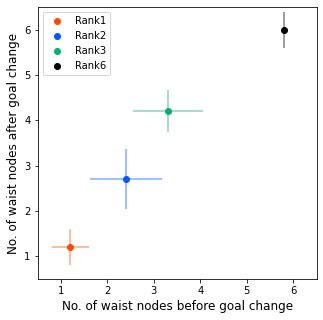

In [44]:
from scipy import stats
import numpy as np
GR1 = np.load("Data/OnceGoalMatrixChange/OnceGoalMatirxChangeGA_0,01_R1.npy",allow_pickle=True)
GR2 = np.load("Data/OnceGoalMatrixChange/OnceGoalMatirxChangeGA_0,01_R2.npy",allow_pickle=True)
GR3 = np.load("Data/OnceGoalMatrixChange/OnceGoalMatirxChangeGA_0,01_R3.npy",allow_pickle=True)
GR6 = np.load("Data/OnceGoalMatrixChange/OnceGoalMatirxChangeGA_0,01_R6.npy",allow_pickle=True)

print(GR1.shape)
GR = [GR1, GR2, GR3, GR6]
labels = ["Rank1", "Rank2", "Rank3", "Rank6"]
colors = ["#ff4b00", "#005aff","#03af7a", "#000000"]
fig = plt.figure(figsize=(5,5), facecolor="white")


for j in range(4):
    GRi = GR[j].copy()
    #print("rank{} 3500 waist: {}".format(j, GRi[0][1500][5]))
    #print("rank{} 3500 waist: {}".format(j, GRi[0][-1][5]))
    print("before fitness:{}".format(GRi[0][1499][5]))
    print("after fitness:{}".format(GRi[0][-1][5]))
    
    try:
        GRi_arr = np.array([[GRi[i][1499][2],GRi[i][-1][2]]  for i in range(10) if GRi[i] is not None])
        print(GRi_arr.shape)
        GRi_mean = np.mean(GRi_arr, axis=0)
        GRi_err = np.std(GRi_arr, axis=0)
        plt.scatter(GRi_mean[0],GRi_mean[1], color = colors[j], alpha=1, label=labels[j])
        plt.errorbar(GRi_mean[0],GRi_mean[1], yerr=GRi_err[0], xerr=GRi_err[1], color=colors[j], 
                     label=labels[j], alpha=0.5)
    except:
        print("d")

plt.legend(labels,  loc="upper left")
plt.ylim([0.5,6.5])
plt.xlim([0.5,6.5])
plt.xlabel("No. of waist nodes before goal change",size=12)
plt.ylabel("No. of waist nodes after goal change",size=12)
TITLE = "figS4b"
#fig.savefig("/Users/itoutouma/Desktop/BowTiePaper/Figures0319/setFigS4/{}.pdf".format(TITLE))

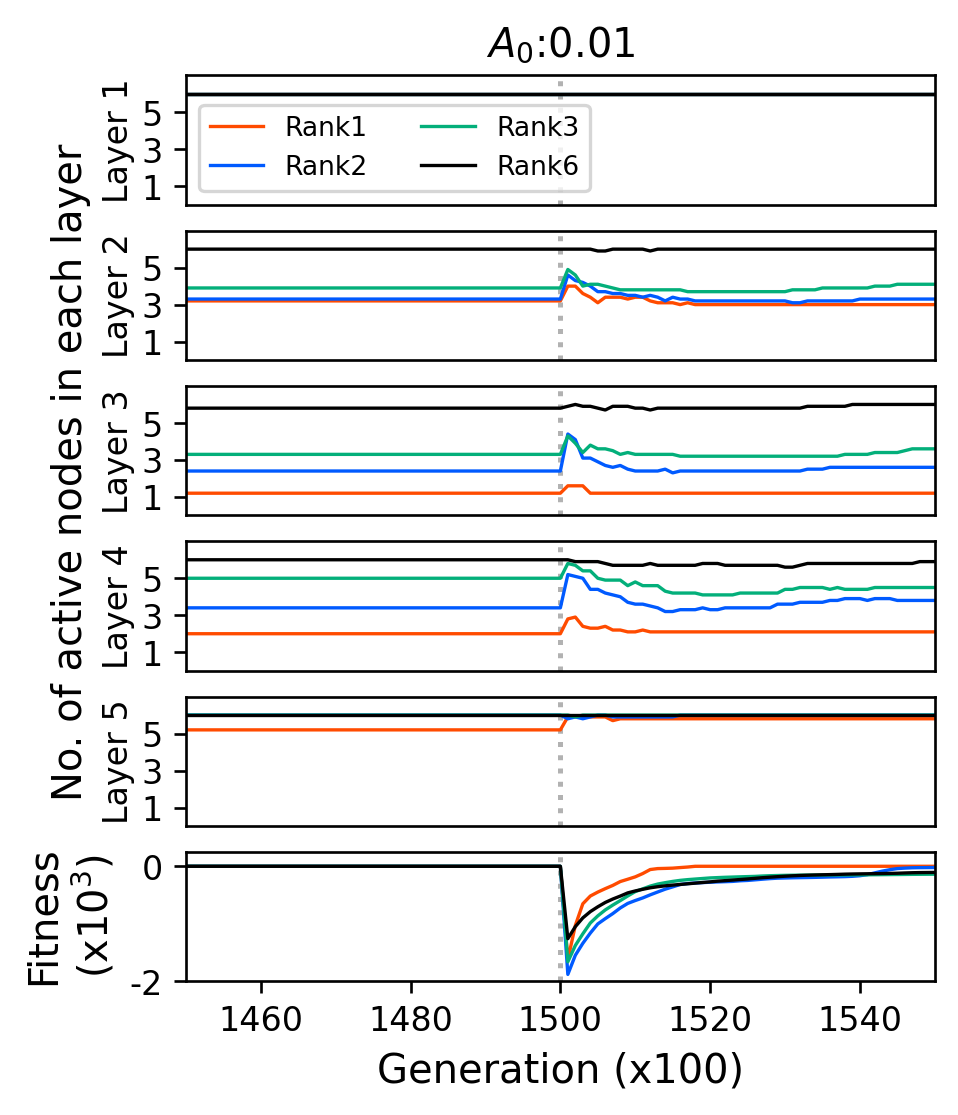

In [43]:
GR = [GR1, GR2, GR3, GR6]
labels = ["Rank1", "Rank2", "Rank3", "Rank6"]
colors = ["#ff4b00", "#005aff","#03af7a", "#000000"]
fig = plt.figure(figsize=(4, 5),facecolor="white", dpi=240)
ax = [0,1,2,3,4,5]

GR_mean = [np.mean(GR[index], axis=0) for index in range(len(GR))]

for i in range(len(ax)):
    ax[i]=fig.add_subplot(6, 1, i+1)
    #ax[i].tick_params(axis = 'y', labelsize = 7)
    if i < 5:
        ax[i].set_ylim(0,7)
        ax[i].set_yticks([1, 3, 5])
        ax[i].set_xticks([])
        ax[i].set_ylabel("Layer {}".format(i+1), labelpad=2)
        #ax[i].grid(color='grey', linestyle='dotted', linewidth=1, axis='y')
        ax[i].vlines(1500, 0, 7, "grey", linestyle="dotted", alpha=0.6) 
    else:
        ax[i].vlines(1500, -2000, 250, "grey", linestyle="dotted", alpha=0.6) 
        ax[i].set_ylim(-2000,250)
        ax[i].set_yticks([0,-2000])
        ax[i].set_yticklabels(["0","-2"])
    for index in range(len(GR)):
        ax[i].plot(GR_mean[index][:,i], alpha= 1, linewidth=1, color=colors[index], label=labels[index])
    ax[i].set_xlim(1450, 1550)
plt.subplots_adjust(wspace=3, left=0.12)
    
            
ax[0].legend(loc="lower left", fontsize=8, ncol=2)

ax[0].set_title("$A_0$:0.01")
ax[5].set_xlabel("Generation (x100)",size=12)

TITLE = "figS4a"

fig.text(0.00, 0.55, 'No. of active nodes in each layer', ha='center', va='center', rotation='vertical', size=12)
fig.text(0.00, 0.18, 'Fitness\n(x$10^3$)', ha='center', va='center', rotation='vertical', size=12)
fig.savefig("/Users/itoutouma/Desktop/BowTiePaper/Figures0319/setFigS4/{}.pdf".format(TITLE), bbox_inches='tight')

In [5]:
GR_mean

[array([[6.0, 6.0, 6.0, 6.0, 5.9, -3599.0379118506085],
        [6.0, 6.0, 6.0, 6.0, 5.9, -3598.5857134153193],
        [6.0, 6.0, 6.0, 6.0, 5.9, -3598.0229917050856],
        ...,
        [6.0, 3.0, 1.2, 2.1, 5.8, -2.9874182862712816e-07],
        [6.0, 3.0, 1.2, 2.1, 5.8, -2.984772892597038e-07],
        [6.0, 3.0, 1.2, 2.1, 5.8, -2.9837239089082104e-07]], dtype=object),
 array([[6.0, 6.0, 6.0, 6.0, 6.0, -3599.0298514137735],
        [6.0, 6.0, 6.0, 6.0, 6.0, -3598.660044046535],
        [6.0, 6.0, 6.0, 6.0, 6.0, -3598.1841539626585],
        ...,
        [6.0, 3.5, 2.7, 4.0, 6.0, -0.0003412280235111367],
        [6.0, 3.5, 2.7, 4.0, 6.0, -0.0003406272180188714],
        [6.0, 3.5, 2.7, 4.0, 6.0, -0.0003387966107502642]], dtype=object),
 array([[6.0, 6.0, 6.0, 6.0, 6.0, -3599.012629360136],
        [6.0, 6.0, 6.0, 6.0, 6.0, -3598.667905837956],
        [6.0, 6.0, 6.0, 6.0, 6.0, -3598.209805096013],
        ...,
        [6.0, 4.3, 4.2, 5.2, 6.0, -1.1470493388125784],
        [6.0, 4.3

### ゴールマトリックスを適応後に変えてみる

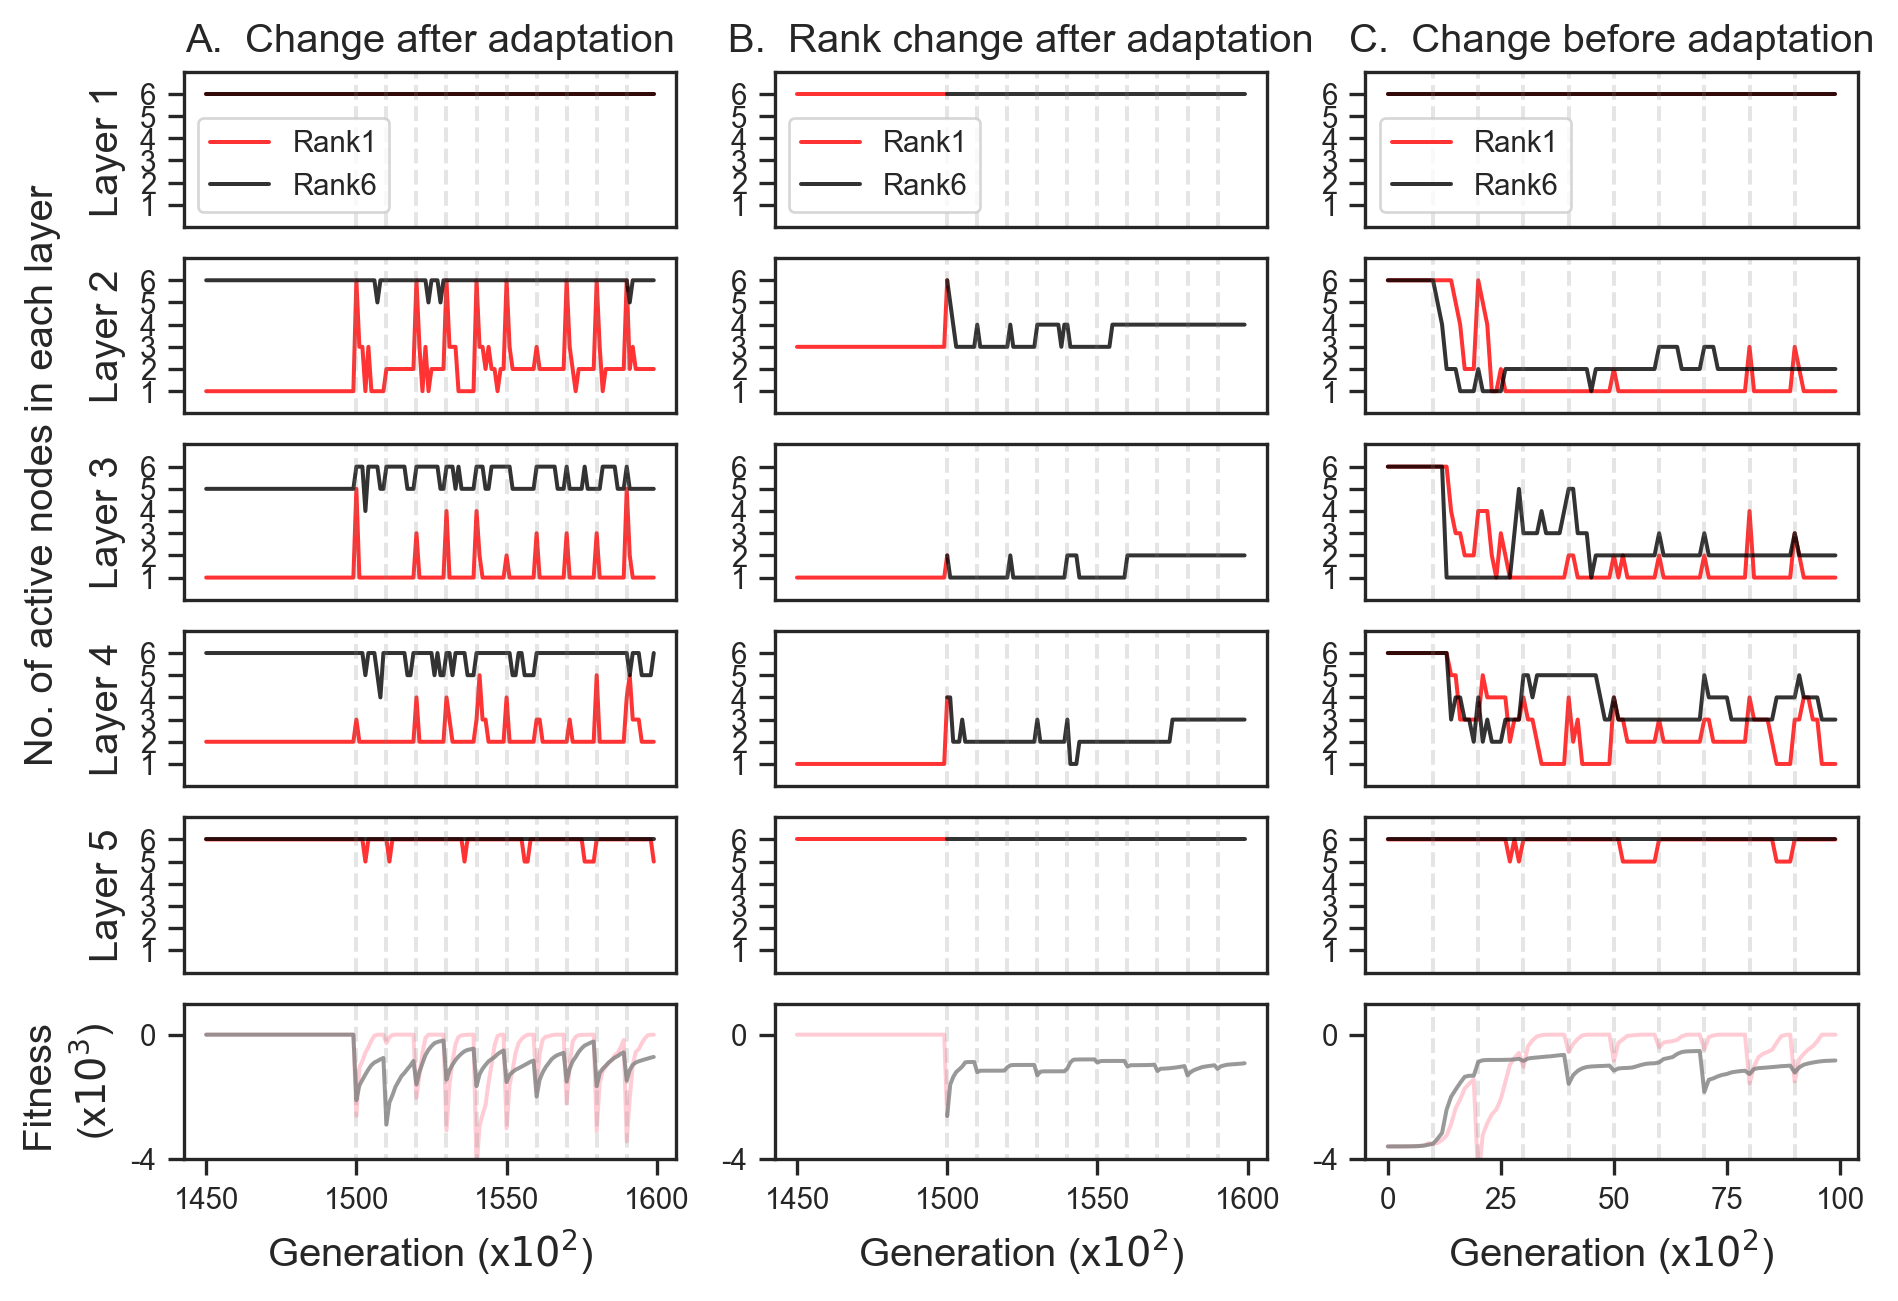

In [90]:
# Create fig.2c
os.chdir("/Users/itoutouma/Aokiken_jupyter/BowTieEvo/")
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 6),facecolor="white", dpi=240)

BeforeAdaptR1 = np.load("Data/GoalMatirxChangeGA_BeforeAdaptA0,01_R1_ver2.npy",allow_pickle=True)
AfterAdaptR1 = np.load("Data/GoalMatirxChangeGA_AfterAdaptA0,01_R1_ver2.npy", allow_pickle=True)


#BeforeAdaptR1 = np.load("Data/GoalMatirxChangeGA_BeforeAdaptA0,01_R1.npy",allow_pickle=True)
#AfterAdaptR1 = np.load("Data/GoalMatirxChangeGA_AfterAdaptA0,01_R1_every5000.npy", allow_pickle=True)

BeforeAdaptR6 = np.load("Data/GoalMatirxChangeGA_BeforeAdaptA0,01_R6_ver2.npy",allow_pickle=True)
AfterAdaptR6 = np.load("Data/GoalMatirxChangeGA_AfterAdaptA0,01_R6_ver2.npy", allow_pickle=True)

AfterAdaptR1_to_R6 = np.load("Data/GoalMatirxChangeGA_AfterAdaptA0,01_R1_To_R6.npy", allow_pickle=True)

      
GoalChangeTimeB = list(range(10,100,10))
GoalChangeTimeA = list(range(50,150,10))

ax = list(range(18))
left=0
middle=0
right=0
alp_=0.8
alp2_ = 0.8
j = 1
for i in range(18):
    ax[i] = fig.add_subplot(6, 3, i+1)
    if i%3==2:
        #ax[i].grid(color='grey', linestyle='dotted', linewidth=1, axis='y')
        if left ==5:
            ax[i].plot(BeforeAdaptR1[j][:,left], color="pink", alpha=alp2_)
            ax[i].plot(BeforeAdaptR6[j][:,left], color="grey", alpha=alp2_)
            ax[i].set_ylim([-4000,1000])
            ax[i].set_yticks([-4000,0])
            ax[i].set_yticklabels(["-4","0",])
            ax[i].set_xlabel("Generation (x$10^2$)", size=12)
            ax[i].vlines(GoalChangeTimeB, -4000,1000, "grey", linestyles='dashed',label="Non enlargement",alpha=0.2) 
        else:
            ax[i].plot(BeforeAdaptR1[j][:,left], color="red",alpha=alp_)
            ax[i].plot(BeforeAdaptR6[j][:,left], color="#000000", alpha=alp_)
            ax[i].set_ylim(0,7)
            ax[i].set_yticks([1, 2, 3, 4, 5, 6])
            ax[i].set_xticks([])
            ax[i].vlines(GoalChangeTimeB, 0, 10, "grey", linestyles='dashed',label="Non enlargement",alpha=0.2) 
        left +=1

    elif i%3==0:
        if middle ==5:
            ax[i].plot(AfterAdaptR1[j][1450:1600,middle], color="pink", alpha=alp2_)
            ax[i].plot(AfterAdaptR6[j][1450:1600,middle], color="grey", alpha=alp2_)
            ax[i].set_ylim([-4000,1000])
            ax[i].set_yticks([-4000,0])
            ax[i].set_yticklabels(["-4","0",])
            ax[i].set_xlabel("Generation (x$10^2$)", size=12)
            ax[i].set_ylabel("Fitness \n(x$10^3$)", size=12)
            ax[i].set_xticks([0,50,100,150])
            ax[i].set_xticklabels([1450, 1500, 1550, 1600])
            ax[i].vlines(GoalChangeTimeA,-5000,1000, "grey", linestyles='dashed',label="Non enlargement",alpha=0.2) 
        else:
            #ax[i].plot(AfterAdaptR1[j][1450:1600,right], color="red", alpha=alp_)
            ax[i].plot(AfterAdaptR1[j][1450:1600,middle], color="red", alpha=alp_)
            ax[i].plot(AfterAdaptR6[j][1450:1600,middle], color="#000000", alpha=alp_)
            ax[i].set_ylim(0,7)
            ax[i].set_ylabel("Layer {}".format(left+1), size=12)
            ax[i].set_yticks([1, 2, 3, 4, 5, 6])
            ax[i].set_xticks([])
            ax[i].vlines(GoalChangeTimeA, 0, 10, "grey", linestyles='dashed',label="Non enlargement",alpha=0.2) 
        middle +=1
    elif i%3 == 1:
        if right ==5:
            ax[i].plot(list(range(0,51)), AfterAdaptR1_to_R6[j][1450:1501,right], color="pink", alpha=alp2_)
            ax[i].plot(list(range(50,150)), AfterAdaptR1_to_R6[j][1500:1600,right], color="grey", alpha=alp2_)
            ax[i].set_ylim([-4000,1000])
            ax[i].set_yticks([-4000,0])
            ax[i].set_yticklabels(["-4","0",])
            ax[i].set_xlabel("Generation (x$10^2$)", size=12)
            ax[i].set_xticks([0,50,100,150])
            ax[i].set_xticklabels([1450, 1500, 1550, 1600])
            ax[i].vlines(GoalChangeTimeA,-5000,1000, "grey", linestyles='dashed',label="Non enlargement",alpha=0.2) 
        else:
            #ax[i].plot(AfterAdaptR1[j][1450:1600,right], color="red", alpha=alp_)
            ax[i].plot(list(range(0,51)), AfterAdaptR1_to_R6[j][1450:1501,right], color="red", alpha=alp_)
            ax[i].plot(list(range(50,150)), AfterAdaptR1_to_R6[j][1500:1600,right], color="#000000", alpha=alp_)
            ax[i].set_ylim(0,7)
            ax[i].set_yticks([1, 2, 3, 4, 5, 6])
            ax[i].set_xticks([])
            ax[i].vlines(GoalChangeTimeA, 0, 10, "grey", linestyles='dashed',label="Non enlargement",alpha=0.2) 
        right +=1

ax[0].set_title("A.  Change after adaptation",fontsize=12)
ax[1].set_title("B.  Rank change after adaptation",fontsize=12)
ax[2].set_title("C.  Change before adaptation",fontsize=12)

ax[0].legend(labels = ["Rank1", "Rank6"],loc="lower left")
ax[1].legend(labels = ["Rank1", "Rank6"],loc="lower left")
ax[2].legend(labels = ["Rank1", "Rank6"],loc="lower left")
fig.text(0.06, 0.6, 'No. of active nodes in each layer', ha='center', va='center', rotation='vertical', size=12)
#fig.text(0.06, 0.17, "Fitness (x$10^3$)", ha='center', va='center', rotation='vertical', size=9)
#ax[i].set_ylabel("Fitness (x$10^3$)", size=12)
#fig.text(0.03, 0.6, 'No. of active nodes in each layer', ha='center', va='center', rotation='vertical', size=12)
#fig.legend(lines, labels, loc="lower center")
#fig.subplots_adjust(hspace=0.5, left=0.)
#fig.tight_layout()


#fig.savefig("/Users/itoutouma/Aokiken_jupyter/BowTieEvo/ResultFigures/fig6_goal_change_dualA0.pdf")
#TITLE = "Fig4"
#fig.savefig("Figures/{}.tiff".format(TITLE), bbox_inches='tight')

TITLE = "Fig4_w"
fig.savefig("{}.tiff".format(TITLE))

In [8]:
BeforeAdaptR1 = np.load("Data/GoalMatirxChangeGA_BeforeAdaptA0,01_R1_ver2.npy",allow_pickle=True)
BeforeAdaptR2 = np.load("Data/GoalMatirxChangeGA_BeforeAdaptA0,01_R2_ver2.npy",allow_pickle=True)
BeforeAdaptR3 = np.load("Data/GoalMatirxChangeGA_BeforeAdaptA0,01_R3_ver2.npy",allow_pickle=True)
BeforeAdaptR6 = np.load("Data/GoalMatirxChangeGA_BeforeAdaptA0,01_R6_ver2.npy",allow_pickle=True)

BeforeAdaptR1 = np.load("Data/GoalMatirxChangeGA_BeforeAdaptA0,01_R1_long.npy",allow_pickle=True)
BeforeAdaptR2 = np.load("Data/GoalMatirxChangeGA_BeforeAdaptA0,01_R2_long.npy",allow_pickle=True)
BeforeAdaptR3 = np.load("Data/GoalMatirxChangeGA_BeforeAdaptA0,01_R3_long.npy",allow_pickle=True)
BeforeAdaptR6 = np.load("Data/GoalMatirxChangeGA_BeforeAdaptA0,01_R6_long.npy",allow_pickle=True)

BA = [BeforeAdaptR1, BeforeAdaptR2, BeforeAdaptR3, BeforeAdaptR6]

GoalChangeTime = list(range(10,1000,10))
labels = ["Rank1", "Rank2", "Rank3", "Rank6"]
colors = ["#ff4b00", "#005aff","#03af7a", "#000000"]
colors = ["#D15235", "#455CB1", "#00AB81",  "#000000"]

fig = plt.figure(figsize=(4, 4),facecolor="white", dpi=240)


ax = list(range(4))
sample = 0
for i in range(4):
    ax[i] = fig.add_subplot(2, 2, i+1)
    ax[i].plot(BA[i][sample][:,2], color=colors[i], label=labels[i], linewidth=1)
    #ax[i].legend(labels = [labels[i]], loc="upper right",fontsize=12)
    ax[i].set_title(labels[i])
    ax[i].set_yticks([1,2,3, 4,5, 6])
    ax[i].set_yticklabels([1,2,3,4,5,6])
    #ax[i].vlines(GoalChangeTime, 1, 6, "grey", label="Non enlargement",alpha=0.2) 
    ax[i].set_xlabel("Generation (x100)")

plt.tight_layout()
TITLE = "FlucGoal_WinterQbio"
#fig.savefig("/Users/itoutouma/Desktop/BowTiePaper/for_conference4.pdf".format(TITLE))

FileNotFoundError: [Errno 2] No such file or directory: 'Data/GoalMatirxChangeGA_BeforeAdaptA0,01_R1_ver2.npy'

In [18]:
# 変更前と変更後のウエスト幅の相関を調べる
import scipy.stats 
def waist_crr_data(GoalChange, sample, layer):
    GoalChange[sample][:,layer][~np.isnan(GoalChange[sample][:,layer])]
    n = len(GoalChange[sample][:,layer])-1
    before_adaptation = GoalChange[sample][35,layer]
    after_adaptation =  GoalChange[sample][n,layer]
    return([before_adaptation, after_adaptation])

waist_sample0 = np.array([waist_crr_data(GoalChangeR1, sample, 0) for sample in range(20)])
waist_sample1 = np.array([waist_crr_data(GoalChangeR1, sample, 1) for sample in range(20)])
waist_sample2 = np.array([waist_crr_data(GoalChangeR1, sample, 2) for sample in range(20)])
waist_sample3 = np.array([waist_crr_data(GoalChangeR1, sample, 3) for sample in range(20)])
waist_sample4 = np.array([waist_crr_data(GoalChangeR1, sample, 4) for sample in range(20)])
fig = plt.figure(figsize=(4,4), facecolor="white")
alp=0.6
#plt.scatter(waist_sample0[:,0],waist_sample0[:,1],marker="v",color="black", alpha=alp, label="layer1")
plt.scatter(waist_sample1[:,0],waist_sample1[:,1],marker="x", s=50, color="orange", alpha=alp, label="layer2")
plt.scatter(waist_sample2[:,0],waist_sample2[:,1],marker="*", s=50, color="skyblue", alpha=alp, label="layer3")
plt.scatter(waist_sample3[:,0],waist_sample3[:,1],marker="+", s=50, color="grey", alpha=alp, label="layer4")
#plt.scatter(waist_sample4[:,0],waist_sample4[:,1],marker=",",color="black", alpha=alp, label="layer4")
plt.xlabel("# of active nodes before change")
plt.ylabel("# of active nodes after change")
plt.legend()

c1 = np.concatenate([waist_sample0[:,0],waist_sample1[:,0],waist_sample2[:,0],
               waist_sample3[:,0], waist_sample4[:,0]])
c2 = np.concatenate([waist_sample0[:,1],waist_sample1[:,1],waist_sample2[:,1],
               waist_sample3[:,1], waist_sample4[:,1]])

res = scipy.stats.pearsonr(c1,c2)
print("相関係数:{}".format(res[0]))
#fig.savefig("/Users/itoutouma/Aokiken_jupyter/BowTieEvo/ResultFigures/fig5_goal_matirix_change_crr.pdf")

NameError: name 'GoalChangeR1' is not defined

L1
[100, 100]
L2
[100, 100]


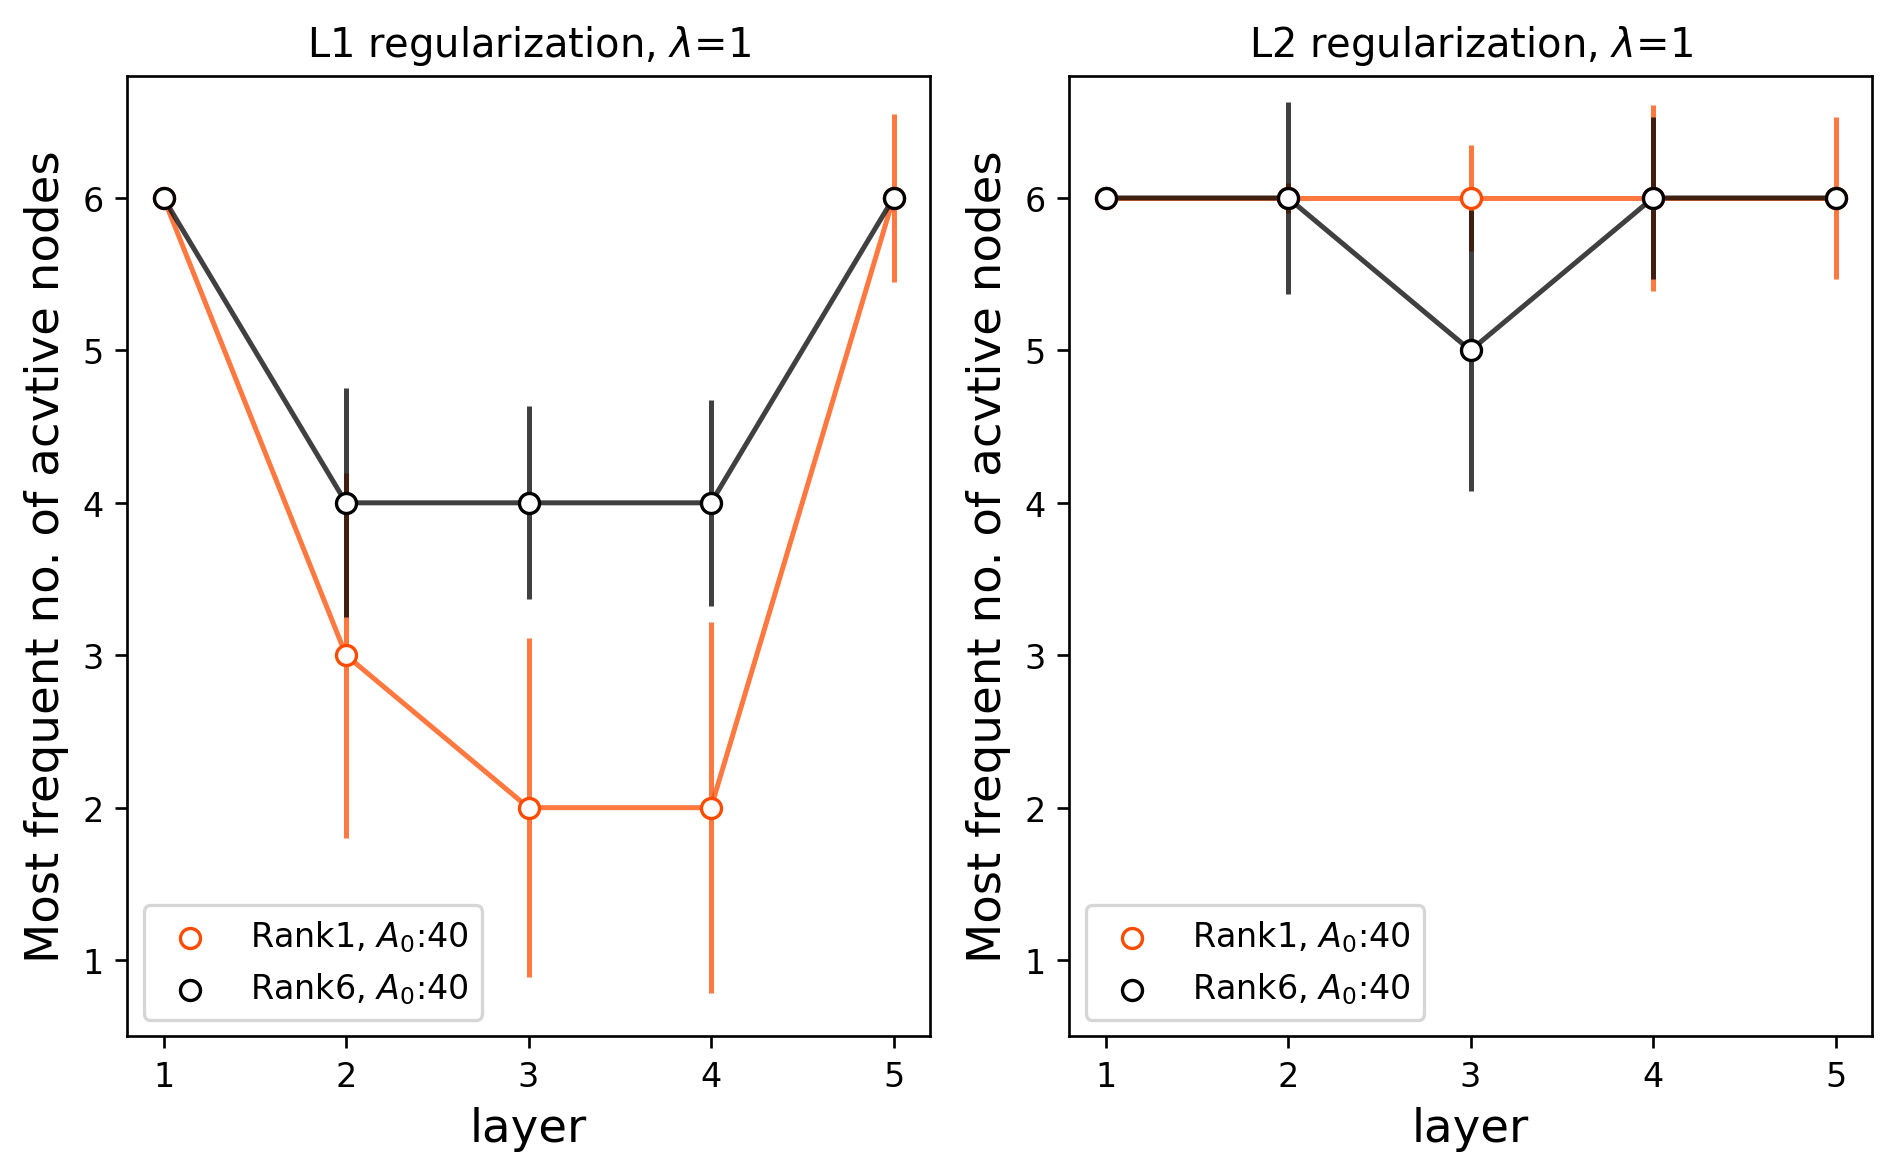

In [47]:
from matplotlib.backends.backend_pdf import PdfPages

TITLE = "FigureS5"
#RD1 = np.loadtxt("Data/R1_Pena01_Ini40.txt")
R1_L1_ini40 = np.loadtxt("Data/R1_Pena1_Ini40.txt")
R6_L1_ini40 = np.loadtxt("Data/R6_Pena1_Ini40.txt")

R1_L2_ini40 = np.loadtxt("Data/R1_Pena1L2_Ini40.txt")
R6_L2_ini40 = np.loadtxt("Data/R6_Pena1L2_Ini40.txt")

L1data = [R1_L1_ini40, R6_L1_ini40]
L1_ave = [[statistics_mode(L1data[k][:,i]) for i in range(5)] for k in range(2)]
L1_std = [np.std(L1data[k], axis=0) for k in range(2)]
print("L1")
print([len(L1) for L1 in L1data])


L2data = [R1_L2_ini40, R6_L2_ini40]
L2_ave = [[statistics_mode(L2data[k][:,i]) for i in range(5)] for k in range(2)]
L2_std = [np.std(L2data[k], axis=0) for k in range(2)]
print("L2")
print([len(L2) for L2 in L2data])

color = ["#ff4b00", "#000000"]
labels = ["Rank1, $A_0$:40", "Rank6, $A_0$:40"]

fig = plt.figure(figsize=(8, 5),facecolor="white", dpi=240)
ax[0] = fig.add_subplot(1, 2, 1)
ax[1] = fig.add_subplot(1, 2, 2)

  # x軸ラベル
for i in range(2):
    ax[i].set_xlabel('layer', size=14)
    ax[i].set_ylabel('Most frequent no. of acvtive nodes',size=14)  # y軸ラベル
    ax[i].set_ylim(0.5,6.8)
    ax[i].set_ylabel('Most frequent no. of acvtive nodes',size=14)  # y軸ラベル
    ax[i].set_xticks([1, 2, 3, 4, 5])
    
X = [1,2,3,4,5]

for k in range(2):
    ax[0].errorbar(X, L1_ave[k], yerr=L1_std[k], color=color[k], label=labels[k], alpha=0.75, zorder=1)
    ax[0].scatter(X, L1_ave[k], facecolor='white', edgecolors=color[k], zorder=2)
    
for k in range(2):
    ax[1].errorbar(X, L2_ave[k], yerr=L2_std[k], color=color[k], label=labels[k], alpha=0.75, zorder=1)
    ax[1].scatter(X, L2_ave[k], facecolor='white', edgecolors=color[k], zorder=2)

ax[0].legend(labels = labels,loc="lower left")
ax[1].legend(labels = labels,loc="lower left")
ax[0].set_title("L1 regularization, $λ$=1")
ax[1].set_title("L2 regularization, $λ$=1")
plt.tight_layout()
TITLE = "FigS5"
fig.savefig("/Users/itoutouma/Desktop/BowTiePaper/Figures0319/{}.tiff".format(TITLE), bbox_inches='tight')